# ÎÇ¥Ïö© ÏöîÏïΩ
Î™©Ï†Å  
* Îçî ÎÇòÏùÄ ÏÑúÎπÑÏä§ Ï†úÍ≥µÍ≥º Í≥†Í∞ù ÎßåÏ°±ÎèÑ Í∞úÏÑ†ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

Î∂ÑÏÑù Ï†àÏ∞®
1. Î¨∏Ï†ú Î∞úÍ≤¨
  1_1. ÌçºÎÑê Î∂ÑÏÑù
  1_2. Ïã†Í∑ú Í≥†Í∞ù Ïú†ÏûÖ ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ
  1_3. Í≥†Í∞ù Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ ÏûëÏóÖ Ï≤òÎ¶¨ÏÉÅÌÉúÏôÄ Í≥†Í∞ùÏùò Í∞êÏ†ïÎ∂ÑÏÑù

> Î™©Ï†Å ÎèÑÏ∂ú

2. Î™©Ï†ÅÏóê Îî∞Î•∏ Î∂ÑÏÑù
  2_1. AB test
  2_2. ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù


In [ ]:
#Îç∞Ïù¥ÌÑ∞Îäî https://github.com/alexkwj/project_Log_Analysis > dataÏóê Ï†úÍ≥µ

import pandas as pd

users = pd.read_csv('/content/drive/MyDrive/project4/data/users.csv')
event_logs= pd.read_csv('/content/drive/MyDrive/project4/data/event_logs.csv')
payment_transactions= pd.read_csv('/content/drive/MyDrive/project4/data/payment_transactions.csv')
plan_history= pd.read_csv('/content/drive/MyDrive/project4/data/plan_history.csv')
ab_assignment= pd.read_csv('/content/drive/MyDrive/project4/data/ab_assignment.csv')
referral_events= pd.read_csv('/content/drive/MyDrive/project4/data/referral_events.csv')
chat_events= pd.read_csv('/content/drive/MyDrive/project4/data/chat_events.csv')
push_events= pd.read_csv('/content/drive/MyDrive/project4/data/push_events.csv')
campaigns= pd.read_csv('/content/drive/MyDrive/project4/data/campaigns.csv')

In [ ]:
# ÏãúÍ∞ÅÌôî Ìè∞Ìä∏ Ï†ÅÏö© ÌïÑÏàò!!
!pip install koreanize_matplotlib

In [ ]:
event_logs['event_name'].unique()

array(['signup_completed', 'lesson_played', 'course_searched',
       'chat_sent', 'page_viewed', 'quiz_submitted',
       'first_quiz_submitted', 'first_lesson_played', 'course_wishlisted',
       'push_sent', 'payment_completed', 'pricing_page_viewed',
       'subscription_canceled', 'onboarding_cta_clicked',
       'checkout_started'], dtype=object)

In [ ]:
event_logs.head(100)
cod = event_logs['event_name'] == 'chat_sent'
sum(cod)

1878

# ÌçºÎÑêÎ∂ÑÏÑù

In [ ]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# Îã®Í≥ÑÎ≥Ñ Ïù¥Î≤§Ìä∏ Í∑∏Î£π Ï†ïÏùò
funnel_steps = {
    "signup": ["signup_completed"],
    "explore": ["course_searched", "page_viewed"],
    "consideration": ["pricing_page_viewed", "course_wishlisted"],
    "purchase": ["payment_completed"]
}

# user_idÎ≥Ñ Í∞Å Îã®Í≥Ñ ÎèÑÎã¨ Ïó¨Î∂Ä Í≥ÑÏÇ∞
funnel_df = pd.DataFrame({"user_id": event_logs["user_id"].unique()})

for step, events in funnel_steps.items():
    funnel_df[step] = funnel_df["user_id"].isin(
        event_logs[event_logs["event_name"].isin(events)]["user_id"]
    )

# Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò
stage_counts = funnel_df.drop(columns="user_id").sum().reset_index()
stage_counts.columns = ["stage", "user_count"]

print(stage_counts)


           stage  user_count
0         signup       22545
1        explore       20426
2  consideration       10375
3       purchase        4962


In [ ]:
event_logs['event_name'].value_counts()

event_name
lesson_played             281218
first_lesson_played        96156
page_viewed                96038
quiz_submitted             81923
course_searched            57228
first_quiz_submitted       56372
signup_completed           22545
pricing_page_viewed         8783
payment_completed           4962
course_wishlisted           4792
push_sent                   4705
chat_sent                   1878
onboarding_cta_clicked       502
subscription_canceled        248
checkout_started              15
Name: count, dtype: int64

In [ ]:
# df = event_logs['first_lesson_played'] / event_logs['lesson_played']

In [ ]:
# import numpy as np
# import plotly.graph_objects as go

# # 1) ÏßÑÏßú ÌçºÎÑê ÏàòÏπò(ÎàÑÏ†Å AND) Í≥ÑÏÇ∞
# ordered_steps = ["signup", "explore", "consideration", "purchase"]

# mask = None
# progressive_counts = []
# for i, step in enumerate(ordered_steps):
#     if i == 0:
#         mask = funnel_df[step]
#     else:
#         mask = mask & funnel_df[step]
#     progressive_counts.append(int(mask.sum()))

# # 2) ÌçºÎÑê Ï∞®Ìä∏ (Plotly Funnel)
# fig = go.Figure(go.Funnel(
#     y = ordered_steps,               # Îã®Í≥Ñ ÏàúÏÑú Í≥†Ï†ï
#     x = progressive_counts,          # ÎàÑÏ†Å AND Í∞í
#     textposition = "inside",
#     textinfo = "value+percent initial+percent previous",
#     opacity = 0.85,
#     hovertemplate = (
#         "Stage: %{y}<br>"
#         "Users: %{x:,}<br>"
#         "Step Conv: %{percentPrevious:.1%}<br>"
#         "Overall: %{percentInitial:.1%}<extra></extra>"
#     ),
# ))

# fig.update_layout(
#     title="Funnel (Progressive AND)",
#     margin=dict(l=40, r=40, t=60, b=40),
# )
# fig.show()


In [ ]:
# total_users = funnel_df["user_id"].nunique()

# # OR Î∞©Ïãù (Îã®Í≥Ñ Ïù¥Î≤§Ìä∏ Ï§ë ÌïòÎÇòÎùºÎèÑ Î∞úÏÉùÌïú Ïú†Ï†Ä)
# users_any = []
# for step, events in funnel_steps.items():
#     cnt = event_logs[event_logs["event_name"].isin(events)]["user_id"].nunique()
#     users_any.append(cnt)

# # AND Î∞©Ïãù (Ïù¥Ï†Ñ Îã®Í≥Ñ Ï†ÑÎ∂Ä ÌÜµÍ≥º)
# mask = None
# users_progressive = []
# for i, step in enumerate(ordered_steps):
#     if i == 0:
#         mask = funnel_df[step]
#     else:
#         mask = mask & funnel_df[step]
#     users_progressive.append(mask.sum())

# # Ï†ÑÏ≤¥ ÎπÑÏ§ë Í≥ÑÏÇ∞
# overall_any_pct = [round(x / total_users * 100, 2) for x in users_any]
# overall_progressive_pct = [round(x / total_users * 100, 2) for x in users_progressive]

# # ÌÜµÌï© ÌÖåÏù¥Î∏î
# summary = pd.DataFrame({
#     "stage": ordered_steps,
#     "users_progressive": users_progressive,
#     "users_any": users_any,
#     "overall_%_progressive": overall_progressive_pct,
#     "overall_%_any": overall_any_pct
# })
# #
# print(summary)


## ÌçºÎÑêÎ∂ÑÏÑù Ïù∏ÏÇ¨Ïù¥Ìä∏  
1 . ÌçºÎÑê Î∂ÑÏÑù(and)Î°ú Íµ¨ÌñàÏùÑÎïå  
Ï†ÑÏ≤¥ Íµ¨Îß§Ïûê(4,962Î™Ö) Ï§ë ÌçºÎÑê Í≤ΩÎ°úÎ•º Î™®Îëê Îî∞Î•∏ Í≥†Í∞ùÏùÄ 2,999Î™ÖÎøê ‚Üí ÏïΩ 40%Ïùò Íµ¨Îß§ÏûêÍ∞Ä Ï§ëÍ∞Ñ Îã®Í≥ÑÎ•º ÏÉùÎûµÌïòÍ≥† Î∞îÎ°ú Íµ¨Îß§.

2.  ÏãúÍ∏±Ìôî Í∑∏ÎûòÌîÑÎ•º Î¥§ÏùÑÎïå  
ÌÉêÏÉâ > Í≥†Î†§ = 46%  
Í≥†Î†§ > Íµ¨Îß§ = 13%Îßå Íµ¨Îß§

funnel_steps = {  
    "signup": ["signup_completed"],  
    "explore": ["course_searched", "page_viewed"],  
    "consideration": ["pricing_page_viewed", "course_wishlisted"],  
    "purchase": ["payment_completed"]  
}


## ÌçºÎÑêÎ∂ÑÏÑù2
ÌåÄÏõêÏùò ÏöîÏ≤≠ÏúºÎ°ú
firsted_lesson_playedÍπåÏßÄ

In [ ]:
# import pandas as pd

# # Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# # Îã®Í≥ÑÎ≥Ñ Ïù¥Î≤§Ìä∏ Í∑∏Î£π Ï†ïÏùò
# funnel_steps = {
#     "signup": ["signup_completed"],
#     "explore": ["course_searched", "page_viewed"],
#     "consideration": ["pricing_page_viewed", "course_wishlisted"],
#     "purchase": ["payment_completed"]
# }

# # user_idÎ≥Ñ Í∞Å Îã®Í≥Ñ ÎèÑÎã¨ Ïó¨Î∂Ä Í≥ÑÏÇ∞
# funnel_df = pd.DataFrame({"user_id": event_logs["user_id"].unique()})

# for step, events in funnel_steps.items():
#     funnel_df[step] = funnel_df["user_id"].isin(
#         event_logs[event_logs["event_name"].isin(events)]["user_id"]
#     )

# # Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò
# stage_counts = funnel_df.drop(columns="user_id").sum().reset_index()
# stage_counts.columns = ["stage", "user_count"]

# print(stage_counts)

# import numpy as np
# import plotly.graph_objects as go

# # 1) ÌçºÎÑê
# ordered_steps = ["signup", "explore", "consideration", "purchase"]

# mask = None
# progressive_counts = []
# for i, step in enumerate(ordered_steps):
#     if i == 0:
#         mask = funnel_df[step]
#     else:
#         mask = mask & funnel_df[step]
#     progressive_counts.append(int(mask.sum()))

# # 2) ÌçºÎÑê Ï∞®Ìä∏ (Plotly Funnel)
# fig = go.Figure(go.Funnel(
#     y = ordered_steps,               # Îã®Í≥Ñ ÏàúÏÑú Í≥†Ï†ï
#     x = progressive_counts,          # ÎàÑÏ†Å AND Í∞í
#     textposition = "inside",
#     textinfo = "value+percent initial+percent previous",
#     opacity = 0.85,
#     hovertemplate = (
#         "Stage: %{y}<br>"
#         "Users: %{x:,}<br>"
#         "Step Conv: %{percentPrevious:.1%}<br>"
#         "Overall: %{percentInitial:.1%}<extra></extra>"
#     ),
# ))

# fig.update_layout(
#     title="Funnel (Progressive AND)",
#     margin=dict(l=40, r=40, t=60, b=40),
# )
# fig.show()



In [ ]:
import pandas as pd

# 2. ÌçºÎÑê Îã®Í≥Ñ Ï†ïÏùò
funnel_steps = {
    'Ïú†ÏûÖ': ['signup_completed'],
    'ÌÉêÏÉâ': ['page_viewed', 'course_searched'],
    'Í≤ΩÌóò': ['first_lesson_played'],
    'Í¥ÄÏó¨': ['chat_sent', 'course_wishlisted', 'first_quiz_submitted'],
    'Íµ¨Îß§': ['payment_completed']
}

# 3. Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä ÏßëÌï© (AND Í∏∞Î∞ò)
funnel_users = {}
previous_users = None

for step, events in funnel_steps.items():
    # Ìï¥Îãπ Îã®Í≥Ñ Ïù¥Î≤§Ìä∏Î•º Ìïú Ïú†Ï†Ä ÏßëÌï©
    step_users = set(
        event_logs.loc[event_logs['event_name'].isin(events), 'user_id'].unique()
    )

    if previous_users is None:
        # Ï≤´ Îã®Í≥Ñ(Ïú†ÏûÖ)
        funnel_users[step] = step_users
    else:
        # AND Í∏∞Î∞ò: Ïù¥Ï†Ñ Îã®Í≥Ñ Ïú†Ï†Ä Ï§ëÏóêÏÑúÎßå Îã§Ïùå Îã®Í≥Ñ ÌïÑÌÑ∞ÎßÅ
        funnel_users[step] = previous_users & step_users

    previous_users = funnel_users[step]

# 4. Í≤∞Í≥º ÌÖåÏù¥Î∏î ÏÉùÏÑ±
funnel_result = pd.DataFrame({
    'Îã®Í≥Ñ': list(funnel_users.keys()),
    'Ïú†Ï†Ä Ïàò': [len(users) for users in funnel_users.values()]
})

# 5. Ï†ÑÏ≤¥ ÎåÄÎπÑ ÎπÑÏú®
total_first_step = len(funnel_users['Ïú†ÏûÖ'])
funnel_result['Ï†ÑÏ≤¥ ÎåÄÎπÑ %'] = (
    funnel_result['Ïú†Ï†Ä Ïàò'] / total_first_step * 100
).round(2)

# 6. Ïù¥Ï†Ñ Îã®Í≥Ñ ÎåÄÎπÑ ÎπÑÏú®
funnel_result['Ïù¥Ï†Ñ Îã®Í≥Ñ ÎåÄÎπÑ %'] = (
    funnel_result['Ïú†Ï†Ä Ïàò'].pct_change().add(1).mul(100).round(2)
)
funnel_result.iloc[0, funnel_result.columns.get_loc('Ïù¥Ï†Ñ Îã®Í≥Ñ ÎåÄÎπÑ %')] = 100.0

# 7. Í≤∞Í≥º Ï∂úÎ†•
print(funnel_result)





   Îã®Í≥Ñ   Ïú†Ï†Ä Ïàò  Ï†ÑÏ≤¥ ÎåÄÎπÑ %  Ïù¥Ï†Ñ Îã®Í≥Ñ ÎåÄÎπÑ %
0  Ïú†ÏûÖ  22545   100.00      100.00
1  ÌÉêÏÉâ  20426    90.60       90.60
2  Í≤ΩÌóò  20096    89.14       98.38
3  Í¥ÄÏó¨  17300    76.74       86.09
4  Íµ¨Îß§   4737    21.01       27.38


In [ ]:
# import plotly.graph_objects as go

# # 1) Îç∞Ïù¥ÌÑ∞ Í∫ºÎÇ¥Í∏∞
# ordered_steps = funnel_result['Îã®Í≥Ñ'].tolist()
# counts        = funnel_result['Ïú†Ï†Ä Ïàò'].tolist()

# # 2) ÌçºÎÑê Ï∞®Ìä∏
# fig = go.Figure(go.Funnel(
#     y = ordered_steps,
#     x = counts,
#     textposition = "inside",
#     textinfo = "value+percent initial+percent previous",  # Í∞í + Ï†ÑÏ≤¥ÎåÄÎπÑ% + Ïù¥Ï†ÑÎã®Í≥ÑÎåÄÎπÑ%
#     opacity = 0.9,

# ))

# fig.update_layout(
#     title="ÌçºÎÑê (AND Í∏∞Î∞ò ÏßÑÌñâ)",
#     margin=dict(l=40, r=40, t=60, b=40)
# )

# fig.show()


# Ïã†Í∑úÍ≥†Í∞ù Ïú†ÏûÖ ÏãúÍ≥ÑÏó¥
ÌçºÎÑê Î∂ÑÏÑùÍ≤∞Í≥º Í≥†Í∞ù Íµ¨Îß§ÍπåÏßÄ ÎÇ¥Î∂Ä ÌîÑÎ°úÏÑ∏Ïä§ÏóêÎäî Î¨∏Ï†úÍ∞Ä ÏóÜÏùå
ÎßàÏºÄÌåÖÏóê ÏßëÏ§ë

In [ ]:
print(users.head())
print(users.info())

            user_id           created_at         last_seen_at  \
0  usr_6b87a57bd775  2025-02-09 12:50:00  2025-07-09 00:05:00   
1  usr_b95ee57a273a  2024-12-09 20:57:00  2025-07-19 09:29:00   
2  usr_fc7ffc4130f7  2025-01-07 02:18:00  2025-07-20 12:57:00   
3  usr_f0dbe9c02021  2025-01-25 11:14:00  2025-07-09 03:16:00   
4  usr_6f08473e5134  2025-01-30 02:22:00  2025-07-03 02:55:00   

                   email acquisition_source subscription_plan plan_status  \
0  jinhyeonu@example.net           referral              none        none   
1       wgim@example.com           referral        annual_pro      active   
2   coejaeho@example.com       facebook_ads       monthly_pro      active   
3       ngim@example.com         google_cpc       monthly_pro      active   
4    gimujin@example.com             direct              none        none   

  device_type      plan_start_date plan_end_date gender age_group  age  \
0         web                  NaN           NaN      M       30s   39  

In [ ]:
#ÎÇ†ÏßúÎ≥ÄÌôò
users['created_at'] = pd.to_datetime(users['created_at'])

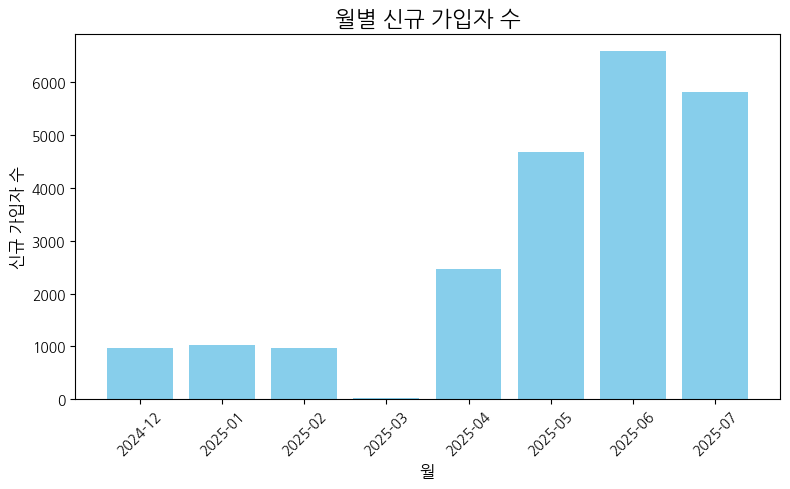

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib  # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏûêÎèô Ï†ÅÏö©

# 1. ÏùºÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò
daily_signups = (
    users.groupby(users['created_at'].dt.date)['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'created_at': 'date', 'user_id': 'new_users'})
)

# 2. ÏõîÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò
monthly_signups = (
    users.groupby(users['created_at'].dt.to_period('M'))['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'created_at': 'month', 'user_id': 'new_users'})
)

# # 3. ÏùºÎ≥Ñ Í∑∏ÎûòÌîÑ > Î≥¥Í∏∞ Î∂àÌé∏ÌïòÏÑú Ï£ºÎ≥ÑÎ°ú Îã§Ïùå ÏΩîÎìúÏóêÏÑú ÏàòÏ†ï
# # plt.figure(figsize=(12,5))
# # plt.plot(daily_signups['date'], daily_signups['new_users'], marker='o', linewidth=1)
# # plt.title("ÏùºÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò Ï∂îÏù¥", fontsize=16)
# # plt.xlabel("ÎÇ†Ïßú", fontsize=12)
# # plt.ylabel("Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò", fontsize=12)
# # plt.grid(True, alpha=0.3)
# # plt.xticks(rotation=45)
# # plt.tight_layout()
# # plt.show()

# 4. ÏõîÎ≥Ñ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(8,5))
plt.bar(monthly_signups['month'].astype(str), monthly_signups['new_users'], color='skyblue')
plt.title("ÏõîÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò", fontsize=16)
plt.xlabel("Ïõî", fontsize=12)
plt.ylabel("Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


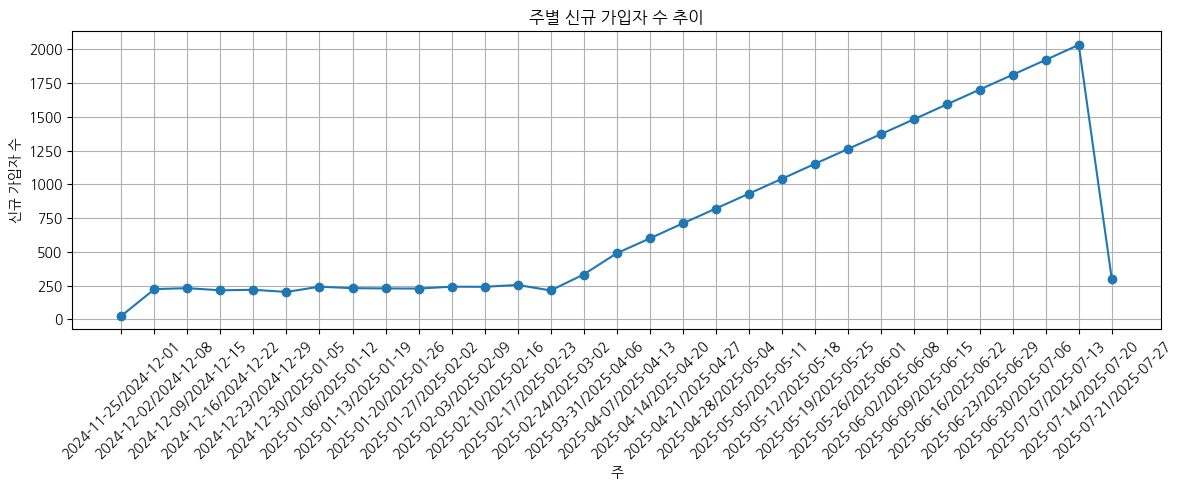

In [ ]:
#Ï£ºÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò
weekly_signups = (
    users.groupby(users['created_at'].dt.to_period('W'))['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'created_at': 'week', 'user_id': 'new_users'})
)

plt.figure(figsize=(12,5))
plt.plot(weekly_signups['week'].astype(str), weekly_signups['new_users'], marker='o')
plt.title("Ï£ºÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò Ï∂îÏù¥")
plt.xlabel("Ï£º")
plt.ylabel("Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# ÏõîÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò by df
monthly_signups = (
    users.groupby(users['created_at'].dt.to_period('M'))['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'created_at': 'month', 'user_id': 'new_users'})
)

# Period ‚Üí Î¨∏ÏûêÏó¥ Î≥ÄÌôò
monthly_signups['month'] = monthly_signups['month'].astype(str)

monthly_signups


month  new_users
0  2024-12        976
1  2025-01       1018
2  2025-02        974
3  2025-03         32
4  2025-04       2468
5  2025-05       4677
6  2025-06       6585
7  2025-07       5815

In [ ]:
print(users['created_at'].min(), users['created_at'].max())


2024-12-01 00:36:00 2025-07-21 23:59:50


## Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú
ÏïÑÏ£º Ïûò ÏÑ±Ïû•ÌïòÍ≥† ÏûàÍµ¨Îßå „Öé„Öé

In [ ]:
campaigns.head()

campaign_id          name utm_source utm_campaign
0     cmp_001  Spring Promo   facebook     spring24
1     cmp_002      Referral   referral    ref_buddy
2     cmp_003    Google CPC     google        sem24

In [ ]:
plan_history.value_counts()

user_id           change_time          plan_name      plan_status  reason       
usr_fff254c46f6f  2025-06-24 00:00:00  annual_pro     canceled     user_canceled    1
usr_000d248833e6  2025-02-02 12:40:00  annual_pro     active       existing_user    1
usr_000e72325c7f  2025-07-05 00:00:00  annual_pro     active       trial_to_paid    1
usr_0014750e8701  2025-01-07 06:51:00  monthly_pro    canceled     existing_user    1
usr_001d27fb6e09  2025-07-03 00:00:00  annual_basic   active       trial_to_paid    1
                                                                                   ..
usr_00626dfefcac  2024-12-15 13:56:00  monthly_basic  active       existing_user    1
usr_005853bff0c1  2025-07-08 00:00:00  annual_basic   active       trial_to_paid    1
usr_0056b3e1524e  2025-07-13 00:00:00  monthly_basic  active       trial_to_paid    1
usr_005489698224  2025-06-13 00:00:00  monthly_pro    active       trial_to_paid    1
usr_004f17097579  2025-05-09 00:00:00  monthly_pro    active       trial_to_paid    1
Name: count, Length: 7911, dtype: int64

## Í≥†Í∞ù Î∂ÑÏÑù

### 1. Í≥†Í∞ù Ïù¥ÌÉà Í∞ÄÎä•ÏÑ± Î∂ÑÏÑù

In [ ]:
# import pandas as pd
# import numpy as np
# from pathlib import Path

# # === ÌååÎùºÎØ∏ÌÑ∞ / ÏÉÅÏàò ===
# LESSON_EVENTS = {"lesson_played", "first_lesson_played"}
# DROP_RATIO_THRESHOLD = 0.5            # Î≤†Ïù¥Ïä§ÎùºÏù∏ ÎåÄÎπÑ 50% ÎØ∏Îßå
# MIN_WEEKS_BELOW_THRESHOLD = 2         # Ï°∞Í±¥ ÎßåÏ°± Ï£º ÏµúÏÜå 2Ï£º
# EVAL_WEEKS_FROM_BASELINE = None       # Ïòà: 8 Î°ú Ï†úÌïú Í∞ÄÎä• (ÏóÜÏúºÎ©¥ Ï†ÑÏ≤¥)

# # === Ï∂úÎ†• Í≤ΩÎ°ú (ÏõêÌïòÎäî Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤Ω Í∞ÄÎä•) ===
# BASE = Path("/content/drive/MyDrive/project4/data")
# out1 = BASE / "interest_drop_users.csv"
# out2 = BASE / "interest_drop_weekly_counts_sample.csv"
# out3 = BASE / "interest_drop_users_baseline_debug.csv"

# # --------------------------
# # 1) Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨
# # --------------------------
# # event_timestampÎ•º Î∞òÎìúÏãú datetimeÏúºÎ°ú
# if "event_timestamp" in event_logs.columns:
#     event_logs["event_timestamp"] = pd.to_datetime(event_logs["event_timestamp"], errors="coerce")
# else:
#     raise ValueError("event_logsÏóê 'event_timestamp' Ïª¨ÎüºÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.")

# # created_atÏù¥ ÏûàÏúºÎ©¥ datetime Î≥ÄÌôò
# if "created_at" in users.columns:
#     users["created_at"] = pd.to_datetime(users["created_at"], errors="coerce")

# # --------------------------
# # 2) ÏàòÍ∞ï Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú ‚Üí Ï£ºÏ∞® ÏßëÍ≥Ñ
# # --------------------------
# if "event_name" not in event_logs.columns:
#     raise ValueError("event_logsÏóê 'event_name' Ïª¨ÎüºÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.")

# lesson_df = event_logs[event_logs["event_name"].isin(LESSON_EVENTS)].copy()

# if lesson_df.empty:
#     print("‚Äª lesson_played/first_lesson_played Ïù¥Î≤§Ìä∏Í∞Ä ÏóÜÏäµÎãàÎã§. Î∂ÑÏÑùÏùÑ Ï¢ÖÎ£åÌï©ÎãàÎã§.")
#     # ÌïÑÏöîÌïòÎ©¥ Ïó¨Í∏∞ÏÑú page_viewed Îì± Îã§Î•∏ ÏÜåÎπÑ ÏßÄÌëúÎ°ú ÎåÄÏ≤¥ Í∞ÄÎä•
# else:
#     lesson_df["week"] = lesson_df["event_timestamp"].dt.to_period("W").apply(lambda r: r.start_time)
#     weekly_counts = (
#         lesson_df.groupby(["user_id", "week"], as_index=False)
#         .size()
#         .rename(columns={"size": "lesson_count"})
#     )

#     # --------------------------
#     # 3) Î≤†Ïù¥Ïä§ÎùºÏù∏(Í∏∞Ï§Ä Ï£º) ÏÑ§Ï†ï
#     #    - users.created_at ÏûàÏúºÎ©¥ Í∞ÄÏûÖ Ï£º
#     #    - ÏóÜÍ±∞ÎÇò Ï†ÑÎ∂Ä Í≤∞Ï∏°Ïù¥Î©¥ Í∞Å Ïú†Ï†ÄÏùò 'Ï≤´ ÏàòÍ∞ï Ï£º'Î•º Î≤†Ïù¥Ïä§ÎùºÏù∏ÏúºÎ°ú
#     # --------------------------
#     users = users.copy()
#     baseline_from_created = False
#     if "created_at" in users.columns and users["created_at"].notna().any():
#         users["baseline_week"] = users["created_at"].dt.to_period("W").apply(lambda r: r.start_time)
#         baseline_from_created = True

#     if ("baseline_week" not in users.columns) or users["baseline_week"].isna().all():
#         # Ï≤´ ÏàòÍ∞ï Ï£ºÎ°ú ÎåÄÏ≤¥
#         first_weeks = (
#             weekly_counts.groupby("user_id")["week"]
#             .min()
#             .reset_index()
#             .rename(columns={"week": "baseline_week"})
#         )
#         users = users.drop(columns=[c for c in ["baseline_week"] if c in users.columns], errors="ignore")
#         users = users.merge(first_weeks, on="user_id", how="left")

#     # Ï£ºÍ∞Ñ Ïπ¥Ïö¥Ìä∏ÏôÄ baseline Î≥ëÌï©
#     weekly_counts = weekly_counts.merge(users[["user_id", "baseline_week"]], on="user_id", how="left")

#     # baseline Ï£ºÏùò ÏãúÏ≤≠ ÌöüÏàò
#     baseline = weekly_counts[weekly_counts["week"] == weekly_counts["baseline_week"]][["user_id", "lesson_count"]]
#     baseline = baseline.rename(columns={"lesson_count": "baseline_count"})
#     weekly_counts = weekly_counts.merge(baseline, on="user_id", how="left")

#     # baseline_count Í≤∞Ï∏° ‚Üí Ïú†Ï†ÄÏùò Ï≤´ Ï£º lesson_countÎ°ú ÎåÄÏ≤¥
#     weekly_counts["baseline_count"] = weekly_counts["baseline_count"].fillna(
#         weekly_counts.groupby("user_id")["lesson_count"].transform("first")
#     )

#     # --------------------------
#     # 4) Î≥ÄÌôîÏú® / Í¥ÄÏã¨ÏÇ¨ Í≥†Í∞à ÌîåÎûòÍ∑∏
#     # --------------------------
#     # Ï£ºÏ∞® Ï∞®Ïù¥(Ï£º Îã®ÏúÑ)
#     weekly_counts["week_num_from_baseline"] = (
#         (weekly_counts["week"] - weekly_counts["baseline_week"]).dt.days // 7
#     )

#     # ÌèâÍ∞Ä Í∏∞Í∞Ñ Ï†úÌïú(ÏòµÏÖò)
#     if EVAL_WEEKS_FROM_BASELINE is not None:
#         weekly_counts = weekly_counts[
#             (weekly_counts["week_num_from_baseline"] >= 0) &
#             (weekly_counts["week_num_from_baseline"] <= EVAL_WEEKS_FROM_BASELINE)
#         ]

#     # Î≥ÄÌôîÏú® (0 ÎÇòÎàóÏÖà Î∞©ÏßÄ)
#     weekly_counts["change_ratio"] = np.where(
#         (weekly_counts["baseline_count"] > 0) & weekly_counts["baseline_count"].notna(),
#         weekly_counts["lesson_count"] / weekly_counts["baseline_count"],
#         np.nan
#     )

#     def interest_drop_flag(g: pd.DataFrame) -> bool:
#         # Í∏∞Ï§Ä Ï£º Ïù¥ÌõÑÎßå ÌèâÍ∞Ä
#         g2 = g[g["week_num_from_baseline"] > 0]
#         if g2.empty:
#             return False
#         return (g2["change_ratio"] < DROP_RATIO_THRESHOLD).sum() >= MIN_WEEKS_BELOW_THRESHOLD

#     flag_df = (
#         weekly_counts.groupby("user_id")
#         .apply(interest_drop_flag)
#         .reset_index(name="interest_drop_flag")
#     )

#     # --------------------------
#     # 5) Î≥¥Ï°∞ Ï†ïÎ≥¥ Î≥ëÌï©: ÌòÑÏû¨ Íµ¨ÎèÖ ÏÉÅÌÉú, ÎßàÏßÄÎßâ Ìï¥ÏßÄ ÏÇ¨Ïú†
#     # --------------------------
#     user_keep = [c for c in ["user_id", "plan_status", "subscription_plan"] if c in users.columns]
#     user_status = users[user_keep].drop_duplicates("user_id") if user_keep else pd.DataFrame(columns=["user_id"])

#     if "reason" in plan_history.columns:
#         sort_cols = ["user_id"] + (["change_time"] if "change_time" in plan_history.columns else [])
#         if "change_time" in plan_history.columns:
#             plan_history["change_time"] = pd.to_datetime(plan_history["change_time"], errors="coerce")
#         last_reason = (
#             plan_history.sort_values(sort_cols)
#             .groupby("user_id", as_index=False)
#             .last()[["user_id", "reason"]]
#         )
#     else:
#         last_reason = pd.DataFrame(columns=["user_id", "reason"])

#     result = flag_df.merge(user_status, on="user_id", how="left")
#     if not last_reason.empty:
#         result = result.merge(last_reason, on="user_id", how="left")

#     # --------------------------
#     # 6) Ï†ÄÏû• Î∞è ÏöîÏïΩ
#     # --------------------------
#     # result.to_csv(out1, index=False, encoding="utf-8-sig")
#     # weekly_counts.sort_values(["user_id", "week"]).head(2000).to_csv(out2, index=False, encoding="utf-8-sig")
#     # users[["user_id", "baseline_week"] + [c for c in ["created_at"] if c in users.columns]].to_csv(out3, index=False, encoding="utf-8-sig")

#     print("\n=== ÏöîÏïΩ ÏßÄÌëú ===")
#     print("Í¥ÄÏã¨ÏÇ¨ Í≥†Í∞à ÏùòÏã¨ Ïú†Ï†Ä Ïàò:", int(result["interest_drop_flag"].sum()))
#     print("Ï¥ù Ïú†Ï†Ä Ïàò:", int(result["user_id"].nunique()))
#     print(f"- Í≤∞Í≥º: {out1.name}")
#     print(f"- ÏÉòÌîå Ï£ºÍ∞ÑÏàò: {out2.name}")
#     print(f"- Í∏∞Ï§ÄÏ£º ÎîîÎ≤ÑÍ∑∏: {out3.name}")

#     if baseline_from_created:
#         print("‚Äª Î≤†Ïù¥Ïä§ÎùºÏù∏: users.created_at Í∏∞Ï§Ä")
#     else:
#         print("‚Äª Î≤†Ïù¥Ïä§ÎùºÏù∏: Í∞Å Ïú†Ï†ÄÏùò Ï≤´ ÏàòÍ∞ï Ï£º Í∏∞Ï§Ä")



In [ ]:
# === ÏöîÏïΩ ÏßÄÌëú ===
# Í¥ÄÏã¨ÏÇ¨ Í≥†Í∞à ÏùòÏã¨ Ïú†Ï†Ä Ïàò: 1846
# Ï¥ù Ïú†Ï†Ä Ïàò: 20676
# - Í≤∞Í≥º: interest_drop_users.csv
# - ÏÉòÌîå Ï£ºÍ∞ÑÏàò: interest_drop_weekly_counts_sample.csv
# - Í∏∞Ï§ÄÏ£º ÎîîÎ≤ÑÍ∑∏: interest_drop_users_baseline_debug.csv
# ‚Äª Î≤†Ïù¥Ïä§ÎùºÏù∏: users.created_at Í∏∞Ï§Ä

### Î¨∏Ï†úÏ†ê ÌååÏïÖÏùÑ ÏúÑÌïú EDA

In [ ]:
campaigns.head()

campaign_id          name utm_source utm_campaign
0     cmp_001  Spring Promo   facebook     spring24
1     cmp_002      Referral   referral    ref_buddy
2     cmp_003    Google CPC     google        sem24

In [ ]:
referral_events.head()

referrer_user_id  referred_user_id        referral_time referral_code
0  usr_6b87a57bd775  usr_999627af31c9  2025-01-03 07:00:00   rf_2dc98f20
1  usr_065a57484a03  usr_97c482c5ea09  2024-12-04 19:23:00   rf_323a083c
2  usr_b783533a534b  usr_039406094001  2025-01-14 15:12:00   rf_9b6ed228
3  usr_999627af31c9  usr_baae86ef556b  2025-02-15 11:50:00   rf_50e5a02d
4  usr_2b0c7bbc467f  usr_2752111a2aa5  2024-12-22 02:32:00   rf_86fb7f63

In [ ]:
push_events.head()

push_id           user_id              sent_at  opened  push_type
0  push_c0fa6339  usr_d2d410ce462c  2025-04-01 19:49:34    True  promotion
1  push_c596b41f  usr_1e61c54ffe43  2025-04-01 21:37:44   False   reminder
2  push_cc6496a2  usr_bc37c1c9df4a  2025-04-01 04:00:29   False   reminder
3  push_a32df886  usr_eaf94e026f0e  2025-04-01 11:16:08   False   reminder
4  push_6186b3a8  usr_e18d3381a0a4  2025-04-01 16:42:10    True     system

In [ ]:
referral_events.head()

referrer_user_id  referred_user_id        referral_time referral_code
0  usr_6b87a57bd775  usr_999627af31c9  2025-01-03 07:00:00   rf_2dc98f20
1  usr_065a57484a03  usr_97c482c5ea09  2024-12-04 19:23:00   rf_323a083c
2  usr_b783533a534b  usr_039406094001  2025-01-14 15:12:00   rf_9b6ed228
3  usr_999627af31c9  usr_baae86ef556b  2025-02-15 11:50:00   rf_50e5a02d
4  usr_2b0c7bbc467f  usr_2752111a2aa5  2024-12-22 02:32:00   rf_86fb7f63

In [ ]:
users.head()

# campaign_id = ÎÇ¥Î∂Ä ÏãúÏä§ÌÖúÏóêÏÑú Í¥ÄÎ¶¨ÌïòÎäî Ï∫†ÌéòÏù∏ ÏãùÎ≥ÑÏûê
# utm_source = Í∑∏ Ï∫†ÌéòÏù∏Ïùò Ïú†ÏûÖ Ï±ÑÎÑê
# utm_campaign = Í∑∏ Ï∫†ÌéòÏù∏Ïùò Ïù¥Î¶Ñ(ÌîÑÎ°úÎ™®ÏÖò ÏΩîÎìú)

user_id          created_at         last_seen_at  \
0  usr_6b87a57bd775 2025-02-09 12:50:00  2025-07-09 00:05:00   
1  usr_b95ee57a273a 2024-12-09 20:57:00  2025-07-19 09:29:00   
2  usr_fc7ffc4130f7 2025-01-07 02:18:00  2025-07-20 12:57:00   
3  usr_f0dbe9c02021 2025-01-25 11:14:00  2025-07-09 03:16:00   
4  usr_6f08473e5134 2025-01-30 02:22:00  2025-07-03 02:55:00   

                   email acquisition_source subscription_plan plan_status  \
0  jinhyeonu@example.net           referral              none        none   
1       wgim@example.com           referral        annual_pro      active   
2   coejaeho@example.com       facebook_ads       monthly_pro      active   
3       ngim@example.com         google_cpc       monthly_pro      active   
4    gimujin@example.com             direct              none        none   

  device_type      plan_start_date plan_end_date gender age_group  age  \
0         web                  NaN           NaN      M       30s   39   
1     android  2024-12-16 20:57:00           NaN      M       30s   35   
2         ios           2025-05-16           NaN      M       10s   16   
3     android  2025-01-26 11:14:00           NaN      F       40s   48   
4     android                  NaN           NaN      M       30s   31   

  campaign_id utm_source utm_campaign  
0     cmp_003     google        sem24  
1     cmp_001   facebook     spring24  
2     cmp_003     google        sem24  
3     cmp_001   facebook     spring24  
4     cmp_001   facebook     spring24

In [ ]:
users['utm_campaign'].value_counts()

utm_campaign
sem24        7672
spring24     7441
ref_buddy    7432
Name: count, dtype: int64

<Axes: ylabel='count'>

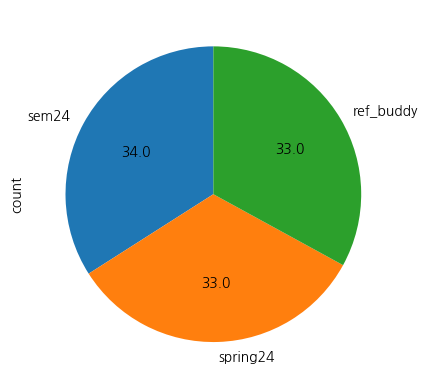

In [ ]:
users['utm_campaign'].value_counts().plot.pie(autopct='%0.1f',startangle=90)

# Î¥Ñ ÏãúÏ¶å ÌïúÏ†ï ÌîÑÎ°úÎ™®ÏÖò
# Ï∂îÏ≤úÏù∏(ÏπúÍµ¨ Ï¥àÎåÄ) Ï∫†ÌéòÏù∏
# Íµ¨Í∏Ä Í≤ÄÏÉâÍ¥ëÍ≥†(Click Per Cost) Ï∫†ÌéòÏù∏

<Axes: ylabel='count'>

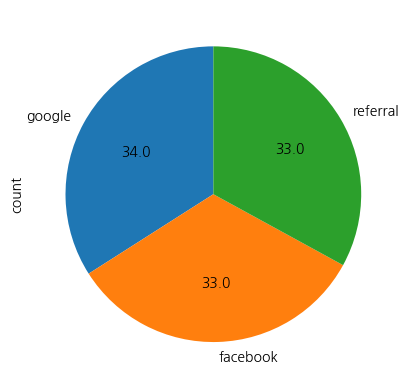

In [ ]:
users['utm_source'].value_counts().plot.pie(autopct='%0.1f',startangle=90)


In [ ]:
import pandas as pd

# CSV Î∂àÎü¨Ïò§Í∏∞
payment_transactions = pd.read_csv("/content/drive/MyDrive/project4/data/payment_transactions.csv")

# 1. ÏÑ±Í≥µ Í≤∞Ï†úÎßå ÌïÑÌÑ∞ÎßÅ
success_payments = payment_transactions[payment_transactions["status"] == "success"]

# 2. Ïú†Ï†ÄÎ≥Ñ Ï¥ù ÏßÄÏ∂ú Í≥ÑÏÇ∞
user_spending = success_payments.groupby("user_id")["amount"].sum()

# 3. ÌèâÍ∑† ÏßÄÏ∂ú Í∏àÏï° Í≥ÑÏÇ∞
avg_spending = user_spending.mean()

print(f"Í≥†Í∞ù 1Ïù∏Îãπ ÌèâÍ∑† ÏßÄÏ∂ú Í∏àÏï°: {avg_spending:.2f} Îã¨Îü¨")


Í≥†Í∞ù 1Ïù∏Îãπ ÌèâÍ∑† ÏßÄÏ∂ú Í∏àÏï°: 81.63 Îã¨Îü¨


# Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Ï≤òÎ¶¨ÏÉÅÌÉú , Í∞êÏ†ï Î∂ÑÏÑù

## Ï≤òÎ¶¨ÏÉÅÌÉú Î∂ÑÏÑù

In [ ]:
chat_events.head()

chat_id           user_id              sent_at                 tag  \
0  chat_d678903d6e  usr_d9957640e673  2025-04-01 12:39:32               Error   
1  chat_a4a7c3a003  usr_53edf6429808  2025-04-01 13:59:07               Other   
2  chat_086533804d  usr_b3b6d07c5a6a  2025-04-01 10:48:29  Feature Suggestion   
3  chat_a52fea733c  usr_f14a5d9a25cc  2025-04-01 03:58:33               Other   
4  chat_f84a34f30f  usr_a933fb6930fa  2025-04-01 04:11:18            Learning   

    emotion channel       status  
0  negative     web         open  
1  negative  in_app  in_progress  
2   neutral   email  in_progress  
3   neutral  in_app  in_progress  
4   neutral  in_app  in_progress

In [ ]:
!pip install koreanize_matplotlib

=== Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉú (Î°±Ìè¨Îß∑) ===
                   tag       status  count
0              Account       closed     76
1              Account  in_progress     73
3              Account     resolved     73
2              Account         open     71
7            Complaint     resolved     88
5            Complaint  in_progress     75
6            Complaint         open     72
4            Complaint       closed     58
10               Error         open     69
9                Error  in_progress     65
8                Error       closed     57
11               Error     resolved     57
12  Feature Suggestion       closed     73
13  Feature Suggestion  in_progress     70
15  Feature Suggestion     resolved     62
14  Feature Suggestion         open     56
18            Learning         open     72
16            Learning       closed     59
19            Learning     resolved     56
17            Learning  in_progress     54

=== Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉú (ÌîºÎ≤ó/Í±

<Figure size 1000x600 with 0 Axes>

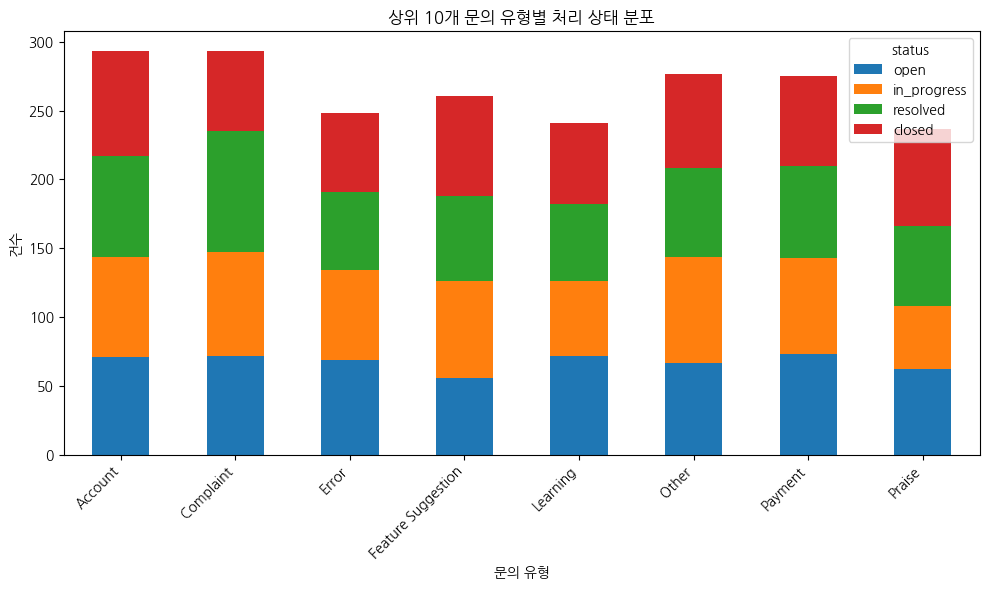

In [ ]:
# Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Ï≤òÎ¶¨ÏÉÅÌÉú
import pandas as pd

# 0) Ï†ÑÏ≤òÎ¶¨: ÌÉúÍ∑∏ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
chat_tmp = chat_events.copy()
chat_tmp['tag'] = chat_tmp['tag'].fillna('ÎØ∏ÏßÄÏ†ï')

# 1) Î¨∏Ïùò Ïú†Ìòï(tag) x Ï≤òÎ¶¨ ÏÉÅÌÉú(status) Í±¥Ïàò ÌÖåÏù¥Î∏î (Í∏¥ ÌòïÏãù)
tag_status_counts = (
    chat_tmp
    .groupby(['tag', 'status'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
    .sort_values(['tag', 'count'], ascending=[True, False])
)

print("=== Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉú (Î°±Ìè¨Îß∑) ===")
print(tag_status_counts.head(20))  # ÏÉÅÏúÑ 20ÌñâÎßå ÌôïÏù∏

# 2) ÌîºÎ≤ó: Ìñâ=tag, Ïó¥=status ‚Üí Í±¥Ïàò Îß§Ìä∏Î¶≠Ïä§
status_order = ['open', 'in_progress', 'resolved', 'closed']
tag_status_pivot = (
    tag_status_counts
    .pivot(index='tag', columns='status', values='count')
    .fillna(0)
    .astype(int)
    .reindex(columns=[c for c in status_order if c in tag_status_counts['status'].unique()], fill_value=0)
)

print("\n=== Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉú (ÌîºÎ≤ó/Í±¥Ïàò) ===")
print(tag_status_pivot.head(10))

# 3) Î¨∏Ïùò Ïú†Ìòï ÎÇ¥ ÎπÑÏú®(= Í∞Å tag Ìñâ Ìï©ÏúºÎ°ú ÎÇòÎàà ÎπÑÏú®)
tag_row_sum = tag_status_pivot.sum(axis=1).replace(0, pd.NA)
tag_status_ratio = (tag_status_pivot.div(tag_row_sum, axis=0) * 100).round(1)

print("\n=== Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉú ÎπÑÏú®(%) ===")
print(tag_status_ratio.head(10))


# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import koreanize_matplotlib  # ÌïúÍ∏Ä Ìè∞Ìä∏ Ï†ÅÏö©

# NaN ÌÉúÍ∑∏ Ï≤òÎ¶¨
chat_tmp = chat_events.copy()
chat_tmp['tag'] = chat_tmp['tag'].fillna('ÎØ∏ÏßÄÏ†ï')

# ÏÉÅÏúÑ 10Í∞ú ÌÉúÍ∑∏Îßå
top_tags = chat_tmp['tag'].value_counts().head(10).index
tag_top = chat_tmp[chat_tmp['tag'].isin(top_tags)]

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
status_order = ['open', 'in_progress', 'resolved', 'closed']
ct_tag_status = pd.crosstab(tag_top['tag'], tag_top['status'])
ct_tag_status = ct_tag_status[[c for c in status_order if c in ct_tag_status.columns]]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
ct_tag_status.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('ÏÉÅÏúÑ 10Í∞ú Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉú Î∂ÑÌè¨')
plt.xlabel('Î¨∏Ïùò Ïú†Ìòï')
plt.ylabel('Í±¥Ïàò')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# CSV Ï†ÄÏû•
tag_status_pivot.to_csv("Î¨∏ÏùòÏú†ÌòïÎ≥Ñ_Ï≤òÎ¶¨ÏÉÅÌÉú_ÌîºÎ≤ó.csv", encoding="utf-8-sig")
tag_status_counts.to_csv("Î¨∏ÏùòÏú†ÌòïÎ≥Ñ_Ï≤òÎ¶¨ÏÉÅÌÉú.csv", index=False, encoding="utf-8-sig")

<Axes: xlabel='tag'>

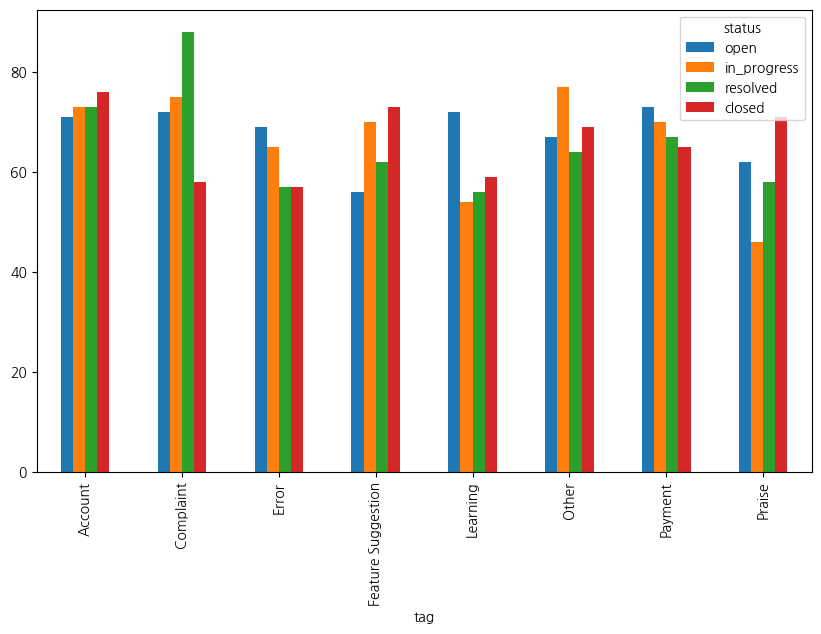

In [ ]:
# Î≥¥Í∏∞ Î∂àÌé∏Ìï¥ Îã§Î•∏ Î∞©ÏãùÏùò ÏãúÍ∞Å
ct_tag_status.plot(kind='bar', stacked=False, figsize=(10,6))


In [ ]:
chat_events['tag'].value_counts()

tag
Complaint             293
Account               293
Other                 277
Payment               275
Feature Suggestion    261
Error                 248
Learning              241
Praise                237
Name: count, dtype: int64

In [ ]:
# import matplotlib.pyplot as plt
# import koreanize_matplotlib

# plt.figure(figsize=(7,5))
# bars = plt.bar(top_tag_per_status_df['status'],
#                top_tag_per_status_df['count'],
#                color='skyblue')

# for i, (cnt, tag) in enumerate(zip(top_tag_per_status_df['count'], top_tag_per_status_df['tag'])):
#     # Ï≤´ Ï§Ñ: ÌÉúÍ∑∏Î™Ö, Îëê Î≤àÏß∏ Ï§Ñ: Í±¥Ïàò
#     plt.text(i, cnt + 2, f"{tag}", ha='center', va='bottom', fontsize=10)
#     plt.text(i, cnt - 5, f"{cnt}Í±¥", ha='center', va='bottom', fontsize=9, color='black')

# plt.title("Í∞Å ÏÉÅÌÉúÎ≥Ñ ÏµúÎã§ Î¨∏Ïùò Ïú†Ìòï")
# plt.xlabel("Ï≤òÎ¶¨ ÏÉÅÌÉú")
# plt.ylabel("Í±¥Ïàò")
# plt.ylim(0, top_tag_per_status_df['count'].max() + 15)  # Ïó¨Ïú† Í≥µÍ∞Ñ ÌôïÎ≥¥
# plt.tight_layout()
# plt.show()


                  tag       status  count
0             Account       closed     76
1           Complaint     resolved     88
2               Error         open     69
3  Feature Suggestion       closed     73
4            Learning         open     72
5               Other  in_progress     77
6             Payment         open     73
7              Praise       closed     71


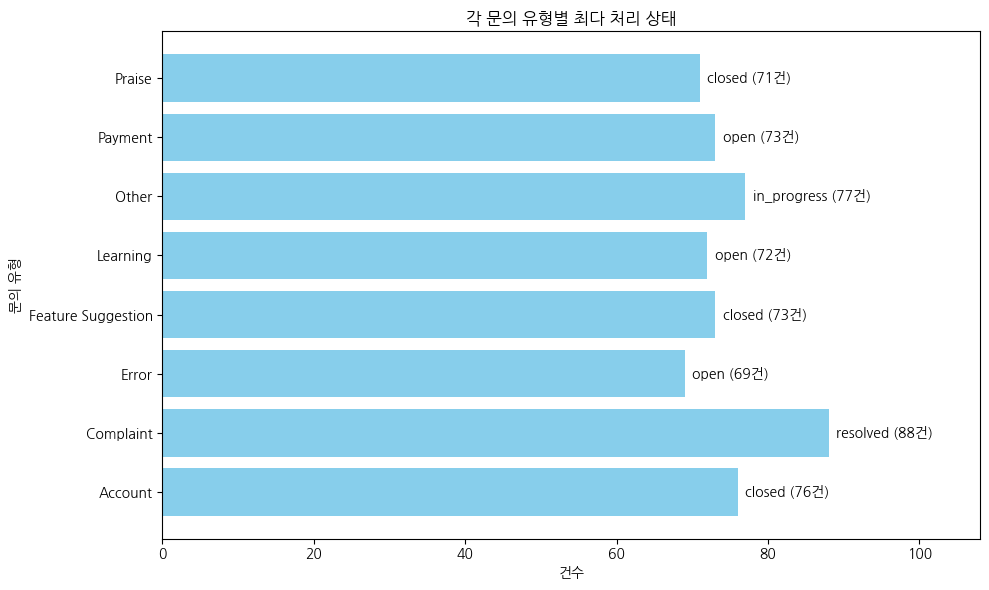

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# NaN ÌÉúÍ∑∏ Ï≤òÎ¶¨
chat_tmp = chat_events.copy()
chat_tmp['tag'] = chat_tmp['tag'].fillna('ÎØ∏ÏßÄÏ†ï')

# Í∞Å tagÎ≥Ñ ÏµúÎã§ ÏÉÅÌÉú Íµ¨ÌïòÍ∏∞
top_status_per_tag = (
    chat_tmp
    .groupby(['tag', 'status'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
    .sort_values(['tag', 'count'], ascending=[True, False])
    .groupby('tag')  # ÌÉúÍ∑∏Î≥ÑÎ°ú
    .head(1)         # ÏµúÎã§ ÏÉÅÌÉú 1Í∞úÎßå ÏÑ†ÌÉù
    .reset_index(drop=True)
)

print(top_status_per_tag)

# ÏãúÍ∞ÅÌôî (Í∞ÄÎ°ú ÎßâÎåÄ)
plt.figure(figsize=(10,6))
bars = plt.barh(top_status_per_tag['tag'], top_status_per_tag['count'], color='skyblue')

# Î∞îÏóê ÌÖçÏä§Ìä∏ ÌëúÏãú (ÏÉÅÌÉú + Í±¥Ïàò)
for bar, status, count in zip(bars, top_status_per_tag['status'], top_status_per_tag['count']):
    plt.text(bar.get_width() + 1,
             bar.get_y() + bar.get_height()/2,
             f"{status} ({count}Í±¥)",
             va='center', fontsize=10)

plt.title("Í∞Å Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ ÏµúÎã§ Ï≤òÎ¶¨ ÏÉÅÌÉú")
plt.xlabel("Í±¥Ïàò")
plt.ylabel("Î¨∏Ïùò Ïú†Ìòï")
plt.xlim(0, top_status_per_tag['count'].max() + 20)  # Ïó¨Ïú† Í≥µÍ∞Ñ ÌôïÎ≥¥
plt.tight_layout()
plt.show()


## Í∞êÏ†ïÎ∂ÑÏÑù

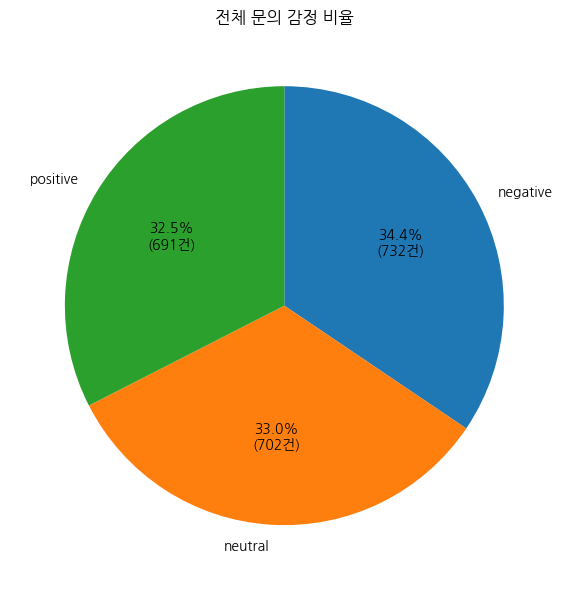

In [ ]:
# Ï†ÑÏ≤¥ Í∞êÏ†ï Î∂ÑÌè¨
import matplotlib.pyplot as plt
import koreanize_matplotlib  # ÌïúÍ∏Ä Ìè∞Ìä∏ Ï†ÅÏö©

# 1) Í∞êÏ†ï Î∂ÑÌè¨ ÏßëÍ≥Ñ
emotion_counts = chat_events['emotion'].value_counts()
total = int(emotion_counts.sum())

# 2) ÌååÏù¥Ï∞®Ìä∏
plt.figure(figsize=(6,6))
plt.pie(
    emotion_counts.values,
    labels=emotion_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(round(p*total/100))}Í±¥)',
    startangle=90,
    counterclock=False,
    textprops={'fontsize':10}
)
plt.title('Ï†ÑÏ≤¥ Î¨∏Ïùò Í∞êÏ†ï ÎπÑÏú®')
plt.tight_layout()
plt.show()


=== Ï≤òÎ¶¨ ÏÉÅÌÉú √ó Í∞êÏ†ï (Í±¥Ïàò) ===
emotion      negative  neutral  positive
status                                  
open              201      178       163
in_progress       179      164       187
resolved          180      177       168
closed            172      183       173

=== Ï≤òÎ¶¨ ÏÉÅÌÉú √ó Í∞êÏ†ï (ÎπÑÏú® %) ===
emotion      negative  neutral  positive
status                                  
open             37.1     32.8      30.1
in_progress      33.8     30.9      35.3
resolved         34.3     33.7      32.0
closed           32.6     34.7      32.8


<Figure size 900x500 with 0 Axes>

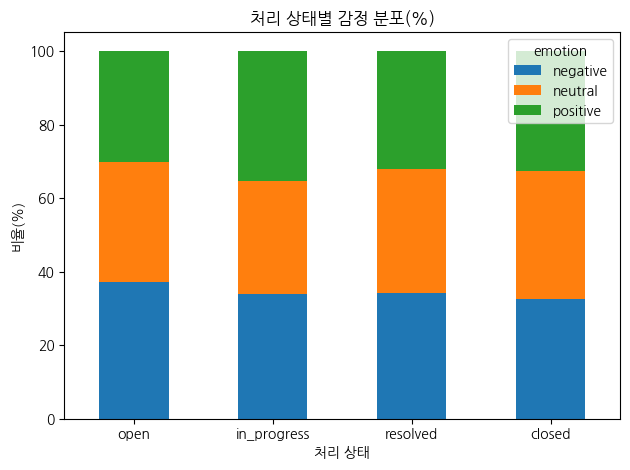

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib  # ÌïúÍ∏Ä Ìè∞Ìä∏ Ï†ÅÏö©

# 1) ÍµêÏ∞®Ìëú (Í±¥Ïàò)
status_order = ['open', 'in_progress', 'resolved', 'closed']
ct = pd.crosstab(chat_events['status'], chat_events['emotion'])

# ÏÉÅÌÉú ÏàúÏÑú Ï†ïÎ¶¨(ÏûàÎäî Í≤ÉÎßå Î∞òÏòÅ)
ct = ct.reindex([s for s in status_order if s in ct.index])

print("=== Ï≤òÎ¶¨ ÏÉÅÌÉú √ó Í∞êÏ†ï (Í±¥Ïàò) ===")
print(ct)

# 2) ÏÉÅÌÉúÎ≥Ñ Í∞êÏ†ï ÎπÑÏú®(%) Í≥ÑÏÇ∞
ratio = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)

print("\n=== Ï≤òÎ¶¨ ÏÉÅÌÉú √ó Í∞êÏ†ï (ÎπÑÏú® %) ===")
print(ratio)

# 3) ÏãúÍ∞ÅÌôî: ÏÉÅÌÉúÎ≥Ñ Í∞êÏ†ï ÎπÑÏú®(%) - Ïä§ÌÉùÌòï ÎßâÎåÄ (Îã® ÌïòÎÇò)
plt.figure(figsize=(9,5))
ratio.plot(kind='bar', stacked=True)
plt.title('Ï≤òÎ¶¨ ÏÉÅÌÉúÎ≥Ñ Í∞êÏ†ï Î∂ÑÌè¨(%)')
plt.xlabel('Ï≤òÎ¶¨ ÏÉÅÌÉú')
plt.ylabel('ÎπÑÏú®(%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


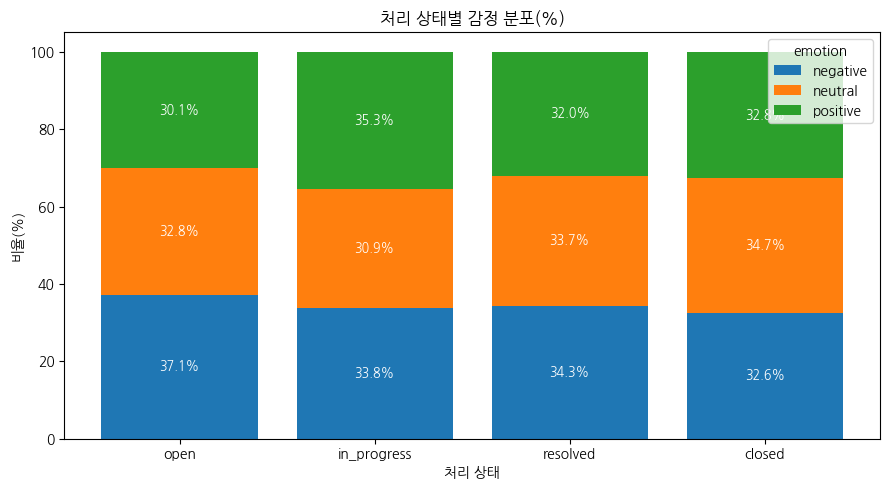

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# ÍµêÏ∞®Ìëú Î∞è ÎπÑÏú® Í≥ÑÏÇ∞
status_order = ['open', 'in_progress', 'resolved', 'closed']
ct = pd.crosstab(chat_events['status'], chat_events['emotion'])
ct = ct.reindex([s for s in status_order if s in ct.index])
ratio = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)

# Ïä§ÌÉùÌòï ÎßâÎåÄ ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(9,5))
bottom_val = [0] * len(ratio)

for emotion in ratio.columns:
    ax.bar(ratio.index, ratio[emotion], bottom=bottom_val, label=emotion)
    # ÎπÑÏú® Í∞í ÌëúÏãú
    for i, val in enumerate(ratio[emotion]):
        if val > 0:  # 0%Îäî ÌëúÏãú Ïïà Ìï®
            ax.text(i, bottom_val[i] + val/2, f"{val}%",
                    ha='center', va='center', fontsize=9, color='white')
    bottom_val = [bottom_val[j] + ratio[emotion].iloc[j] for j in range(len(ratio))]

ax.set_title('Ï≤òÎ¶¨ ÏÉÅÌÉúÎ≥Ñ Í∞êÏ†ï Î∂ÑÌè¨(%)')
ax.set_xlabel('Ï≤òÎ¶¨ ÏÉÅÌÉú')
ax.set_ylabel('ÎπÑÏú®(%)')
ax.legend(title='emotion')
plt.tight_layout()
plt.show()


## Í∞êÏ†ïÎ∂ÑÏÑù Í≤∞Î°†
Î∂ÑÏÑùÍ≤∞Í≥º ÏßÄÍ∏à ÏÉÅÌÉúÎ°úÎäî ÏùòÎØ∏ ÏûàÎäî Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂úÏù¥ ÌûòÎì§Ïñ¥ Î≥¥ÏûÑ  
 > Í∏∞Í∞ÑÎ≥Ñ Í∞êÏ†ïÎ∂ÑÏÑùÏúºÎ°ú ÎÑòÏñ¥Í∞ê

## Í∞êÏ†ïÎ∂ÑÏÑù2(Í∏∞Í∞ÑÎ≥Ñ)

### ÏõîÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® Î∂ÑÏÑù

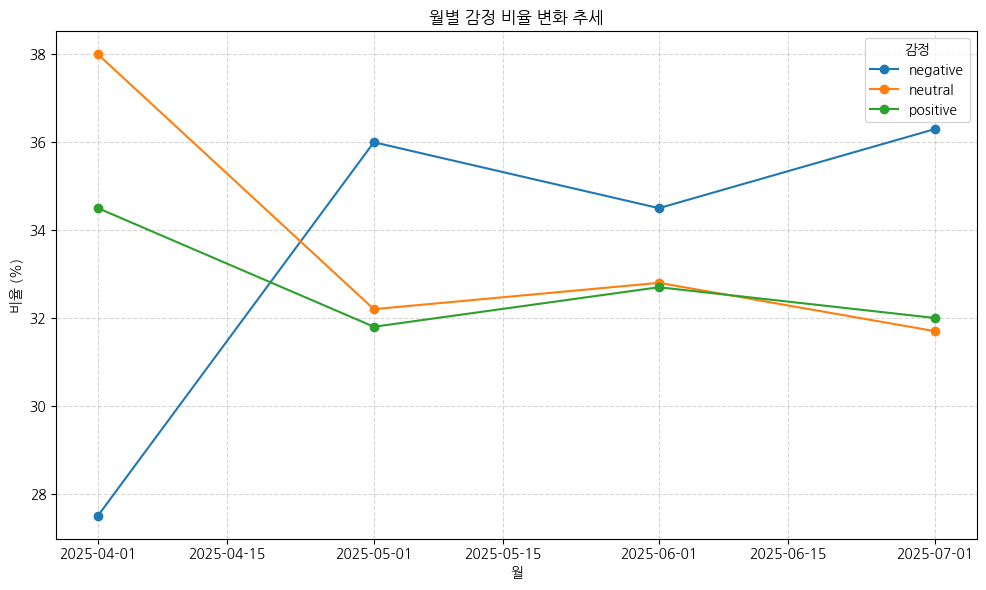

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1) sent_atÏùÑ datetimeÏúºÎ°ú Î≥ÄÌôò
chat_events['sent_at'] = pd.to_datetime(chat_events['sent_at'])

# 2) Ïõî Îã®ÏúÑ Ïª¨Îüº ÏÉùÏÑ±
chat_events['month'] = chat_events['sent_at'].dt.to_period('M').dt.to_timestamp()

# 3) ÏõîÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® ÏßëÍ≥Ñ
monthly_emotion = (
    chat_events
    .groupby(['month', 'emotion'])
    .size()
    .reset_index(name='count')
)

# Ï¥ùÌï© ÎåÄÎπÑ ÎπÑÏú® Í≥ÑÏÇ∞
monthly_total = monthly_emotion.groupby('month')['count'].transform('sum')
monthly_emotion['ratio'] = (monthly_emotion['count'] / monthly_total * 100).round(1)

# 4) ÌîºÎ≤ó (Ìñâ=Ïõî, Ïó¥=emotion, Í∞í=ÎπÑÏú®)
monthly_emotion_pivot = monthly_emotion.pivot(index='month', columns='emotion', values='ratio').fillna(0)

# 5) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
for col in monthly_emotion_pivot.columns:
    plt.plot(monthly_emotion_pivot.index, monthly_emotion_pivot[col], marker='o', label=col)

plt.title('ÏõîÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® Î≥ÄÌôî Ï∂îÏÑ∏')
plt.xlabel('Ïõî')
plt.ylabel('ÎπÑÏú® (%)')
plt.legend(title='Í∞êÏ†ï')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
chat_events['sent_at'].max()

Timestamp('2025-07-21 23:46:40')

In [ ]:
chat_events['sent_at'].min()

Timestamp('2025-04-01 03:58:33')

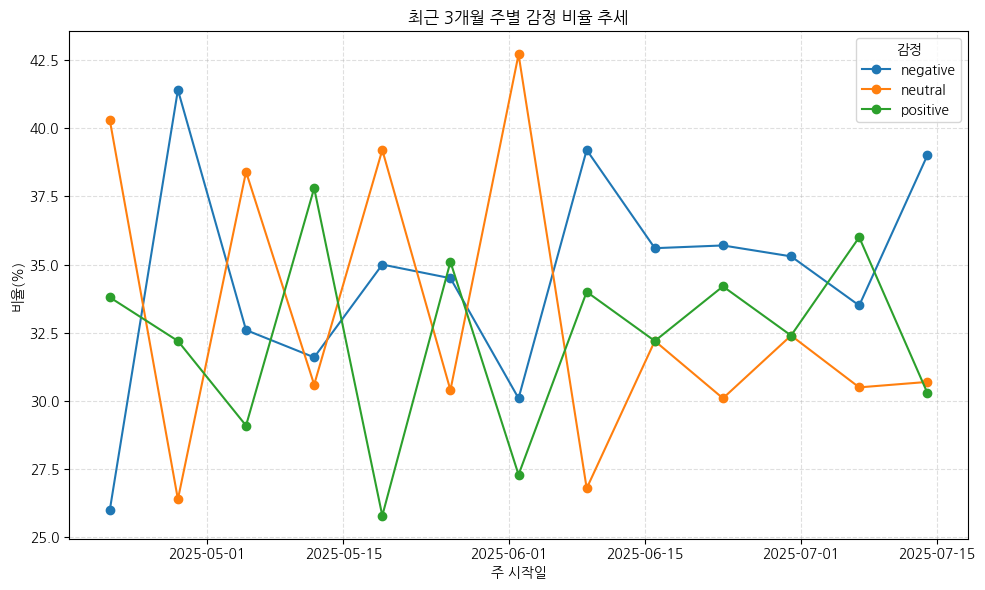

In [ ]:
# ÏµúÍ∑º ÏÉÅÌÉú Î∂ÑÏÑù
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib  # ÌïúÍ∏Ä Ìè∞Ìä∏

# 1) ÎÇ†Ïßú Î≥ÄÌôò
chat_events['sent_at'] = pd.to_datetime(chat_events['sent_at'])

# 2) Î∂ÑÏÑù Í∏∞Í∞Ñ: Îç∞Ïù¥ÌÑ∞ ÏµúÎåÄÏùº Í∏∞Ï§Ä ÏµúÍ∑º 3Í∞úÏõî
end_dt = chat_events['sent_at'].max().normalize()
start_dt = end_dt - pd.DateOffset(months=3)
df = chat_events[(chat_events['sent_at'] >= start_dt) & (chat_events['sent_at'] <= end_dt)].copy()

# 3) Ï£º(week) Îã®ÏúÑ Ïª¨Îüº (Period->Ï£º ÏãúÏûëÏùº Timestamp)
df['week'] = df['sent_at'].dt.to_period('W').apply(lambda r: r.start_time)

# 4) Ï£ºÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® ÏßëÍ≥Ñ
weekly_emotion = (
    df.groupby(['week', 'emotion'])
      .size()
      .reset_index(name='count')
)
weekly_emotion['ratio'] = (
    weekly_emotion['count'] /
    weekly_emotion.groupby('week')['count'].transform('sum') * 100
).round(1)

# 5) ÌîºÎ≤ó: Ìñâ=Ï£º, Ïó¥=Í∞êÏ†ï, Í∞í=ÎπÑÏú®(%)
weekly_pivot = weekly_emotion.pivot(index='week', columns='emotion', values='ratio').fillna(0)

# 6) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
for col in weekly_pivot.columns:
    plt.plot(weekly_pivot.index, weekly_pivot[col], marker='o', label=col)

plt.title('ÏµúÍ∑º 3Í∞úÏõî Ï£ºÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® Ï∂îÏÑ∏')
plt.xlabel('Ï£º ÏãúÏûëÏùº')
plt.ylabel('ÎπÑÏú®(%)')
plt.legend(title='Í∞êÏ†ï')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import koreanize_matplotlib

# # 1) sent_at datetime Î≥ÄÌôò
# chat_events['sent_at'] = pd.to_datetime(chat_events['sent_at'])

# # 2) Ïõî Ïª¨Îüº ÏÉùÏÑ±
# chat_events['month'] = chat_events['sent_at'].dt.to_period('M').dt.to_timestamp()

# # 3) Ïõî √ó ÏÉÅÌÉú √ó Í∞êÏ†ï ÏßëÍ≥Ñ
# monthly_status_emotion = (
#     chat_events
#     .groupby(['month', 'status', 'emotion'])
#     .size()
#     .reset_index(name='count')
# )

# # 4) ÏÉÅÌÉúÎ≥Ñ Ï¥ùÌï© ÎåÄÎπÑ ÎπÑÏú® Í≥ÑÏÇ∞
# monthly_status_total = monthly_status_emotion.groupby(['month', 'status'])['count'].transform('sum')
# monthly_status_emotion['ratio'] = (monthly_status_emotion['count'] / monthly_status_total * 100).round(1)

# # 5) ÏãúÍ∞ÅÌôî: ÏÉÅÌÉúÎ≥Ñ ÏÑúÎ∏åÌîåÎ°Ø (ÏãúÍ≥ÑÏó¥)
# statuses = monthly_status_emotion['status'].unique()
# fig, axes = plt.subplots(len(statuses), 1, figsize=(10, 6), sharex=True)

# for i, status in enumerate(statuses):
#     subset = monthly_status_emotion[monthly_status_emotion['status'] == status]
#     pivot_data = subset.pivot(index='month', columns='emotion', values='ratio').fillna(0)
#     pivot_data.plot(ax=axes[i], marker='o')
#     axes[i].set_title(f"{status} ÏÉÅÌÉúÏùò ÏõîÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® Ï∂îÏÑ∏")
#     axes[i].set_ylabel('ÎπÑÏú®(%)')
#     axes[i].legend(title='Í∞êÏ†ï')

# plt.xlabel('Ïõî')
# plt.tight_layout()
# plt.show()



### ÏõîÎ≥Ñ ÎÑ§Í±∞Ìã∞Î∏å Í±¥Ïàò , Ïª¥ÌîåÎ†àÏù∏ Í±¥Ïàò ÍµêÏ∞® ÎπÑÍµê



       month  negative_count  complaint_count
0 2025-04-01              78               32
1 2025-05-01             177               77
2 2025-06-01             247               97
3 2025-07-01             230               87


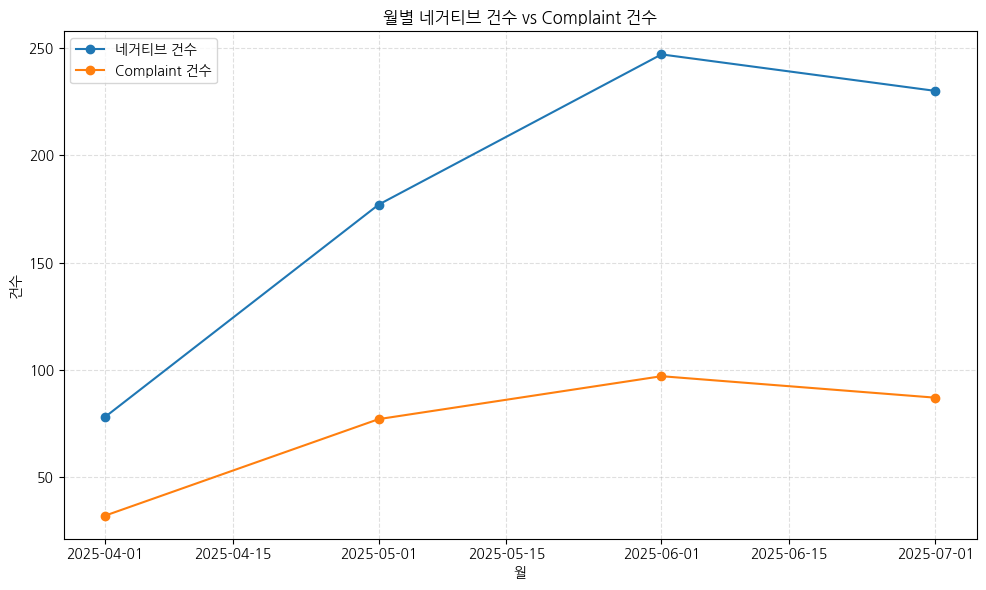

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib  # ÌïúÍ∏Ä Ìè∞Ìä∏

# 1) Ïõî Ïª¨Îüº
chat_events['sent_at'] = pd.to_datetime(chat_events['sent_at'])
chat_events['month'] = chat_events['sent_at'].dt.to_period('M').dt.to_timestamp()

# 2) ÏõîÎ≥Ñ negative Í±¥Ïàò
neg_m = (
    chat_events[chat_events['emotion'] == 'negative']
    .groupby('month').size()
    .reset_index(name='negative_count')
)

# 3) ÏõîÎ≥Ñ Complaint(Î¨∏Ïùò Ïú†Ìòï) Í±¥Ïàò
comp_m = (
    chat_events[chat_events['tag'] == 'Complaint']
    .groupby('month').size()
    .reset_index(name='complaint_count')
)

# 4) Î≥ëÌï© (Ïõî Í∏∞Ï§Ä)
monthly_cmp = pd.merge(neg_m, comp_m, on='month', how='outer').fillna(0)
monthly_cmp = monthly_cmp.sort_values('month')

print(monthly_cmp)

# 5) ÏãúÍ∞ÅÌôî: Îëê ÎùºÏù∏ÏùÑ Ìïú Ï∂ïÏóê
plt.figure(figsize=(10,6))
plt.plot(monthly_cmp['month'], monthly_cmp['negative_count'], marker='o', label='ÎÑ§Í±∞Ìã∞Î∏å Í±¥Ïàò')
plt.plot(monthly_cmp['month'], monthly_cmp['complaint_count'], marker='o', label='Complaint Í±¥Ïàò')

plt.title('ÏõîÎ≥Ñ ÎÑ§Í±∞Ìã∞Î∏å Í±¥Ïàò vs Complaint Í±¥Ïàò')
plt.xlabel('Ïõî')
plt.ylabel('Í±¥Ïàò')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Ïã†Í∑ú Î™®Ïßë Ïù∏ÏõêÏàòÍπåÏßÄ Ìè¨Ìï®Ìïú ÏãúÍ∞ÅÌôî Í∑∏ÎûòÌîÑ


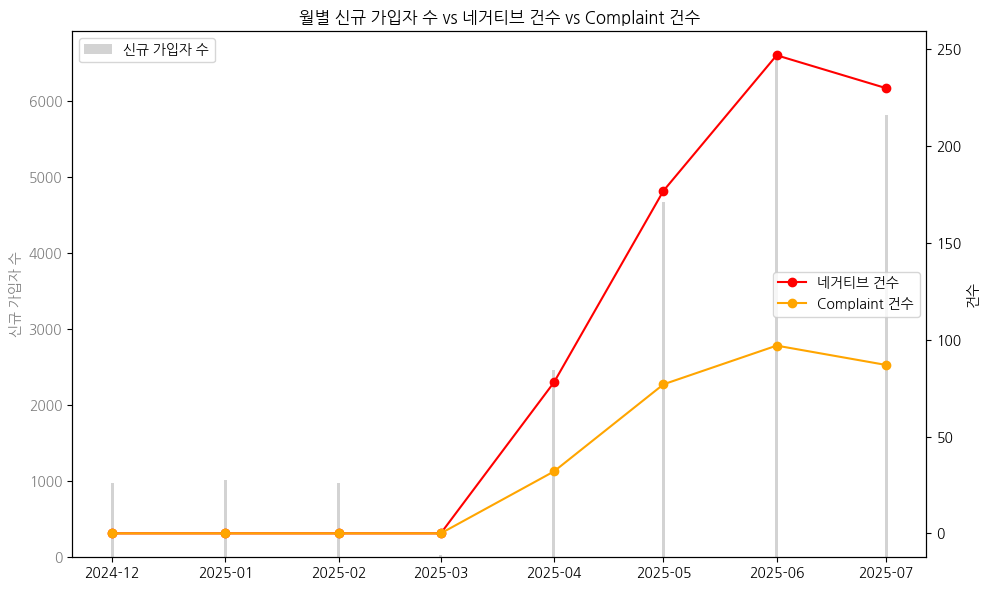

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1) users ÌÖåÏù¥Î∏î ‚Üí ÏõîÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò
users['created_at'] = pd.to_datetime(users['created_at'])
users['month'] = users['created_at'].dt.to_period('M').dt.to_timestamp()

monthly_new_users = (
    users.groupby('month')
    .size()
    .reset_index(name='new_users')
)

# 2) chat_events ÌÖåÏù¥Î∏î ‚Üí ÏõîÎ≥Ñ negative Í±¥Ïàò
chat_events['sent_at'] = pd.to_datetime(chat_events['sent_at'])
chat_events['month'] = chat_events['sent_at'].dt.to_period('M').dt.to_timestamp()

neg_m = (
    chat_events[chat_events['emotion'] == 'negative']
    .groupby('month').size()
    .reset_index(name='negative_count')
)

# 3) chat_events ÌÖåÏù¥Î∏î ‚Üí ÏõîÎ≥Ñ Complaint Í±¥Ïàò
comp_m = (
    chat_events[chat_events['tag'] == 'Complaint']
    .groupby('month').size()
    .reset_index(name='complaint_count')
)

# 4) ÏÑ∏ Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
merged_df = monthly_new_users.merge(neg_m, on='month', how='left').merge(comp_m, on='month', how='left').fillna(0)

# 5) ÏãúÍ∞ÅÌôî

# Î≤îÎ°Ä ÏúÑÏπò Ï°∞Ï†ï Î≤ÑÏ†Ñ
fig, ax1 = plt.subplots(figsize=(10,6))

# Ïã†Í∑ú Í∞ÄÏûÖÏûê ÎßâÎåÄ
ax1.bar(merged_df['month'], merged_df['new_users'], color='lightgray', label='Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò')
ax1.set_ylabel('Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# ÎÑ§Í±∞Ìã∞Î∏å & Complaint ÏÑ†
ax2 = ax1.twinx()
ax2.plot(merged_df['month'], merged_df['negative_count'], marker='o', color='red', label='ÎÑ§Í±∞Ìã∞Î∏å Í±¥Ïàò')
ax2.plot(merged_df['month'], merged_df['complaint_count'], marker='o', color='orange', label='Complaint Í±¥Ïàò')
ax2.set_ylabel('Í±¥Ïàò', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('ÏõîÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò vs ÎÑ§Í±∞Ìã∞Î∏å Í±¥Ïàò vs Complaint Í±¥Ïàò')

# Î≤îÎ°Ä ÏúÑÏπò Î≥ÄÍ≤Ω
ax1.legend(loc='upper left')  # Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò Î≤îÎ°ÄÎäî ÏôºÏ™Ω ÏúÑ
ax2.legend(loc='center right')  # ÎÑ§Í±∞Ìã∞Î∏å/Complaint Î≤îÎ°ÄÎäî Ïò§Î•∏Ï™Ω Ï§ëÏïô

plt.tight_layout()
plt.show()



## Ïù∏ÏÇ¨Ïù¥Ìä∏
Î™©Ï†Å  
* Îçî ÎÇòÏùÄ ÏÑúÎπÑÏä§ Ï†úÍ≥µÍ≥º Í≥†Í∞ù ÎßåÏ°±ÎèÑ Í∞úÏÑ†ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

Î∞©Î≤ï 1: Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉú x Í∞êÏ†ï Î∂ÑÏÑù  
* Í≤∞Í≥º: Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ¬∑Í∞êÏ†ïÎ≥Ñ ÎπÑÏú®Ïù¥ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Í∑†Îì±ÌïòÍ≤å Î∂ÑÌè¨
* Ìï¥ÏÑù: ÌäπÏ†ï Ïú†Ìòï¬∑Í∞êÏ†ïÏóêÏÑú ÎëêÎìúÎü¨ÏßÑ Ìé∏Ï∞®Í∞Ä ÏóÜÏñ¥, ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞Î°úÎäî Í∞úÏÑ† Ìè¨Ïù∏Ìä∏ ÏãùÎ≥Ñ Ïñ¥Î†§ÏõÄ

  
Î∞©Î≤ï 2: Í∏∞Í∞ÑÎ≥Ñ(ÏõîÎ≥Ñ) Í∞êÏ†ï ÎπÑÏú® Î∂ÑÏÑù
* Í≤∞Í≥º: Î∂ÄÏ†ï Í∞êÏ†ï(negative) ÎπÑÏú®Ïù¥ Ï†êÏßÑÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌïòÎäî Ï∂îÏÑ∏ ÌôïÏù∏
* Í∞ÄÏ†ï: Ïã†Í∑ú Í≥†Í∞ùÏù¥ ÎäòÏñ¥ÎÇòÎ©¥ÏÑú Î∂ÄÏ†ï Í∞êÏ†ïÏùÑ Í∞ÄÏßÑ ÏÇ¨ÎûåÏùò Ï†àÎåÄ Í±¥ÏàòÎèÑ Ï¶ùÍ∞ÄÌñàÏùÑ Í≤É
* Ï¶ùÎ™Ö:
  * ÏõîÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê ÏàòÏôÄ negative Í±¥ÏàòÎ•º ÎπÑÍµêÌïú Í≤∞Í≥º, Îëê ÏßÄÌëúÍ∞Ä Ïú†ÏÇ¨Ìïú Ï¶ùÍ∞Ä Ìå®ÌÑ¥ÏùÑ Î≥¥ÏûÑ
  * Complaint Í±¥Ïàò Ïó≠Ïãú Í∞ôÏùÄ ÌùêÎ¶Ñ ‚Üí Ïã†Í∑ú Í≥†Í∞ù Ï¶ùÍ∞ÄÏóê Îî∞Î•∏ ÏûêÏó∞Ïä§Îü¨Ïö¥ Î∂ÄÏ†ï/Î∂àÎßå Í±¥Ïàò Ï¶ùÍ∞ÄÎ°ú Ìï¥ÏÑù Í∞ÄÎä•  
* Î≥¥ÏôÑ ÌïÑÏöî: ÎπÑÏú® Ï¶ùÍ∞ÄÏùò ÏõêÏù∏Ïù¥ Ïã†Í∑ú Í≥†Í∞ù ÎïåÎ¨∏Ïù∏ÏßÄ, Í∏∞Ï°¥ Í≥†Í∞ù Í∞êÏ†ï Î≥ÄÌôî ÎïåÎ¨∏Ïù∏ÏßÄÎäî Ï∂îÍ∞Ä Î∂ÑÏÑù ÌïÑÏöî  
(Ïòà: Ïã†Í∑ú vs Í∏∞Ï°¥ Í≥†Í∞ù Í∑∏Î£πÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® ÎπÑÍµê)




### ÏõîÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® Î∂ÑÏÑù(Ï≤òÎ¶¨ ÏÉÅÌÉú, Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ)

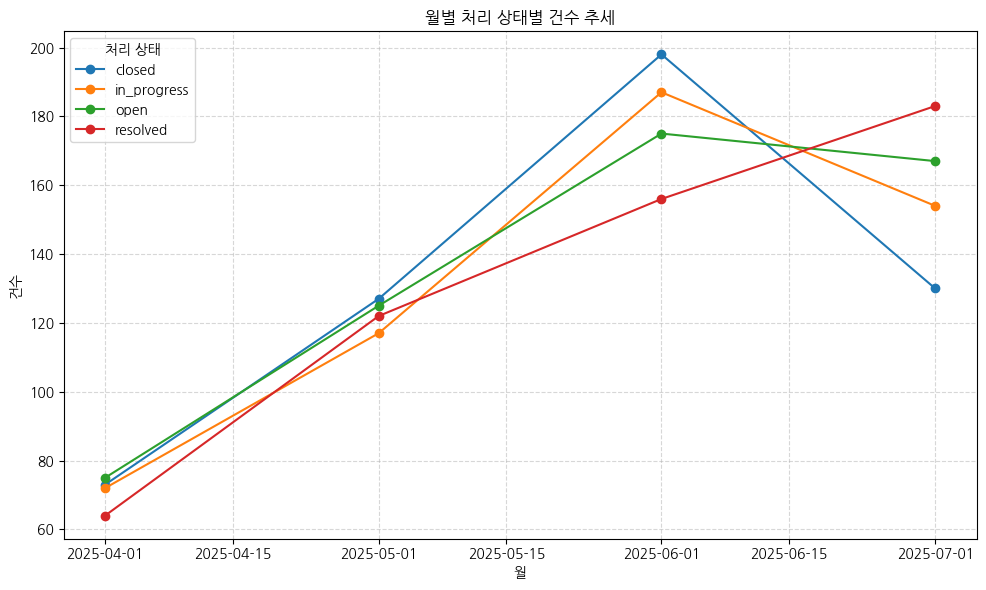

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1) ÎÇ†Ïßú Î≥ÄÌôò + Ïõî Ïª¨Îüº ÏÉùÏÑ±
chat_events['sent_at'] = pd.to_datetime(chat_events['sent_at'])
chat_events['month'] = chat_events['sent_at'].dt.to_period('M').dt.to_timestamp()

# 2) Ïõî √ó ÏÉÅÌÉúÎ≥Ñ Í±¥Ïàò ÏßëÍ≥Ñ
monthly_status = (
    chat_events
    .groupby(['month', 'status'])
    .size()
    .reset_index(name='count')
)

# 3) ÌîºÎ≤ó (Ìñâ=month, Ïó¥=status, Í∞í=count)
monthly_status_pivot = monthly_status.pivot(index='month', columns='status', values='count').fillna(0)

# 4) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
for col in monthly_status_pivot.columns:
    plt.plot(monthly_status_pivot.index, monthly_status_pivot[col], marker='o', label=col)

plt.title('ÏõîÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉúÎ≥Ñ Í±¥Ïàò Ï∂îÏÑ∏')
plt.xlabel('Ïõî')
plt.ylabel('Í±¥Ïàò')
plt.legend(title='Ï≤òÎ¶¨ ÏÉÅÌÉú')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


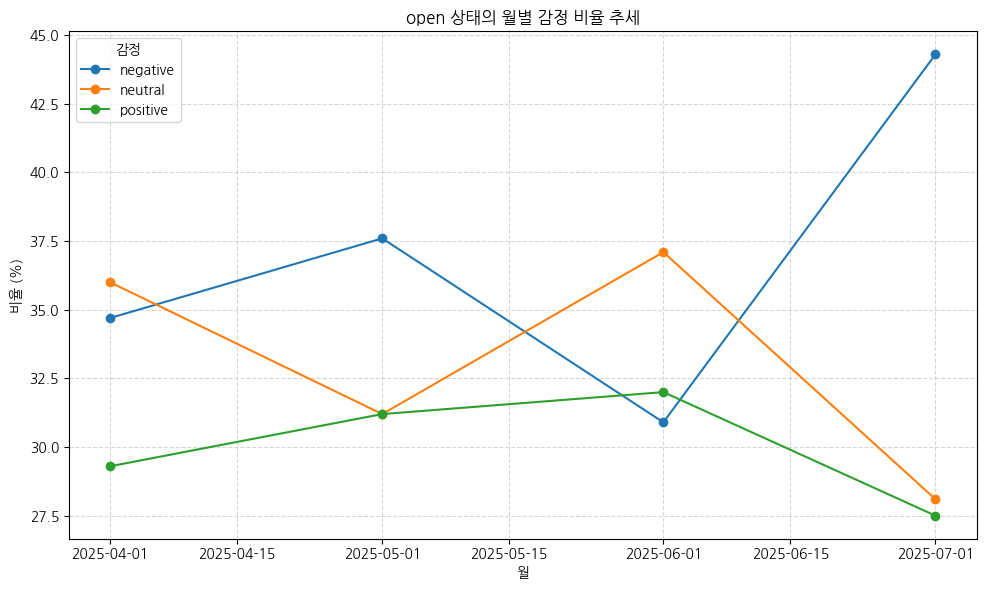

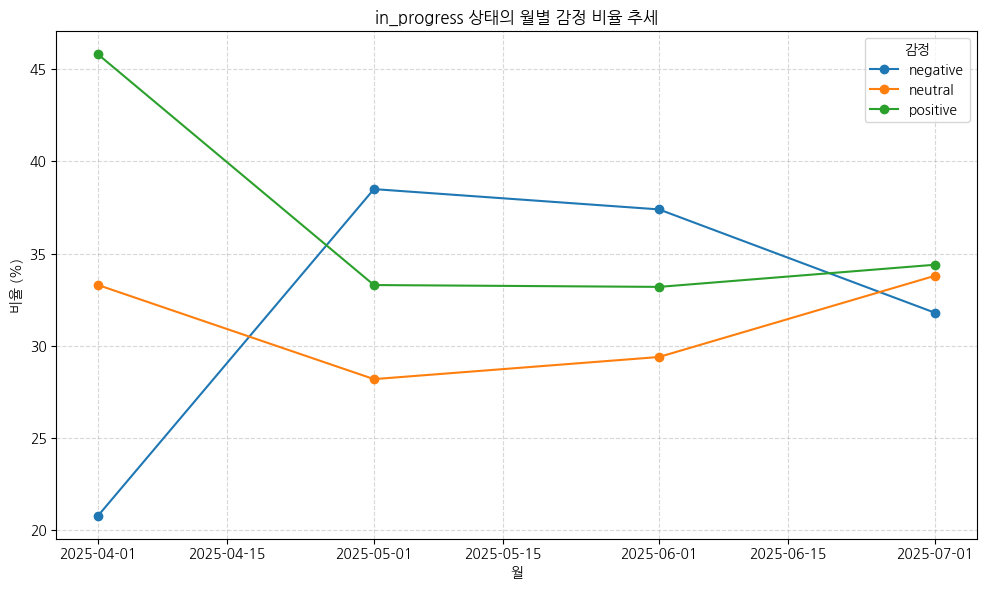

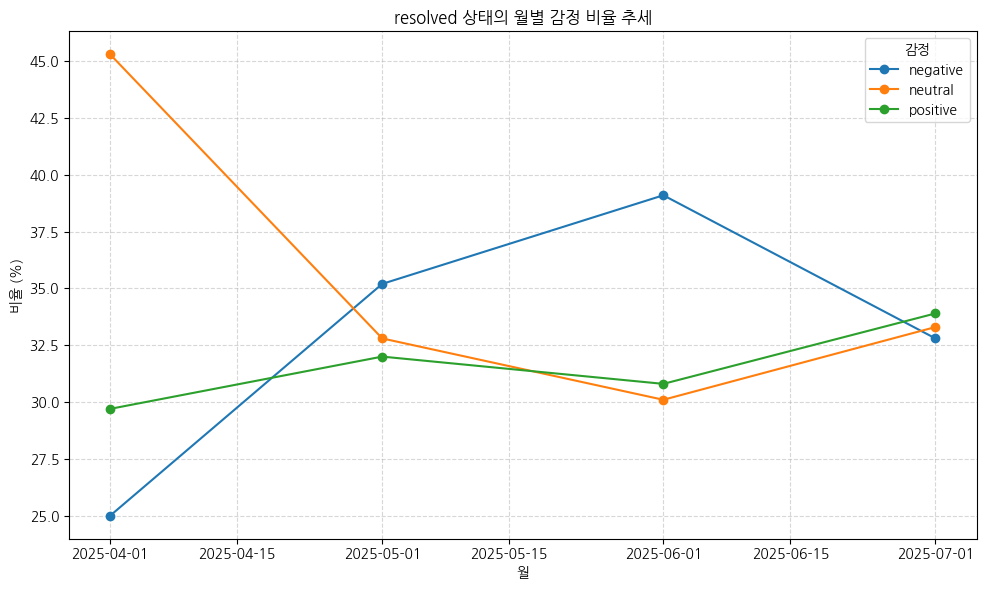

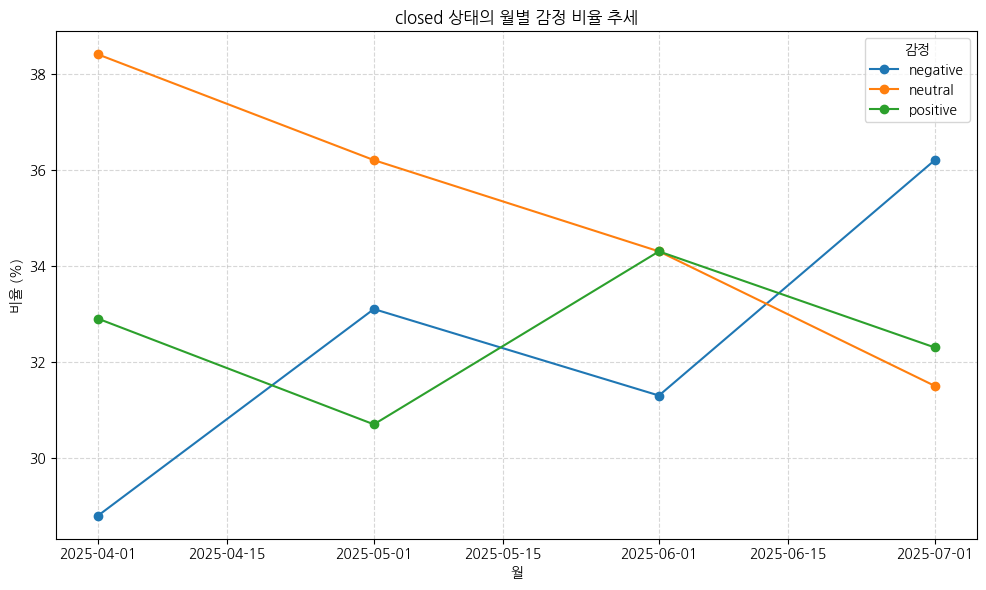

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1) Ï†ÑÏ≤òÎ¶¨: Ïõî Ïª¨Îüº
chat_events['sent_at'] = pd.to_datetime(chat_events['sent_at'])
chat_events['month'] = chat_events['sent_at'].dt.to_period('M').dt.to_timestamp()

# 2) Ïõî√óÏÉÅÌÉú√óÍ∞êÏ†ï ÏßëÍ≥Ñ + ÎπÑÏú®
monthly = (
    chat_events
    .groupby(['month','status','emotion'])
    .size()
    .reset_index(name='count')
)
monthly['ratio'] = (
    monthly['count'] /
    monthly.groupby(['month','status'])['count'].transform('sum') * 100
).round(1)

# 3) ÏÉÅÌÉúÎ≥ÑÎ°ú ‚ÄúÍ∑∏Î¶º ÌïòÎÇòÏî©‚Äù (ÏïÑÍπå Î≥¥Îçò Ïä§ÌÉÄÏùº)
status_order = ['open','in_progress','resolved','closed']
for st in [s for s in status_order if s in monthly['status'].unique()]:
    sub = monthly[monthly['status'] == st]
    pivot = sub.pivot(index='month', columns='emotion', values='ratio').fillna(0)

    plt.figure(figsize=(10,6))
    for col in pivot.columns:
        plt.plot(pivot.index, pivot[col], marker='o', label=col)

    plt.title(f"{st} ÏÉÅÌÉúÏùò ÏõîÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® Ï∂îÏÑ∏")
    plt.xlabel("Ïõî")
    plt.ylabel("ÎπÑÏú® (%)")
    plt.legend(title="Í∞êÏ†ï")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


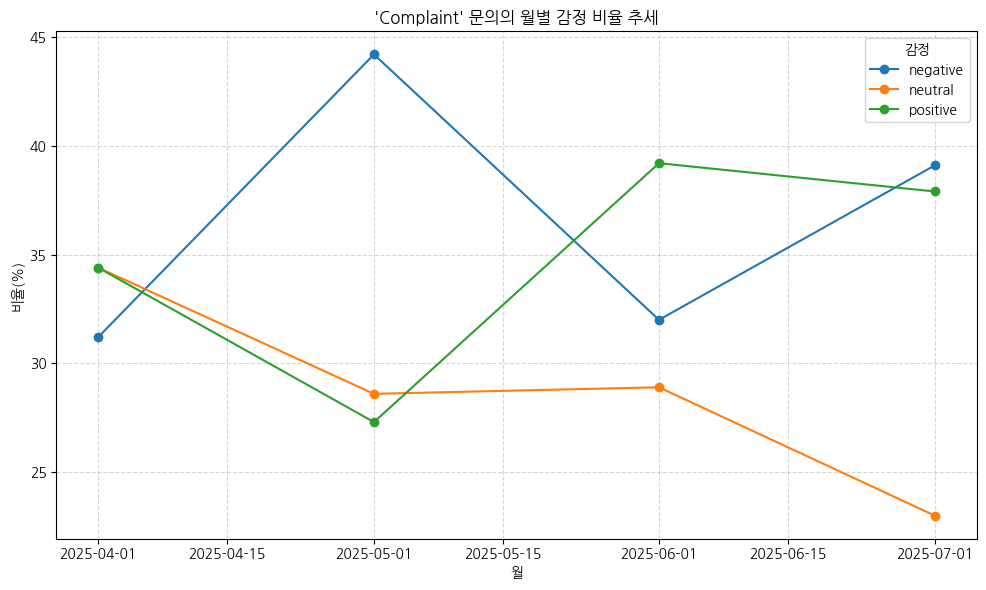

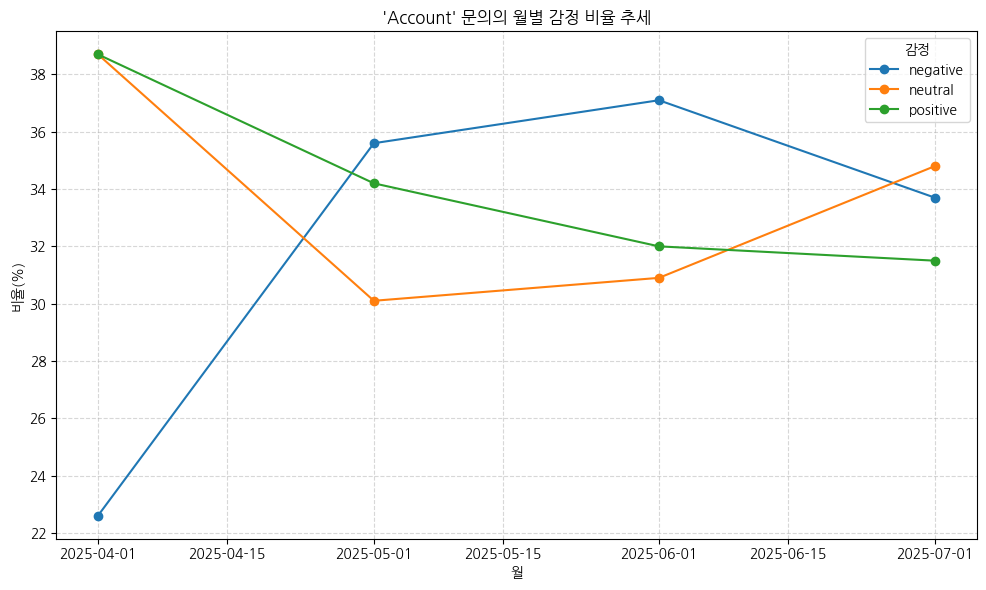

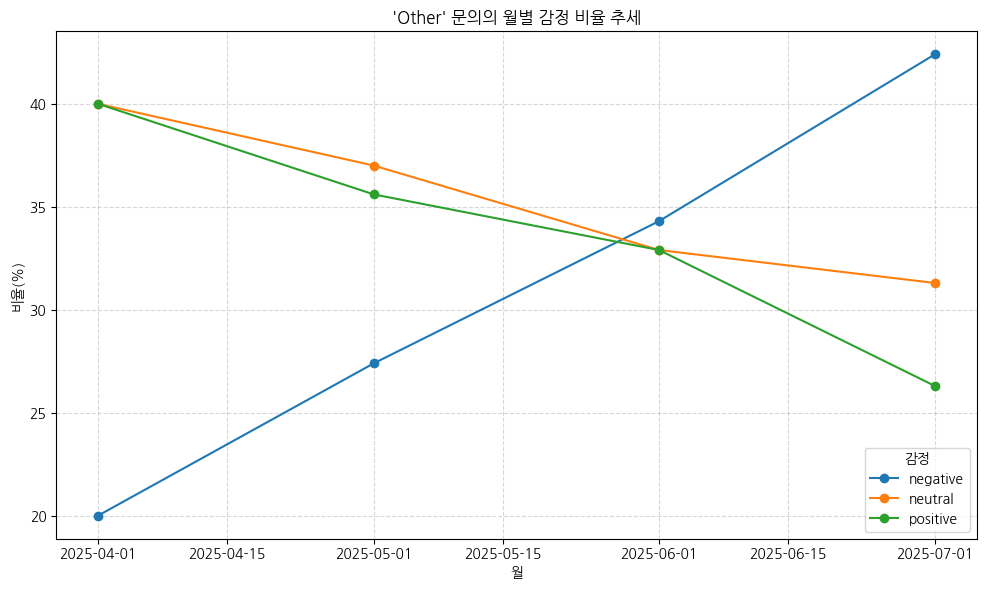

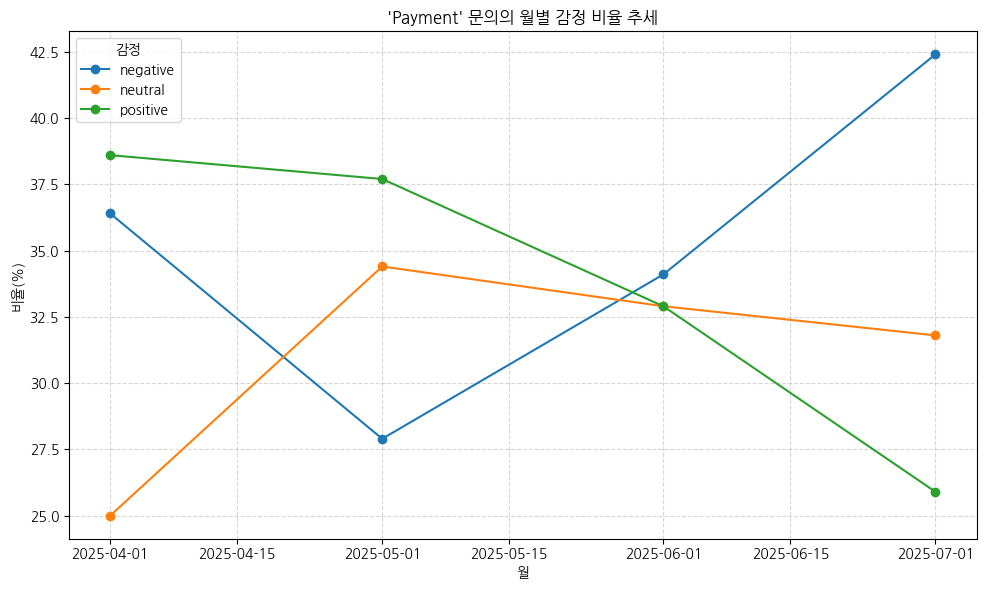

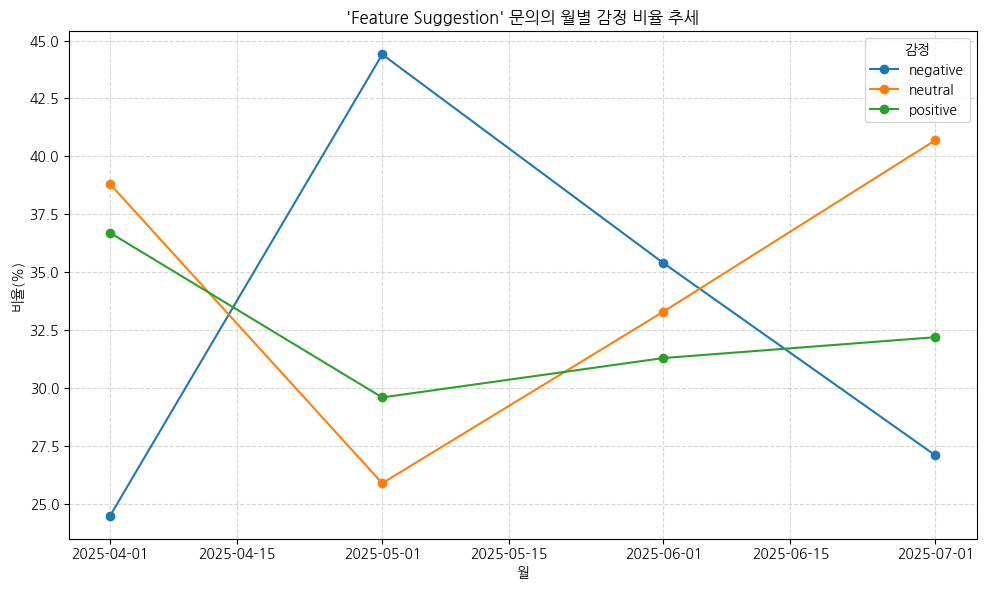

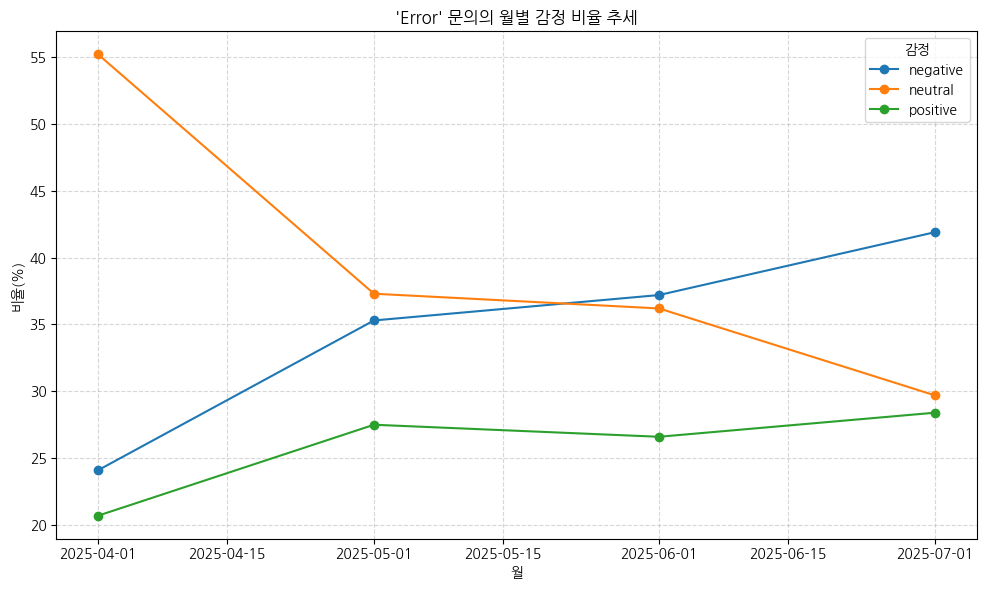

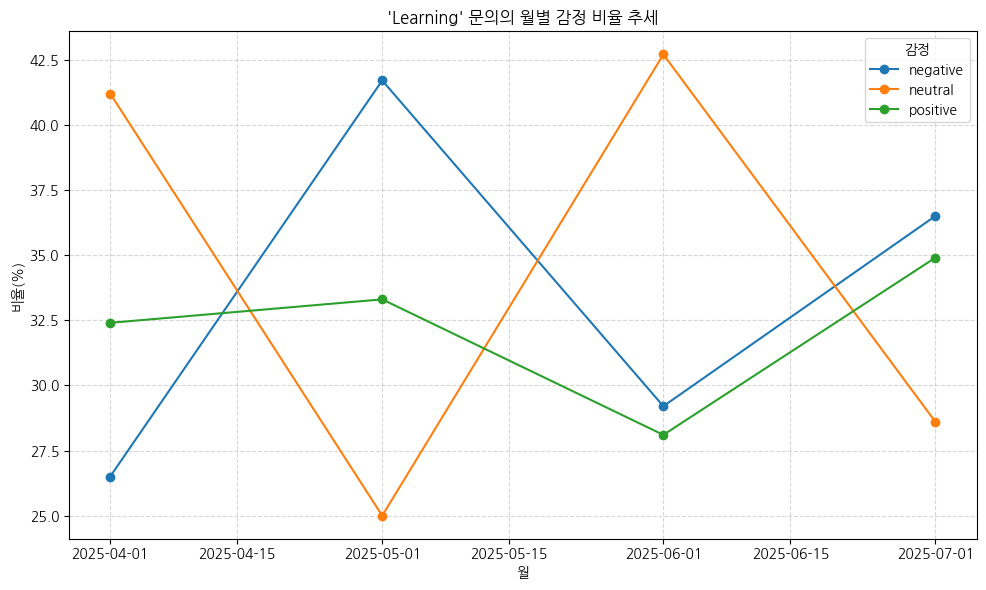

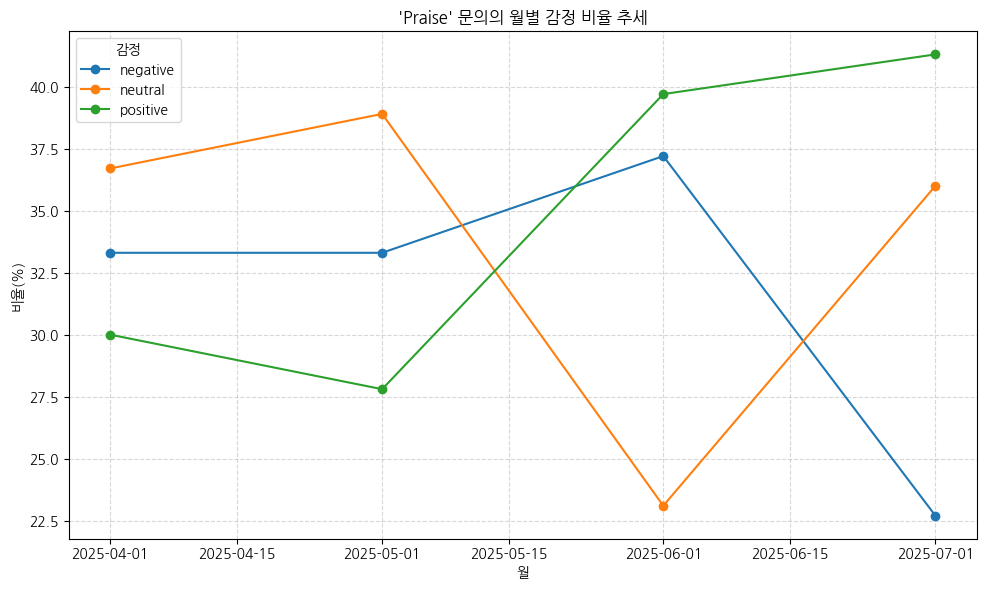

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib  # ÌïúÍ∏Ä Ìè∞Ìä∏

# 1) ÎÇ†Ïßú Ï†ÑÏ≤òÎ¶¨ + Ïõî Ïª¨Îüº
chat_events['sent_at'] = pd.to_datetime(chat_events['sent_at'])
chat_events['month'] = chat_events['sent_at'].dt.to_period('M').dt.to_timestamp()


# 3) ÏÉÅÏúÑ NÍ∞ú ÌÉúÍ∑∏ ÏÑ†ÌÉù (ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ Ï∞®Ìä∏Í∞Ä Í≥ºÎã§ ÏÉùÏÑ±ÎêòÎØÄÎ°ú Ï†úÌïú)
TOP_N = 8
top_tags = chat_events['tag'].value_counts().head(TOP_N).index

# 4) Ïõî √ó ÌÉúÍ∑∏ √ó Í∞êÏ†ï ÏßëÍ≥Ñ Î∞è 'ÌÉúÍ∑∏ ÎÇ¥ ÏõîÎ≥Ñ ÎπÑÏú®(%)' Í≥ÑÏÇ∞
monthly_tag_emotion = (
    chat_events
    .groupby(['month', 'tag', 'emotion'])
    .size()
    .reset_index(name='count')
)

# ÌÉúÍ∑∏Î≥Ñ(ÎèôÏùº Ïõî) Ï¥ùÌï©ÏúºÎ°ú ÎÇòÎà† ÎπÑÏú® Í≥ÑÏÇ∞
monthly_tag_emotion['ratio'] = (
    monthly_tag_emotion['count'] /
    monthly_tag_emotion.groupby(['month', 'tag'])['count'].transform('sum') * 100
).round(1)

# 5) ÌÉúÍ∑∏Î≥ÑÎ°ú ‚ÄúÏïÑÍπå Ïä§ÌÉÄÏùº‚ÄùÏùò ÏÑ† Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
for tg in top_tags:
    sub = monthly_tag_emotion[monthly_tag_emotion['tag'] == tg]
    pivot = sub.pivot(index='month', columns='emotion', values='ratio').fillna(0)

    plt.figure(figsize=(10,6))
    for col in pivot.columns:
        plt.plot(pivot.index, pivot[col], marker='o', label=col)

    plt.title(f"'{tg}' Î¨∏ÏùòÏùò ÏõîÎ≥Ñ Í∞êÏ†ï ÎπÑÏú® Ï∂îÏÑ∏")
    plt.xlabel("Ïõî")
    plt.ylabel("ÎπÑÏú®(%)")
    plt.legend(title="Í∞êÏ†ï")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


### ÏõîÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉúÎ≥Ñ Î∂ÄÏ†ïÍ±¥Ïàò

In [ ]:
import pandas as pd

# 1) ÎÇ†Ïßú Î≥ÄÌôò
chat_events['sent_at'] = pd.to_datetime(chat_events['sent_at'])
chat_events['month'] = chat_events['sent_at'].dt.to_period('M').dt.to_timestamp()

# 2) 6~7Ïõî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
recent_df = chat_events[
    (chat_events['month'] >= '2025-06-01') &
    (chat_events['month'] <= '2025-07-31')
]

# 3) Î∂ÄÏ†ï Í∞êÏ†ïÎßå ÌïÑÌÑ∞ÎßÅ
negative_df = recent_df[recent_df['emotion'] == 'negative']

# 4) Ï≤òÎ¶¨ ÏÉÅÌÉúÎ≥Ñ Î∂ÄÏ†ï Í±¥Ïàò
status_counts = (
    negative_df.groupby('status')
    .size()
    .reset_index(name='negative_count')
    .sort_values('negative_count', ascending=False)
)

# 5) Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Î∂ÄÏ†ï Í±¥Ïàò
tag_counts = (
    negative_df.groupby('tag')
    .size()
    .reset_index(name='negative_count')
    .sort_values('negative_count', ascending=False)
)

# 6) Í≤∞Í≥º Ï∂úÎ†•
print("üìå 6~7Ïõî Ï≤òÎ¶¨ ÏÉÅÌÉúÎ≥Ñ Î∂ÄÏ†ï Í±¥Ïàò")
print(status_counts)
print("\nüìå 6~7Ïõî Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Î∂ÄÏ†ï Í±¥Ïàò")
print(tag_counts)


üìå 6~7Ïõî Ï≤òÎ¶¨ ÏÉÅÌÉúÎ≥Ñ Î∂ÄÏ†ï Í±¥Ïàò
        status  negative_count
2         open             128
3     resolved             121
1  in_progress             119
0       closed             109

üìå 6~7Ïõî Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Î∂ÄÏ†ï Í±¥Ïàò
                  tag  negative_count
0             Account              67
2               Error              66
5               Other              66
1           Complaint              65
6             Payment              65
3  Feature Suggestion              51
4            Learning              51
7              Praise              46


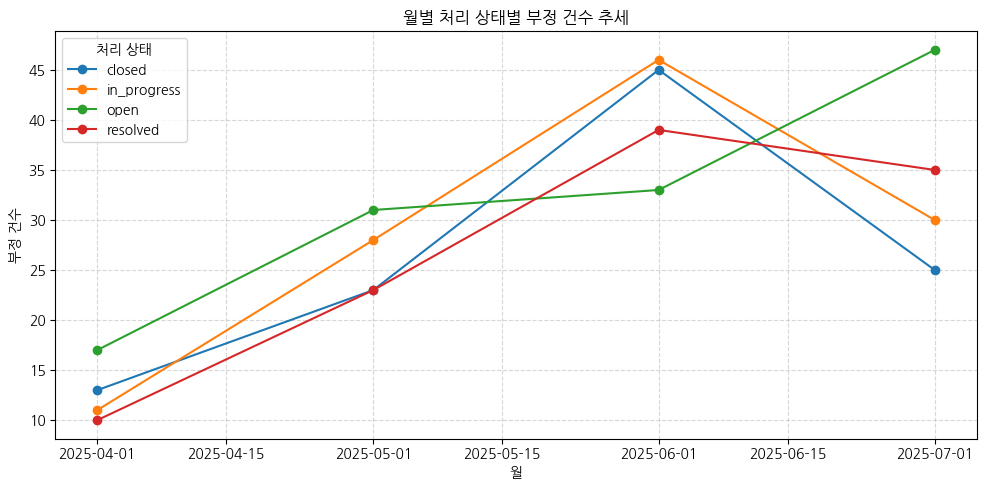

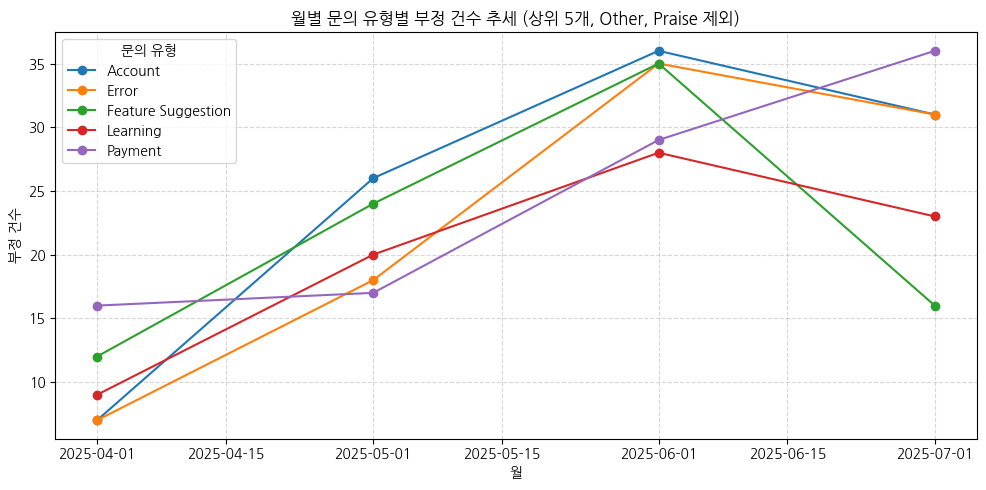

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1) ÎÇ†Ïßú Î≥ÄÌôò + Ïõî Ïª¨Îüº
chat_events['sent_at'] = pd.to_datetime(chat_events['sent_at'])
chat_events['month'] = chat_events['sent_at'].dt.to_period('M').dt.to_timestamp()

# 2) Î∂ÄÏ†ï Í∞êÏ†ï ÌïÑÌÑ∞ + 'Other', 'Praise' Ï†úÏô∏
negative_df = chat_events[
    (chat_events['emotion'] == 'negative') &
    (~chat_events['tag'].isin(['Other', 'Praise','Complaint']))
]

# 3) ÏõîÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉúÎ≥Ñ Î∂ÄÏ†ï Í±¥Ïàò
status_monthly = (
    negative_df.groupby(['month', 'status'])
    .size()
    .reset_index(name='negative_count')
    .pivot(index='month', columns='status', values='negative_count')
    .fillna(0)
)

# 4) ÏõîÎ≥Ñ Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Î∂ÄÏ†ï Í±¥Ïàò (ÏÉÅÏúÑ 5Í∞úÎßå)
top_tags = (
    negative_df['tag']
    .value_counts()
    .head(5)
    .index
)

tag_monthly = (
    negative_df[negative_df['tag'].isin(top_tags)]
    .groupby(['month', 'tag'])
    .size()
    .reset_index(name='negative_count')
    .pivot(index='month', columns='tag', values='negative_count')
    .fillna(0)
)

# 5) ÏãúÍ∞ÅÌôî - Ï≤òÎ¶¨ ÏÉÅÌÉúÎ≥Ñ
plt.figure(figsize=(10,5))
for col in status_monthly.columns:
    plt.plot(status_monthly.index, status_monthly[col], marker='o', label=col)
plt.title('ÏõîÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉúÎ≥Ñ Î∂ÄÏ†ï Í±¥Ïàò Ï∂îÏÑ∏')
plt.xlabel('Ïõî')
plt.ylabel('Î∂ÄÏ†ï Í±¥Ïàò')
plt.legend(title='Ï≤òÎ¶¨ ÏÉÅÌÉú')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 6) ÏãúÍ∞ÅÌôî - Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ (ÏÉÅÏúÑ 5Í∞ú)
plt.figure(figsize=(10,5))
for col in tag_monthly.columns:
    plt.plot(tag_monthly.index, tag_monthly[col], marker='o', label=col)
plt.title('ÏõîÎ≥Ñ Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Î∂ÄÏ†ï Í±¥Ïàò Ï∂îÏÑ∏ (ÏÉÅÏúÑ 5Í∞ú, Other, Praise Ï†úÏô∏)')
plt.xlabel('Ïõî')
plt.ylabel('Î∂ÄÏ†ï Í±¥Ïàò')
plt.legend(title='Î¨∏Ïùò Ïú†Ìòï')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



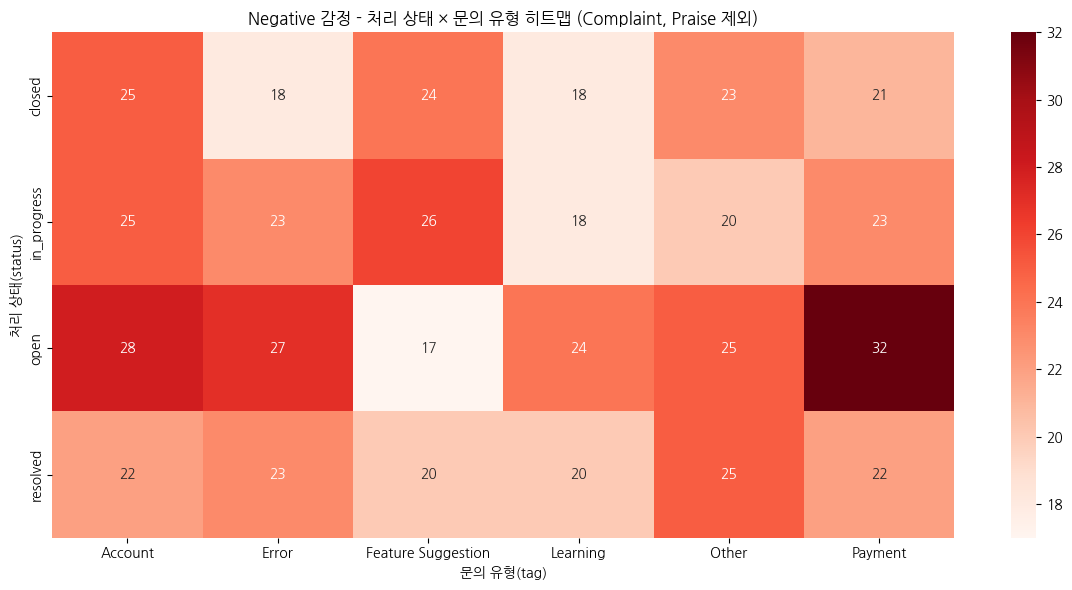

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1) Î∂ÄÏ†ï Í∞êÏ†ï Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ + ÌäπÏ†ï ÌÉúÍ∑∏ Ï†úÏô∏
negative_df = chat_events[
    (chat_events['emotion'] == 'negative') &
    (~chat_events['tag'].isin(['Complaint', 'Praise']))
].copy()

# 2) tag √ó status Î∂ÄÏ†ï Í±¥Ïàò ÌîºÎ≤ó
neg_pivot = (
    negative_df.groupby(['status', 'tag'])
    .size()
    .reset_index(name='negative_count')
    .pivot(index='status', columns='tag', values='negative_count')
    .fillna(0)
)

# 3) ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
sns.heatmap(neg_pivot, annot=True, fmt=".0f", cmap="Reds")
plt.title("Negative Í∞êÏ†ï - Ï≤òÎ¶¨ ÏÉÅÌÉú √ó Î¨∏Ïùò Ïú†Ìòï ÌûàÌä∏Îßµ (Complaint, Praise Ï†úÏô∏)")
plt.xlabel("Î¨∏Ïùò Ïú†Ìòï(tag)")
plt.ylabel("Ï≤òÎ¶¨ ÏÉÅÌÉú(status)")
plt.tight_layout()
plt.show()


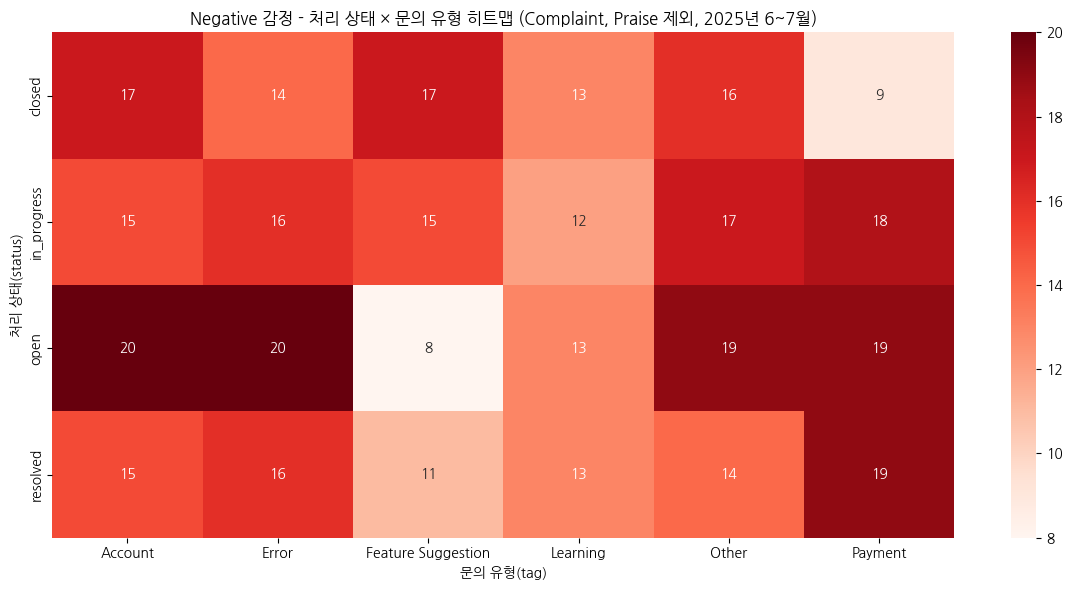

In [ ]:
#ÎÇ†Ïßú ÌïÑÌÑ∞ÎßÅÎêòÎäî ÌûàÌä∏Îßµ
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1) ÎÇ†Ïßú Î≥ÄÌôò
chat_events['sent_at'] = pd.to_datetime(chat_events['sent_at'])
chat_events['month'] = chat_events['sent_at'].dt.to_period('M').dt.to_timestamp()

# 2) Î∂ÄÏ†ï Í∞êÏ†ï Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ + ÌäπÏ†ï ÌÉúÍ∑∏ Ï†úÏô∏ + 6~7Ïõî ÌïÑÌÑ∞ÎßÅ
negative_df = chat_events[
    (chat_events['emotion'] == 'negative') &
    (~chat_events['tag'].isin(['Complaint', 'Praise'])) &
    (chat_events['month'] >= '2025-06-01') &
    (chat_events['month'] <= '2025-07-31')
].copy()

# 3) tag √ó status Î∂ÄÏ†ï Í±¥Ïàò ÌîºÎ≤ó
neg_pivot = (
    negative_df.groupby(['status', 'tag'])
    .size()
    .reset_index(name='negative_count')
    .pivot(index='status', columns='tag', values='negative_count')
    .fillna(0)
)

# 4) ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
sns.heatmap(neg_pivot, annot=True, fmt=".0f", cmap="Reds")
plt.title("Negative Í∞êÏ†ï - Ï≤òÎ¶¨ ÏÉÅÌÉú √ó Î¨∏Ïùò Ïú†Ìòï ÌûàÌä∏Îßµ (Complaint, Praise Ï†úÏô∏, 2025ÎÖÑ 6~7Ïõî)")
plt.xlabel("Î¨∏Ïùò Ïú†Ìòï(tag)")
plt.ylabel("Ï≤òÎ¶¨ ÏÉÅÌÉú(status)")
plt.tight_layout()
plt.show()


## Ïù∏ÏÇ¨Ïù¥Ìä∏
Î™©Ï†Å  
* Îçî ÎÇòÏùÄ ÏÑúÎπÑÏä§ Ï†úÍ≥µÍ≥º Í≥†Í∞ù ÎßåÏ°±ÎèÑ Í∞úÏÑ†ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

Î∞©Î≤ï 1: Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉú x Í∞êÏ†ï Î∂ÑÏÑù  
* Í≤∞Í≥º: Î¨∏Ïùò Ïú†ÌòïÎ≥Ñ¬∑Í∞êÏ†ïÎ≥Ñ ÎπÑÏú®Ïù¥ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Í∑†Îì±ÌïòÍ≤å Î∂ÑÌè¨
* Ìï¥ÏÑù: ÌäπÏ†ï Ïú†Ìòï¬∑Í∞êÏ†ïÏóêÏÑú ÎëêÎìúÎü¨ÏßÑ Ìé∏Ï∞®Í∞Ä ÏóÜÏñ¥, ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞Î°úÎäî Í∞úÏÑ† Ìè¨Ïù∏Ìä∏ ÏãùÎ≥Ñ Ïñ¥Î†§ÏõÄ

  
Î∞©Î≤ï 2: Í∏∞Í∞ÑÎ≥Ñ(ÏõîÎ≥Ñ) Í∞êÏ†ï ÎπÑÏú® Î∂ÑÏÑù
* Í≤∞Í≥º: Î∂ÄÏ†ï Í∞êÏ†ï(negative) ÎπÑÏú®Ïù¥ Ï†êÏßÑÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌïòÎäî Ï∂îÏÑ∏ ÌôïÏù∏
* Í∞ÄÏ†ï: Ïã†Í∑ú Í≥†Í∞ùÏù¥ ÎäòÏñ¥ÎÇòÎ©¥ÏÑú Î∂ÄÏ†ï Í∞êÏ†ïÏùÑ Í∞ÄÏßÑ ÏÇ¨ÎûåÏùò Ï†àÎåÄ Í±¥ÏàòÎèÑ Ï¶ùÍ∞ÄÌñàÏùÑ Í≤É
* Ï¶ùÎ™Ö:
  * ÏõîÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê ÏàòÏôÄ negative Í±¥ÏàòÎ•º ÎπÑÍµêÌïú Í≤∞Í≥º, Îëê ÏßÄÌëúÍ∞Ä Ïú†ÏÇ¨Ìïú Ï¶ùÍ∞Ä Ìå®ÌÑ¥ÏùÑ Î≥¥ÏûÑ
  * Complaint Í±¥Ïàò Ïó≠Ïãú Í∞ôÏùÄ ÌùêÎ¶Ñ ‚Üí Ïã†Í∑ú Í≥†Í∞ù Ï¶ùÍ∞ÄÏóê Îî∞Î•∏ ÏûêÏó∞Ïä§Îü¨Ïö¥ Î∂ÄÏ†ï/Î∂àÎßå Í±¥Ïàò Ï¶ùÍ∞ÄÎ°ú Ìï¥ÏÑù Í∞ÄÎä•  
* Î≥¥ÏôÑ ÌïÑÏöî: ÎπÑÏú® Ï¶ùÍ∞ÄÏùò ÏõêÏù∏ÏùÄ Ï∂îÍ∞Ä Î∂ÑÏÑù ÌïÑÏöî  


Î∞©Î≤ï 3 : ÏõîÎ≥Ñ Ï≤òÎ¶¨ ÏÉÅÌÉúÎ≥Ñ Î∂ÄÏ†ï Í±¥Ïàò ÎπÑÍµê
* ComplaintÏôÄ PraiseÎ•º Ï†úÏô∏ÌïòÍ≥† (ÌïÑÏöî ÏóÜÎäî Ìï≠Î™©) Nevative Í∞êÏ†ïÏóê ÎåÄÌïú Ï≤òÎ¶¨ÏÉÅÌÉú(status)ÏôÄ Î¨∏Ïùò Ïú†Ìòï(tag)Ïùò Í±¥ÏàòÎ•º ÌûàÌä∏ÎßµÏúºÎ°ú ÏûëÏÑ±
* Í≤∞Í≥º : Î¨∏Ïùò Ïú†Ìòï=Payment, Ï≤òÎ¶¨ ÏÉÅÌÉú = openÍ∞Ä Í∞ÄÏû• ÎßéÏù¥ Î∂ÄÏ†ïÏ†ÅÏù¥ÎùºÎäî Ï†ê ÏãùÎ≥Ñ
* Ìï¥ÏÑù : ÎπÑÏú® Ï¶ùÍ∞ÄÏùò ÏõêÏù∏ÏùÄ Î¨∏Ïùò Ïú†Ìòï=Payment, Ï≤òÎ¶¨ ÏÉÅÌÉú = openÏùò Ï¶ùÍ∞Ä ÎïåÎ¨∏




# abtest
Í∞ÄÏÑ§ : Í∞ÄÍ≤©ÏùÑ ÎÇÆÏ∂îÎ©¥ Ï†ÑÌôòÏú®Ïù¥ Ïò¨ÎùºÍ∞à Í≤ÉÏù¥Îã§

In [ ]:
# === pricing_ab: trial_to_paid / signup Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ ===
import pandas as pd

# ----- ÏÑ§Ï†ï -----
OBS_WINDOW_DAYS = None   # Ïòà: 30 ÏúºÎ°ú ÏÑ§Ï†ïÌïòÎ©¥ Í∞ÄÏûÖ ÌõÑ 30Ïùº ÎÇ¥ Ï†ÑÌôòÎßå Ïù∏Ï†ï
USE_ACTIVE_GUARD = False # TrueÎ°ú ÌïòÎ©¥ plan_status=='active'Ïù∏ Í≤ΩÏö∞Îßå Ï†ÑÌôòÏúºÎ°ú Ïù∏Ï†ï

# 1) Ïã§Ìóò ÏΩîÌò∏Ìä∏ (A/B)
ab = ab_assignment.query("experiment_name == 'pricing_ab'").copy()
keep_cols = ['user_id', 'variant'] + (['assigned_at'] if 'assigned_at' in ab.columns else [])
ab = ab[keep_cols]
if 'assigned_at' in ab.columns:
    ab['assigned_at'] = pd.to_datetime(ab['assigned_at'], errors='coerce')
    ab = ab.sort_values('assigned_at').drop_duplicates('user_id', keep='first')
else:
    ab = ab.drop_duplicates('user_id')

# 2) Í∞ÄÏûÖ ÏãúÏ†ê (signup_completed)
elog = event_logs.loc[event_logs['event_name'] == 'signup_completed', ['user_id','event_timestamp']].copy()
elog['event_timestamp'] = pd.to_datetime(elog['event_timestamp'], errors='coerce')
signup = (elog.sort_values('event_timestamp')
              .drop_duplicates('user_id', keep='first')
              .rename(columns={'event_timestamp':'signup_time'}))

# Ïã§Ìóò √ó Í∞ÄÏûÖ Ï°∞Ïù∏ (Í∞ÄÏûÖÏù¥ ÏûàÎäî Ïú†Ï†ÄÎßå ÎåÄÏÉÅ)
ab_signup = ab.merge(signup, on='user_id', how='inner')
if 'assigned_at' in ab_signup.columns:
    ab_signup = ab_signup.loc[
        ab_signup['assigned_at'].isna() | (ab_signup['signup_time'] >= ab_signup['assigned_at'])
    ].copy()

# 3) Ï†ÑÌôò Ïù¥Î≤§Ìä∏: trial_to_paid (ÏµúÏ¥à 1Í±¥)
ph = plan_history.loc[plan_history['reason'] == 'trial_to_paid', ['user_id','plan_status','change_time']].copy()
ph['change_time'] = pd.to_datetime(ph['change_time'], errors='coerce')
if USE_ACTIVE_GUARD:
    ph = ph.loc[ph['plan_status'] == 'active']
conv = (ph.sort_values('change_time')
          .drop_duplicates('user_id', keep='first')
          .rename(columns={'change_time':'conv_time'}))

# 4) Í∞ÄÏûÖ Ïù¥ÌõÑ Ï†ÑÌôòÎßå Ïù∏Ï†ï (+Í¥ÄÏ∞∞ Ï∞Ω ÏòµÏÖò)
df = ab_signup.merge(conv[['user_id','conv_time']], on='user_id', how='left')
df['converted'] = df['conv_time'].ge(df['signup_time'])
df.loc[df['conv_time'].isna(), 'converted'] = False
if OBS_WINDOW_DAYS:
    window_end = df['signup_time'] + pd.to_timedelta(OBS_WINDOW_DAYS, unit='D')
    df['converted'] = df['converted'] & (df['conv_time'] <= window_end)

# 5) Ï†ÑÌôòÏú® ÏßëÍ≥Ñ (trial_to_paid / signup)
summary = (df.groupby('variant')
             .agg(N_signup=('user_id','nunique'),
                  N_trial_to_paid=('converted','sum'))
             .reset_index())
summary['CR_trial_to_paid'] = summary['N_trial_to_paid'] / summary['N_signup']

# Î≥¥Í∏∞ Ï¢ãÍ≤å A/B Ï†ïÎ†¨
if set(['A','B']).issubset(summary['variant'].unique()):
    summary = summary.set_index('variant').loc[['A','B']].reset_index()

print(summary)


  variant  N_signup  N_trial_to_paid  CR_trial_to_paid
0       A       429              157          0.365967
1       B       450              160          0.355556


In [ ]:
#Í∞ÄÏÑ§2 : onboarding_ctaÎ•º Î∞îÍæ∏Î©¥ Ï†ÑÌôòÏú®Ïù¥ Ïò¨ÎùºÍ∞à Í≤ÉÏù¥Îã§
#Í∞ÄÏÑ§3 : checkout_designÎ•º Î∞îÍæ∏Î©¥ Ï†ÑÌôòÏú®Ïù¥ Ïò¨ÎùºÍ∞à Í≤ÉÏù¥Îã§

import pandas as pd
import numpy as np

# ===== Í≥µÌÜµ Ïú†Ìã∏ =====
def _to_dt(s):
    return pd.to_datetime(s, errors='coerce')

def compute_cr_trial_to_paid_signup(ab_assignment, event_logs, plan_history, experiment_name,
                                    obs_window_days=None, use_active_guard=False):
    # Ïã§Ìóò ÏΩîÌò∏Ìä∏
    cols = ['user_id','variant'] + (['assigned_at'] if 'assigned_at' in ab_assignment.columns else [])
    ab = (ab_assignment.query("experiment_name == @experiment_name")[cols]
          .drop_duplicates('user_id'))
    if 'assigned_at' in ab.columns:
        ab['assigned_at'] = _to_dt(ab['assigned_at'])

    # Í∞ÄÏûÖ ÏãúÏ†ê
    sign = (event_logs.loc[event_logs['event_name'] == 'signup_completed', ['user_id','event_timestamp']]
                     .rename(columns={'event_timestamp':'signup_time'}))
    sign['signup_time'] = _to_dt(sign['signup_time'])
    sign = sign.sort_values('signup_time').drop_duplicates('user_id', keep='first')

    ab_sign = ab.merge(sign, on='user_id', how='inner')
    if 'assigned_at' in ab_sign.columns:
        ab_sign = ab_sign[(ab_sign['assigned_at'].isna()) | (ab_sign['signup_time'] >= ab_sign['assigned_at'])].copy()

    # Ï†ÑÌôò Ïù¥Î≤§Ìä∏: trial_to_paid (ÏµúÏ¥à 1Í±¥)
    ph = plan_history.loc[plan_history['reason'] == 'trial_to_paid', ['user_id','plan_status','change_time']].copy()
    ph['change_time'] = _to_dt(ph['change_time'])
    if use_active_guard:
        ph = ph[ph['plan_status'] == 'active']
    conv = ph.sort_values('change_time').drop_duplicates('user_id', keep='first').rename(columns={'change_time':'conv_time'})

    # Í∞ÄÏûÖ Ïù¥ÌõÑ Ï†ÑÌôòÎßå Ïù∏Ï†ï (+ÏòµÏÖò: Í¥ÄÏ∞∞ÏúàÎèÑÏö∞)
    df = ab_sign.merge(conv[['user_id','conv_time']], on='user_id', how='left')
    df['converted'] = df['conv_time'].ge(df['signup_time'])
    df.loc[df['conv_time'].isna(), 'converted'] = False
    if obs_window_days:
        win_end = df['signup_time'] + pd.to_timedelta(obs_window_days, unit='D')
        df['converted'] = df['converted'] & (df['conv_time'] <= win_end)

    summary = (df.groupby('variant')
                 .agg(N_signup=('user_id','nunique'),
                      N_trial_to_paid=('converted','sum'))
                 .reset_index())
    summary['CR_trial_to_paid'] = summary['N_trial_to_paid'] / summary['N_signup']

    # A/B Ï†ïÎ†¨(ÏûàÏùÑ Í≤ΩÏö∞)
    if set(['A','B']).issubset(summary['variant'].unique()):
        summary = summary.set_index('variant').loc[['A','B']].reset_index()

    return summary

def ztest_from_summary(summary, variant_order=('A','B')):
    t = summary.set_index('variant')
    # ÏïàÏ†Ñ Ï≤òÎ¶¨: ÏóÜÎäî variantÍ∞Ä ÏûàÏúºÎ©¥ ÏûêÎèôÏúºÎ°ú ÏÇ¨Ï†ÑÏàú ÏÉÅÏúÑ 2Í∞ú ÏÑ†ÌÉù
    for v in variant_order:
        if v not in t.index:
            variant_order = tuple(t.index[:2])
            break
    c = t.loc[list(variant_order), 'N_trial_to_paid'].astype(int).values
    n = t.loc[list(variant_order), 'N_signup'].astype(int).values
    # statsmodels ÏûàÏúºÎ©¥ ÏÇ¨Ïö©, ÏóÜÏúºÎ©¥ ÏàòÏãù
    try:
        from statsmodels.stats.proportion import proportions_ztest
        stat, p = proportions_ztest(c, n, alternative='two-sided')
    except Exception:
        p_pool = (c.sum()) / (n.sum())
        se = np.sqrt(p_pool*(1-p_pool)*(1/n[0] + 1/n[1]))
        stat = ((c[1]/n[1]) - (c[0]/n[0])) / se if se > 0 else np.nan
        from math import erf, sqrt
        cdf = lambda x: 0.5*(1 + erf(x/np.sqrt(2)))
        p = 2 * (1 - cdf(abs(stat))) if np.isfinite(stat) else np.nan

    return {
        'order': variant_order,
        'A_users': n[0], 'A_conv': c[0], 'A_cr': c[0]/n[0] if n[0] else np.nan,
        'B_users': n[1], 'B_conv': c[1], 'B_cr': c[1]/n[1] if n[1] else np.nan,
        'z': stat, 'p': p,
        'abs_lift': (c[1]/n[1]) - (c[0]/n[0]),
        'rel_lift': ((c[1]/n[1]) / (c[0]/n[0]) - 1) if c[0] > 0 else np.nan
    }

# ===== Ïã§Ìñâ: Îëê Ïã§Ìóò Í∞ÅÍ∞Å Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ + Í≤ÄÏ†ï =====
for exp in ['onboarding_cta', 'checkout_design']:
    print(f"\n==== {exp} :: trial_to_paid / signup ====")
    summ = compute_cr_trial_to_paid_signup(ab_assignment, event_logs, plan_history,
                                           experiment_name=exp,
                                           obs_window_days=None,      # ÌïÑÏöîÏãú 30 Îì±ÏúºÎ°ú ÏÑ§Ï†ï
                                           use_active_guard=False)    # ÌëúÎ≥∏ ÏûëÏùÄ Í≤ΩÏö∞ False Í∂åÏû•
    print(summ)

    test = ztest_from_summary(summ, variant_order=('A','B'))
    print(f"Z = {test['z']:.4f}, p = {test['p']:.6f}")
    print(f"{test['order'][0]}: {test['A_conv']}/{test['A_users']} (CR={test['A_cr']:.4%})  |  "
          f"{test['order'][1]}: {test['B_conv']}/{test['B_users']} (CR={test['B_cr']:.4%})")
    print(f"Lift (B - A): abs={test['abs_lift']:.4%}, rel={test['rel_lift']:.2%}")



==== onboarding_cta :: trial_to_paid / signup ====
    variant  N_signup  N_trial_to_paid  CR_trial_to_paid
0  original       200               65          0.325000
1      test       207               70          0.338164
Z = -0.2820, p = 0.777947
original: 65/200 (CR=32.5000%)  |  test: 70/207 (CR=33.8164%)
Lift (B - A): abs=1.3164%, rel=4.05%

==== checkout_design :: trial_to_paid / signup ====
    variant  N_signup  N_trial_to_paid  CR_trial_to_paid
0   control        60                5          0.083333
1  redesign        71                6          0.084507
Z = -0.0241, p = 0.980746
control: 5/60 (CR=8.3333%)  |  redesign: 6/71 (CR=8.4507%)
Lift (B - A): abs=0.1174%, rel=1.41%


## Ïù∏ÏÇ¨Ïù¥Ìä∏
Ï†ÑÌôòÏú®Ïùò ÏÉÅÏäπÏùÑ Î™©Ï†ÅÏúºÎ°ú ÌïòÎäî 3Í∞ÄÏßÄÏùò abtestÎäî
Ï†ÑÌôòÏú®Ïù¥ pricing_ab , onboarding_cta , checkout_designÏóê ÏòÅÌñ•ÏùÑ Î∞õÎäîÎã§Í≥† Ìï† Ï∂©Î∂ÑÌïú Ï¶ùÍ±∞Í∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Í∏∞Í∞Å

# ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù
Î¨∏Ï†úÏ†ê :Ïú†Î£å Ï†ÑÌôò ÌõÑ Ïú†ÏßÄÎäî Ïûò ÎêòÏßÄÎßå, Ï≤¥Ìóò(trial) ÌõÑ Ïú†Î£å Ï†ÑÌôòÏùÑ ÌïòÏßÄ ÏïäÏùÄ Í≥†Í∞ù ÎπÑÏú®Ïù¥ ÎÜíÎã§.   
Î™©Ìëú : ÏΩîÌò∏Ìä∏ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ > ÏõîÎ≥Ñ/ Ï£ºÍ∞ÑÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≥† Ïù¥ÏÉÅÏ†êÏù¥ ÏûàÎäîÏßÄ Î∞úÍ≤¨Ìï¥Î≥¥Ïûê  
Ï†ÑÌôòÏú®Ïùò Ï†ïÏùò : plan_history[reason] > trial_to_paid / sign_up Ïùò ÎπÑÏú®Î°ú Í≥ÑÏÇ∞

In [ ]:
import pandas as pd
import numpy as np
import re

# -----------------------
# ÌååÎùºÎØ∏ÌÑ∞
# -----------------------
TRIAL_DAYS = 7
GRACE_DAYS = 3
MAX_LAG_DAYS = 60   # signup ÌõÑ trial ÏãúÏûëÏùÑ Í∏∞Îã§Î†§ Ï§Ñ ÏµúÎåÄ Í∏∞Í∞Ñ(ÏßÄÌëú ÏïàÏ†ïÏö©)
WEEK_START = 'MON'

# -----------------------
# Ïú†Ìã∏: ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ Ïª¨Îüº ÏûêÎèô ÌÉêÏÉâ + ÌååÏã±
# -----------------------
def choose_ts_col(df):
    # ÌõÑÎ≥¥ 1: ÌùîÌïú Ïù¥Î¶ÑÎì§ Ïö∞ÏÑ†
    pri = ['event_timestamp','timestamp','changed_at','created_at','plan_start_date','event_time','occurred_at']
    for c in pri:
        if c in df.columns:
            col = c
            s = pd.to_datetime(df[col], errors='coerce')
            if s.notna().sum() > 0:
                df[col] = s
                return col

    # ÌõÑÎ≥¥ 2: Ïù¥Î¶Ñ Ìå®ÌÑ¥ÏúºÎ°ú Ïä§Ï∫î
    cand = [c for c in df.columns if re.search(r'(time|date|stamp|_at|_ts)$', str(c), flags=re.I)]
    best_col, best_nonnull = None, -1
    for c in cand:
        s = pd.to_datetime(df[c], errors='coerce')
        nn = s.notna().sum()
        if nn > best_nonnull:
            best_col, best_nonnull = c, nn
            df[c] = s
    return best_col

# -----------------------
# 0) Ï†ïÍ∑úÌôî
# -----------------------
ph = plan_history.copy()

# reason / plan_status Ï†ïÍ∑úÌôî
for col in ['reason','plan_status']:
    if col in ph.columns:
        ph[col] = ph[col].astype(str).str.strip().str.lower()

ts_col = choose_ts_col(ph)  # plan_historyÏóêÏÑú Ïì∏ ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ
if ts_col is None:
    # ÏµúÌõÑÏùò ÏàòÎã®: users.created_at ÏÇ¨Ïö©
    if 'created_at' not in users.columns:
        raise ValueError("ÎÇ†Ïßú Ïª¨ÎüºÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§. plan_history ÎòêÎäî usersÏóê ÎÇ†Ïßú/ÏãúÍ∞Ñ Ïª¨ÎüºÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.")
    users = users.copy()
    users['created_at'] = pd.to_datetime(users['created_at'], errors='coerce')

# -----------------------
# 1) signup_ts
# -----------------------
if 'reason' in ph.columns and ts_col and (ph['reason'] == 'signup').any():
    signup = (ph.loc[ph['reason'].eq('signup'), ['user_id', ts_col]]
                .dropna()
                .sort_values([ts_col])
                .groupby('user_id', as_index=False).first()
                .rename(columns={ts_col:'signup_ts'}))
else:
    signup = (users[['user_id','created_at']]
                .dropna()
                .rename(columns={'created_at':'signup_ts'}))

# -----------------------
# 2) trial_start_ts (ÏûàÏúºÎ©¥ Ïù¥Í±∏ ÏúàÎèÑÏö∞ Í∏∞Ï§ÄÏúºÎ°ú)
#    - plan_status == 'trialing' Ïö∞ÏÑ† ÏÇ¨Ïö©
# -----------------------
trial_start = None
if 'plan_status' in ph.columns and ts_col:
    trial_start = (ph.loc[ph['plan_status'].eq('trialing'), ['user_id', ts_col]]
                     .dropna()
                     .sort_values([ts_col])
                     .groupby('user_id', as_index=False).first()
                     .rename(columns={ts_col:'trial_start_ts'}))

# -----------------------
# 3) outcome ts
# -----------------------
def first_event(df, reason_value, tscol):
    if ('reason' in df.columns) and tscol:
        tmp = (df.loc[df['reason'].eq(reason_value), ['user_id', tscol]]
                 .dropna()
                 .sort_values([tscol])
                 .groupby('user_id', as_index=False).first())
        return tmp.rename(columns={tscol: f'{reason_value}_ts'})
    else:
        # ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑÍ∞Ä ÏóÜÏñ¥ÎèÑ Ï°¥Ïû¨ Ïó¨Î∂ÄÏö© ÌÇ§Îäî ÎßåÎì§Ïûê
        tmp = df.loc[df.get('reason','').eq(reason_value), ['user_id']].drop_duplicates()
        tmp[f'{reason_value}_ts'] = pd.NaT
        return tmp

paid = first_event(ph, 'trial_to_paid', ts_col)
expired = first_event(ph, 'trial_expired', ts_col)

# -----------------------
# 4) Î≥ëÌï© + ÏúàÎèÑÏö∞ ÏÑ§Ï†ï
# -----------------------
base = signup.merge(paid, on='user_id', how='left') \
             .merge(expired, on='user_id', how='left')

if trial_start is not None:
    base = base.merge(trial_start, on='user_id', how='left')
else:
    base['trial_start_ts'] = pd.NaT

# ÏúàÎèÑÏö∞ ÏãúÏûë: trial_start_tsÍ∞Ä ÏûàÏúºÎ©¥ Í∑∏Í±∏, ÏóÜÏúºÎ©¥ signup_ts
base['window_start'] = np.where(base['trial_start_ts'].notna(),
                                base['trial_start_ts'], base['signup_ts'])

# trial ÎØ∏Ï∞©Ïàò(non-starter) ÏãùÎ≥Ñ(ÏòµÏÖò): signup ÌõÑ MAX_LAG_DAYS ÎÇ¥ trial_start ÏóÜÏúºÎ©¥ non-starter
base['non_starter'] = base['trial_start_ts'].isna() & (
    (base['signup_ts'] + pd.to_timedelta(MAX_LAG_DAYS, 'D') < base['signup_ts'].max())
)

# ÏúàÎèÑÏö∞ Ï¢ÖÎ£å: window_start + TRIAL_DAYS + GRACE_DAYS
window_days = TRIAL_DAYS + GRACE_DAYS
base['window_end'] = base['window_start'] + pd.to_timedelta(window_days, 'D')

# -----------------------
# 5) ÏúàÎèÑÏö∞ ÎÇ¥ Í≤∞Í≥º ÌåêÏ†ï(Í∞ÄÏû• Ïù¥Î•∏ 1Í±¥)
# -----------------------
def in_win(x, start, end):
    return x.between(start, end, inclusive='both')

if ts_col:
    base['paid_in_win'] = in_win(base['trial_to_paid_ts'], base['window_start'], base['window_end'])
    base['exp_in_win']  = in_win(base['trial_expired_ts'], base['window_start'], base['window_end'])

    paid_win = base['trial_to_paid_ts'].where(base['paid_in_win'])
    exp_win  = base['trial_expired_ts'].where(base['exp_in_win'])

    base['first_ts'] = pd.concat([paid_win, exp_win], axis=1).min(axis=1)

    base['outcome'] = np.where(base['first_ts'].isna(),
                               np.where(base['non_starter'], 'non_starter', 'pending'),
                               np.where(
                                   (paid_win.notna()) & ((exp_win.isna()) | (paid_win <= exp_win)),
                                   'paid', 'expired'
                               ))
    # ÏÜçÎèÑ ÏßÄÌëú
    base['ttp_days'] = np.where(base['outcome'].eq('paid'),
                                (paid_win - base['window_start']).dt.total_seconds()/86400, np.nan)
    base['tte_days'] = np.where(base['outcome'].eq('expired'),
                                (exp_win - base['window_start']).dt.total_seconds()/86400, np.nan)
else:
    # ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ Ï†ÑÌòÄ ÏóÜÏúºÎ©¥: Ï°¥Ïû¨ Ïó¨Î∂ÄÎ°úÎßå ÎùºÎ≤®ÎßÅ(ÏµúÏÑ†)
    has_paid = base['trial_to_paid_ts'].notna()
    has_exp  = base['trial_expired_ts'].notna() & ~has_paid
    base['outcome'] = np.where(has_paid, 'paid', np.where(has_exp, 'expired', 'pending'))
    base['ttp_days'] = np.nan
    base['tte_days'] = np.nan

# -----------------------
# 6) ÏΩîÌò∏Ìä∏ ÌÇ§ + ÏßëÍ≥Ñ
# -----------------------
base['cohort_month'] = base['signup_ts'].dt.to_period('M').dt.to_timestamp()
base['cohort_week']  = base['signup_ts'].dt.to_period('W-' + WEEK_START).apply(lambda r: r.start_time)

def make_cohort(df, key):
    agg = (df.groupby(key).agg(
        N_signup=('user_id','count'),
        N_paid=('outcome', lambda s: (s=='paid').sum()),
        N_expired=('outcome', lambda s: (s=='expired').sum()),
        N_pending=('outcome', lambda s: (s=='pending').sum()),
        N_nonstarter=('outcome', lambda s: (s=='non_starter').sum()),
        TTP_median_days=('ttp_days','median'),
        TTE_median_days=('tte_days','median'),
    ).reset_index())
    agg['paid_per_signup']      = agg['N_paid']/agg['N_signup']
    agg['expired_per_signup']   = agg['N_expired']/agg['N_signup']
    agg['pending_per_signup']   = agg['N_pending']/agg['N_signup']
    agg['nonstarter_per_signup']= agg['N_nonstarter']/agg['N_signup']
    agg['rate_sum'] = agg[['paid_per_signup','expired_per_signup','pending_per_signup','nonstarter_per_signup']].sum(axis=1)
    return agg.sort_values(key)

monthly_cohort = make_cohort(base, 'cohort_month')
weekly_cohort  = make_cohort(base, 'cohort_week')

print(monthly_cohort.head(12))
print(weekly_cohort.head(12))


  cohort_month  N_signup  N_paid  N_expired  N_pending  N_nonstarter  \
0   2025-04-01      2468     337        578       1553             0   
1   2025-05-01      4677     655       1173       2849             0   
2   2025-06-01      6585     890       1620       4075             0   
3   2025-07-01      5815     365        758       4692             0   

   TTP_median_days  TTE_median_days  paid_per_signup  expired_per_signup  \
0         8.377662         8.352465         0.136548            0.234198   
1         8.392106         8.360463         0.140047            0.250802   
2         8.376655         8.452315         0.135156            0.246014   
3         8.104294         8.168617         0.062769            0.130353   

   pending_per_signup  nonstarter_per_signup  rate_sum  
0            0.629254                    0.0       1.0  
1            0.609151                    0.0       1.0  
2            0.618831                    0.0       1.0  
3            0.806879         

In [ ]:
# 1) Ïã§Ï†ú (trial_start ‚Üí Í≤∞Í≥º) ÏÜåÏöî ÏùºÏàò Î∂ÑÌè¨ Ï∂îÏ†ï
d_paid = (base['trial_to_paid_ts'] - base['trial_start_ts']).dt.days
d_exp  = (base['trial_expired_ts'] - base['trial_start_ts']).dt.days
d = pd.concat([d_paid, d_exp]).dropna()

p50, p80, p90 = d.quantile([.5, .8, .9])
print({'p50': p50, 'p80': p80, 'p90': p90})

# 2) ÏÉà ÏúàÎèÑÏö∞ Ï†úÏïà(Ïòà: P80 Í∏∞Ï§ÄÏóê Ïó¨Ïú† +2Ïùº)
TRIAL_DAYS = int(np.ceil(p80))    # Ïòà: 14ÏùºÎ°ú ÎÇòÏò¨ Í∞ÄÎä•ÏÑ± ÌÅº
GRACE_DAYS = 2

# 3) window_end Ïû¨Í≥ÑÏÇ∞ + outcome Ïû¨ÎùºÎ≤®ÎßÅ ÌõÑ cohort Îã§Ïãú ÏßëÍ≥Ñ
base['window_start'] = np.where(base['trial_start_ts'].notna(), base['trial_start_ts'], base['signup_ts'])
base['window_end']   = base['window_start'] + pd.to_timedelta(TRIAL_DAYS + GRACE_DAYS, 'D')

paid_win = base['trial_to_paid_ts'].where(base['trial_to_paid_ts'].between(base['window_start'], base['window_end']))
exp_win  = base['trial_expired_ts'].where(base['trial_expired_ts'].between(base['window_start'], base['window_end']))

first_ts = pd.concat([paid_win, exp_win], axis=1).min(axis=1)
base['outcome'] = np.where(first_ts.isna(), 'pending',
                           np.where(paid_win.notna() & ((exp_win.isna()) | (paid_win <= exp_win)),
                                    'paid','expired'))

def make_cohort(df, key):
    g = (df.groupby(key).agg(
        N_signup=('user_id','count'),
        N_paid=('outcome', lambda s: (s=='paid').sum()),
        N_expired=('outcome', lambda s: (s=='expired').sum()),
        N_pending=('outcome', lambda s: (s=='pending').sum()),
    ).reset_index())
    g['paid_per_signup']    = g['N_paid']/g['N_signup']
    g['expired_per_signup'] = g['N_expired']/g['N_signup']
    g['pending_per_signup'] = g['N_pending']/g['N_signup']
    return g.sort_values(key)

monthly_cohort = make_cohort(base, 'cohort_month')
weekly_cohort  = make_cohort(base, 'cohort_week')


{'p50': 10.0, 'p80': 16.0, 'p90': 20.0}


In [ ]:
import numpy as np
import pandas as pd

# 1) ÏÉà Í¥ÄÏ∞∞ ÏúàÎèÑÏö∞ Ï†ÅÏö© (P80+Ïó¨Ïú†)
TRIAL_DAYS = 16   # P80
GRACE_DAYS = 3
SNAPSHOT   = pd.Timestamp.today().normalize()

# window Í∏∞Ï§Ä: trial_start_tsÍ∞Ä ÏûàÏúºÎ©¥ Í∑∏Í±∏, ÏóÜÏúºÎ©¥ signup_ts
base['window_start'] = np.where(base['trial_start_ts'].notna(), base['trial_start_ts'], base['signup_ts'])
base['window_end']   = base['window_start'] + pd.to_timedelta(TRIAL_DAYS + GRACE_DAYS, 'D')

# 2) ÏúàÎèÑÏö∞ ÎÇ¥ Í≤∞Í≥º(Í∞ÄÏû• Ïù¥Î•∏ 1Í±¥)Î°ú outcome Ïû¨ÎùºÎ≤®ÎßÅ
paid_win = base['trial_to_paid_ts'].where(base['trial_to_paid_ts'].between(base['window_start'], base['window_end'], inclusive='both'))
exp_win  = base['trial_expired_ts'].where(base['trial_expired_ts'].between(base['window_start'], base['window_end'], inclusive='both'))

first_ts = pd.concat([paid_win, exp_win], axis=1).min(axis=1)
base['outcome'] = np.where(first_ts.isna(), 'pending',
                           np.where(paid_win.notna() & ((exp_win.isna()) | (paid_win <= exp_win)),
                                    'paid', 'expired'))

# ÏÜçÎèÑ ÏßÄÌëú(ÏòµÏÖò)
base['ttp_days'] = np.where(base['outcome'].eq('paid'),
                            (paid_win - base['window_start']).dt.total_seconds()/86400, np.nan)
base['tte_days'] = np.where(base['outcome'].eq('expired'),
                            (exp_win  - base['window_start']).dt.total_seconds()/86400, np.nan)

# 3) ÏΩîÌò∏Ìä∏ ÌÇ§ (signup Í∏∞Ï§ÄÏùÄ Ïú†ÏßÄ)
base['cohort_month'] = base['signup_ts'].dt.to_period('M').dt.to_timestamp()
base['cohort_week']  = base['signup_ts'].dt.to_period('W-MON').apply(lambda r: r.start_time)

def make_cohort(df, key):
    g = (df.groupby(key).agg(
        N_signup=('user_id','count'),
        N_paid=('outcome',   lambda s: (s=='paid').sum()),
        N_expired=('outcome',lambda s: (s=='expired').sum()),
        N_pending=('outcome',lambda s: (s=='pending').sum()),
        TTP_median_days=('ttp_days','median'),
        TTE_median_days=('tte_days','median'),
    ).reset_index())
    g['paid_per_signup']    = g['N_paid']/g['N_signup']
    g['expired_per_signup'] = g['N_expired']/g['N_signup']
    g['pending_per_signup'] = g['N_pending']/g['N_signup']
    g['decision_coverage']  = 1 - g['pending_per_signup']  # ÏúàÎèÑÏö∞ ÎÇ¥ ‚ÄòÍ≤∞Í≥ºÍ∞Ä Í≤∞Ï†ïÎêú‚Äô ÎπÑÏú®
    g['rate_sum'] = g[['paid_per_signup','expired_per_signup','pending_per_signup']].sum(axis=1)
    return g.sort_values(key)

# 4) Ï†ÑÏ≤¥ vs Í¥ÄÏ∞∞ ÏôÑÎ£å ÏΩîÌò∏Ìä∏(Ïä§ÎÉÖÏÉ∑ Ïù¥Ï†ÑÏóê window_endÍ∞Ä ÏßÄÎÇú Í≤ÉÎßå)
monthly_all = make_cohort(base, 'cohort_month')
weekly_all  = make_cohort(base, 'cohort_week')

eligible = base.loc[base['window_end'] <= SNAPSHOT].copy()
monthly_final = make_cohort(eligible, 'cohort_month')
weekly_final  = make_cohort(eligible, 'cohort_week')

print("=== Monthly (ALL, ÏïÑÏßÅ ÏßÑÌñâÏ§ë Ìè¨Ìï®) ===")
print(monthly_all.tail(6))
print("\n=== Monthly (ELIGIBLE ONLY, window Ï¢ÖÎ£å ÏΩîÌò∏Ìä∏Îßå) ===")
print(monthly_final.tail(6))

print("\n=== Weekly (ELIGIBLE ONLY) ===")
print(weekly_final.tail(10))


=== Monthly (ALL, ÏïÑÏßÅ ÏßÑÌñâÏ§ë Ìè¨Ìï®) ===
  cohort_month  N_signup  N_paid  N_expired  N_pending  TTP_median_days  \
0   2025-04-01      2468     721       1331        416        10.388669   
1   2025-05-01      4677    1451       2585        641        10.449144   
2   2025-06-01      6585    1974       3604       1007        10.599716   
3   2025-07-01      5815     643       1339       3833         9.455926   

   TTE_median_days  paid_per_signup  expired_per_signup  pending_per_signup  \
0        10.707187         0.292139            0.539303            0.168558   
1        10.424873         0.310242            0.552705            0.137054   
2        10.479398         0.299772            0.547304            0.152923   
3         9.480729         0.110576            0.230267            0.659157   

   decision_coverage  rate_sum  
0           0.831442       1.0  
1           0.862946       1.0  
2           0.847077       1.0  
3           0.340843       1.0  

=== Monthly (EL

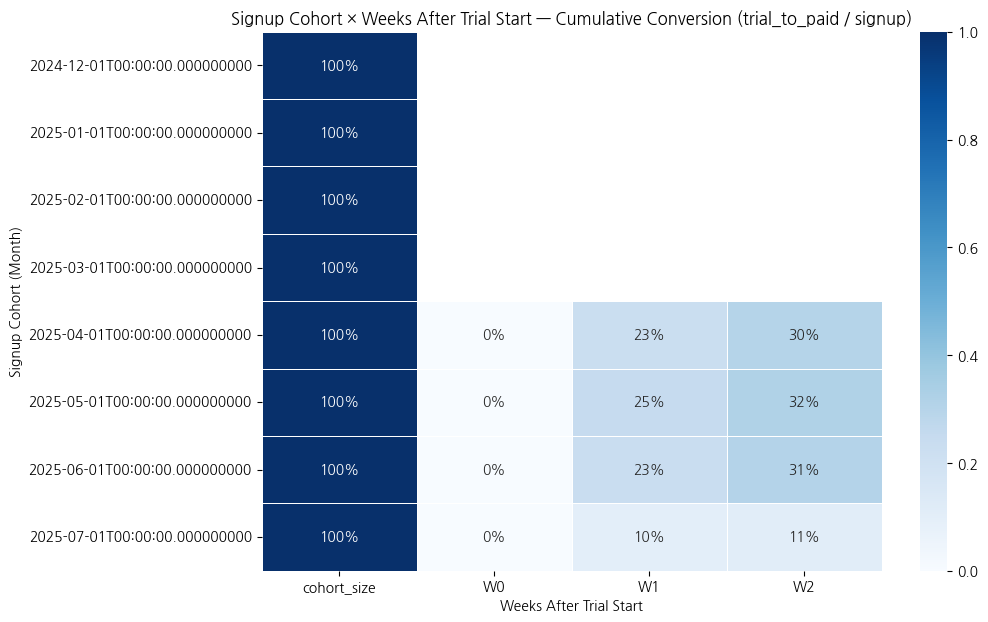

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 0) Ï†ïÍ∑úÌôî & ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ ÏßÄÏ†ï ---
ph = plan_history.copy()
ph['reason'] = ph['reason'].astype(str).str.strip().str.lower()
ph['plan_status'] = ph['plan_status'].astype(str).str.strip().str.lower()

ts_col = 'change_time'
ph[ts_col] = pd.to_datetime(ph[ts_col], errors='coerce')

users = users.copy()
users['created_at'] = pd.to_datetime(users['created_at'], errors='coerce')

# --- 1) ÌïµÏã¨ ÌÉÄÏûÑÌè¨Ïù∏Ìä∏ ---
signup = users[['user_id','created_at']].rename(columns={'created_at':'signup_ts'}).dropna()

trial_start = (ph.loc[ph['plan_status'].eq('trialing'), ['user_id', ts_col]]
                 .dropna()
                 .sort_values(ts_col)
                 .groupby('user_id', as_index=False).first()
                 .rename(columns={ts_col:'trial_start_ts'}))

paid = (ph.loc[ph['reason'].eq('trial_to_paid'), ['user_id', ts_col]]
          .dropna()
          .sort_values(ts_col)
          .groupby('user_id', as_index=False).first()
          .rename(columns={ts_col:'paid_ts'}))

expired = (ph.loc[ph['reason'].eq('trial_expired'), ['user_id', ts_col]]
            .dropna()
            .sort_values(ts_col)
            .groupby('user_id', as_index=False).first()
            .rename(columns={ts_col:'expired_ts'}))

base = (signup
        .merge(trial_start, on='user_id', how='left')
        .merge(paid, on='user_id', how='left')
        .merge(expired, on='user_id', how='left'))

# --- 2) Í¥ÄÏ∞∞ ÏúàÎèÑÏö∞ & Í≤∞Í≥º ÎùºÎ≤® ---
WINDOW_DAYS = 20  # P80(16) + Ïó¨Ïú† 3 ‚âà 19 ‚Üí 20ÏùºÎ°ú
base['window_start'] = np.where(base['trial_start_ts'].notna(), base['trial_start_ts'], base['signup_ts'])
base['window_start'] = pd.to_datetime(base['window_start'])
base['window_end']   = base['window_start'] + pd.to_timedelta(WINDOW_DAYS, 'D')

paid_win = base['paid_ts'].where(base['paid_ts'].between(base['window_start'], base['window_end']))
exp_win  = base['expired_ts'].where(base['expired_ts'].between(base['window_start'], base['window_end']))
first_ts = pd.concat([paid_win, exp_win], axis=1).min(axis=1)

base['outcome'] = np.where(first_ts.isna(), 'pending',
                           np.where(paid_win.notna() & ((exp_win.isna()) | (paid_win <= exp_win)),
                                    'paid', 'expired'))

# --- 3) Í≤ΩÍ≥º 'Ï£º' Î≤ÑÌÇ∑(W0: D0-6, W1: D7-13, W2: D14-20) ---
is_paid_first = base['outcome'].eq('paid')
paid_age_days = (paid_win - base['window_start']).dt.days.where(is_paid_first)
paid_age_week = np.floor_divide(paid_age_days, 7).astype('float').clip(lower=0, upper=2)
base['paid_age_week'] = paid_age_week

# --- 4) Ìñâ ÏΩîÌò∏Ìä∏(ÏõîÎ≥Ñ signup) + ÏµúÏã† ÏΩîÌò∏Ìä∏ Í≤ÄÏó¥ Ï†úÍ±∞ ---
base['cohort_month'] = base['signup_ts'].dt.to_period('M').dt.to_timestamp()
SNAPSHOT = pd.Timestamp.today().normalize()
eligible = base.loc[base['window_end'] <= SNAPSHOT].copy()

# --- 5) ÎàÑÏ†Å Ï†ÑÌôòÏú® Í≥ÑÏÇ∞: trial_to_paid / signup ---
denom = eligible.groupby('cohort_month')['user_id'].nunique().rename('N_signup')

paid_week_counts = (
    eligible.dropna(subset=['paid_age_week'])
            .assign(paid_age_week=lambda df: df['paid_age_week'].astype(int))
            .groupby(['cohort_month','paid_age_week'])['user_id'].nunique()
            .unstack(fill_value=0)  # columns: 0,1,2
)

for w in [0,1,2]:
    if w not in paid_week_counts.columns:
        paid_week_counts[w] = 0
paid_week_counts = paid_week_counts[[0,1,2]]

paid_cum = paid_week_counts.copy()
paid_cum[1] += paid_cum[0]
paid_cum[2] += paid_cum[1]

cr_cum = (paid_cum
          .div(denom, axis=0)
          .reindex(denom.index)
          .sort_index())

heat_df = pd.concat([pd.Series(1.0, index=cr_cum.index, name='cohort_size'),
                     cr_cum.rename(columns={0:'W0',1:'W1',2:'W2'})], axis=1)

# --- 6) ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(10, 7))
ax = sns.heatmap(
    heat_df,
    annot=True, fmt='.0%',
    cmap='Blues', cbar=True,
    vmin=0.0, vmax=1.0,
    linewidths=.5, linecolor='white'
)
ax.set_title('Signup Cohort √ó Weeks After Trial Start ‚Äî Cumulative Conversion (trial_to_paid / signup)')
ax.set_xlabel('Weeks After Trial Start'); ax.set_ylabel('Signup Cohort (Month)')
plt.yticks(rotation=0); plt.show()


In [ ]:
print(plan_history.columns)


Index(['user_id', 'change_time', 'plan_name', 'plan_status', 'reason'], dtype='object')


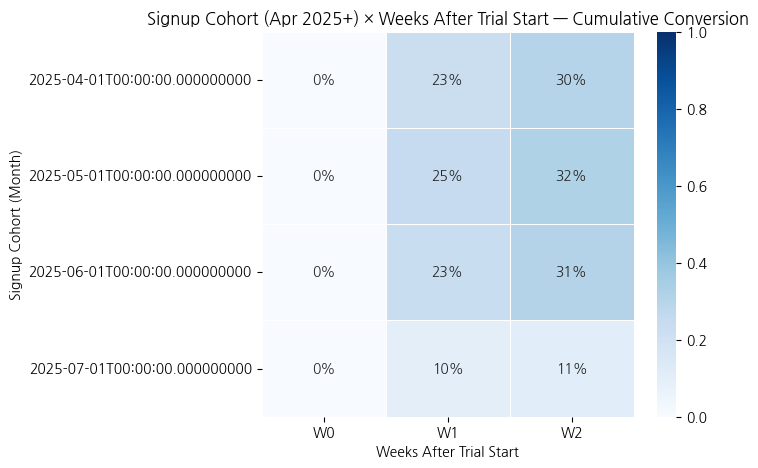

In [ ]:
# 4Ïõî(2025-04-01) Ïù¥ÌõÑÎßå ÏÑ†ÌÉù
heat_df_filtered = heat_df.loc[heat_df.index >= pd.Timestamp('2025-04-01'), ['W0','W1','W2']]

plt.figure(figsize=(6, 5))
ax = sns.heatmap(
    heat_df_filtered,
    annot=True, fmt='.0%',
    cmap='Blues', cbar=True,
    vmin=0.0, vmax=1.0,
    linewidths=.5, linecolor='white'
)
ax.set_title('Signup Cohort (Apr 2025+) √ó Weeks After Trial Start ‚Äî Cumulative Conversion')
ax.set_xlabel('Weeks After Trial Start')
ax.set_ylabel('Signup Cohort (Month)')
plt.yticks(rotation=0)
plt.show()


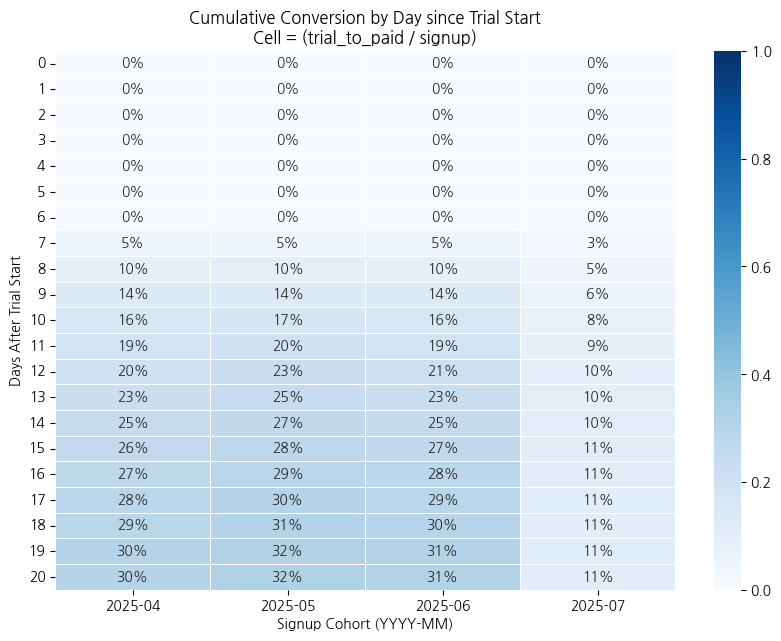

In [ ]:
# === Signup ÏΩîÌò∏Ìä∏(Ïó¥=YYYY-MM) √ó Í≤ΩÍ≥º Ïùº(Ìñâ=Day 0~20) ===
# Í∞í = ÎàÑÏ†Å Ï†ÑÌôòÏú® (trial_to_paid / signup)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 0) Ï†ïÍ∑úÌôî
ph = plan_history.copy()
ph['reason'] = ph['reason'].astype(str).str.strip().str.lower()
ph['plan_status'] = ph['plan_status'].astype(str).str.strip().str.lower()
ph['change_time'] = pd.to_datetime(ph['change_time'], errors='coerce')

u = users.copy()
u['created_at'] = pd.to_datetime(u['created_at'], errors='coerce')

# 1) ÌïµÏã¨ ÌÉÄÏûÑÌè¨Ïù∏Ìä∏
signup = u[['user_id','created_at']].rename(columns={'created_at':'signup_ts'}).dropna()
trial_start = (ph.loc[ph['plan_status'].eq('trialing'), ['user_id','change_time']]
                 .sort_values('change_time')
                 .groupby('user_id', as_index=False).first()
                 .rename(columns={'change_time':'trial_start_ts'}))
paid = (ph.loc[ph['reason'].eq('trial_to_paid'), ['user_id','change_time']]
          .sort_values('change_time')
          .groupby('user_id', as_index=False).first()
          .rename(columns={'change_time':'paid_ts'}))
expired = (ph.loc[ph['reason'].eq('trial_expired'), ['user_id','change_time']]
            .sort_values('change_time')
            .groupby('user_id', as_index=False).first()
            .rename(columns={'change_time':'expired_ts'}))

base = (signup
        .merge(trial_start, on='user_id', how='left')
        .merge(paid, on='user_id', how='left')
        .merge(expired, on='user_id', how='left'))

# 2) Í¥ÄÏ∞∞ ÏúàÎèÑÏö∞/ÎùºÎ≤®ÎßÅ
MAX_D = 20  # P80(16)+Ïó¨Ïú†
base['window_start'] = np.where(base['trial_start_ts'].notna(), base['trial_start_ts'], base['signup_ts'])
base['window_start'] = pd.to_datetime(base['window_start'])
base['window_end']   = base['window_start'] + pd.to_timedelta(MAX_D, 'D')

paid_win = base['paid_ts'].where(base['paid_ts'].between(base['window_start'], base['window_end']))
exp_win  = base['expired_ts'].where(base['expired_ts'].between(base['window_start'], base['window_end']))
first_ts = pd.concat([paid_win, exp_win], axis=1).min(axis=1)
base['outcome'] = np.where(first_ts.isna(), 'pending',
                           np.where(paid_win.notna() & ((exp_win.isna()) | (paid_win <= exp_win)),
                                    'paid','expired'))

# 3) ÏΩîÌò∏Ìä∏ Ïó¥ ÎùºÎ≤®(YYYY-MM) + eligibleÎßå ÏÇ¨Ïö© + Í≤ΩÍ≥º "Ïùº" Í≥ÑÏÇ∞
base['cohort_month_lbl'] = base['signup_ts'].dt.strftime('%Y-%m')
SNAPSHOT = pd.Timestamp.today().normalize()
eligible = base.loc[base['window_end'] <= SNAPSHOT].copy()

is_paid_first = eligible['outcome'].eq('paid')
eligible['paid_age_day'] = (paid_win - eligible['window_start']).dt.days.where(is_paid_first)
eligible = eligible.loc[eligible['paid_age_day'].between(0, MAX_D, inclusive='both')]

# 4) Î∂ÑÎ™®(ÏΩîÌò∏Ìä∏Î≥Ñ signup Ïàò)
denom = (base.loc[base['window_end'] <= SNAPSHOT]
             .groupby('cohort_month_lbl')['user_id'].nunique()
             .rename('N_signup'))

# 5) ÏùºÎ≥Ñ ‚ÄúÍ∑∏ÎÇ† ÏµúÏ¥à Ïú†Î£å‚Äù Ïπ¥Ïö¥Ìä∏ ‚Üí ÎàÑÏ†Å ‚Üí Ï†ÑÌôòÏú®
daily_counts = (eligible.groupby(['cohort_month_lbl','paid_age_day'])['user_id']
                        .nunique()
                        .unstack(fill_value=0))  # columns: day 0..MAX_D (ÏùºÎ∂ÄÎßå ÏûàÏùå)

# ÎàÑÎùΩÎêú Ïùº(day) Î≥¥Í∞ï Î∞è Ï†ïÎ†¨(0~MAX_D)
all_days = pd.Index(range(0, MAX_D+1), name='paid_age_day')
daily_counts = daily_counts.reindex(columns=all_days, fill_value=0).sort_index(axis=1)

# ÎàÑÏ†ÅÌï©(Ìñâ Í∏∞Ï§Ä: Ïùº‚Üë) ‚Üí Ï†ÑÌôòÏú®Î°ú Î≥ÄÌôò
cum_counts = daily_counts.cumsum(axis=1)
cr_cum = (cum_counts.T / denom).T  # ÏΩîÌò∏Ìä∏Î≥ÑÎ°ú Î∂ÑÎ™® ÎÇòÎàî

# 6) 2025-04 Ïù¥ÌõÑ ÏΩîÌò∏Ìä∏Îßå, Ïó¥ ÎùºÎ≤® ÏßßÍ≤å ÌëúÏãú
cr_cum = cr_cum.loc[cr_cum.index >= '2025-04']

# 7) ÌûàÌä∏Îßµ (Ìñâ=Day 0..20, Ïó¥=YYYY-MM)
plt.figure(figsize=(10, 7))
ax = sns.heatmap(
    cr_cum.T,                 # Ï†ÑÏπòÌï¥ÏÑú Ìñâ=Ïùº, Ïó¥=ÏΩîÌò∏Ìä∏
    annot=True, fmt='.0%',    # ÌçºÏÑºÌä∏ ÌëúÍ∏∞
    cmap='Blues', vmin=0.0, vmax=1.0,
    cbar=True, linewidths=.5, linecolor='white'
)
ax.set_title('Cumulative Conversion by Day since Trial Start\nCell = (trial_to_paid / signup)')
ax.set_xlabel('Signup Cohort (YYYY-MM)')
ax.set_ylabel('Days After Trial Start')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


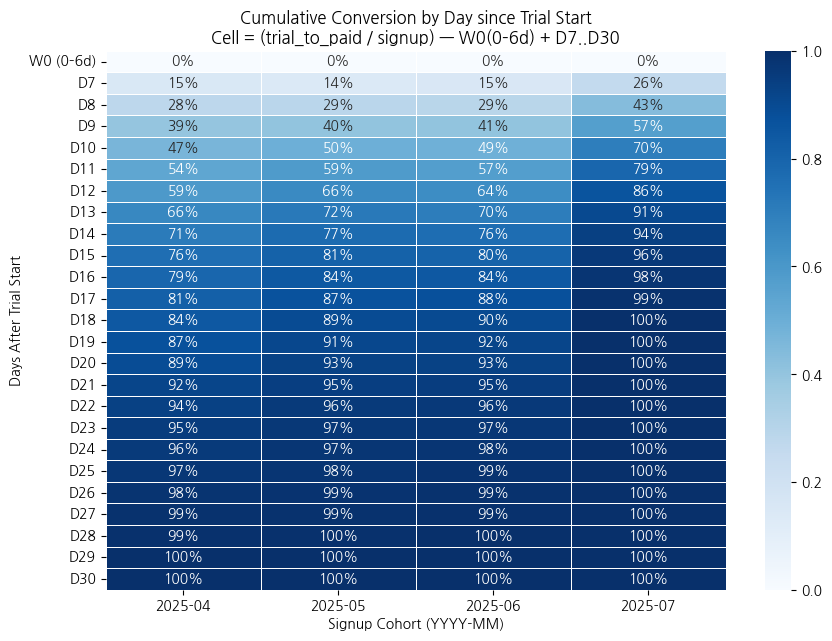

In [ ]:
# === Signup ÏΩîÌò∏Ìä∏(Ïó¥=YYYY-MM) √ó Í≤ΩÍ≥ºÏùº(Ìñâ=W0(0~6Ïùº), D7..D30) ===
# Í∞í = ÎàÑÏ†Å Ï†ÑÌôòÏú® (trial_to_paid / signup)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 0) Ï†ïÍ∑úÌôî
ph = plan_history.copy()
ph['reason'] = ph['reason'].astype(str).str.strip().str.lower()
ph['plan_status'] = ph['plan_status'].astype(str).str.strip().str.lower()
ph['change_time'] = pd.to_datetime(ph['change_time'], errors='coerce')

u = users.copy()
u['created_at'] = pd.to_datetime(u['created_at'], errors='coerce')

# 1) ÌïµÏã¨ ÌÉÄÏûÑÌè¨Ïù∏Ìä∏
signup = u[['user_id','created_at']].rename(columns={'created_at':'signup_ts'}).dropna()

trial_start = (ph.loc[ph['plan_status'].eq('trialing'), ['user_id','change_time']]
                 .sort_values('change_time')
                 .groupby('user_id', as_index=False).first()
                 .rename(columns={'change_time':'trial_start_ts'}))

paid = (ph.loc[ph['reason'].eq('trial_to_paid'), ['user_id','change_time']]
          .sort_values('change_time')
          .groupby('user_id', as_index=False).first()
          .rename(columns={'change_time':'paid_ts'}))

expired = (ph.loc[ph['reason'].eq('trial_expired'), ['user_id','change_time']]
            .sort_values('change_time')
            .groupby('user_id', as_index=False).first()
            .rename(columns={'change_time':'expired_ts'}))

base = (signup
        .merge(trial_start, on='user_id', how='left')
        .merge(paid, on='user_id', how='left')
        .merge(expired, on='user_id', how='left'))

# 2) Í¥ÄÏ∞∞ ÏúàÎèÑÏö∞/ÎùºÎ≤®ÎßÅ
MAX_D = 30  # ‚Üê 20ÏùºÏóêÏÑú 30ÏùºÎ°ú ÌôïÏû•
base['window_start'] = np.where(base['trial_start_ts'].notna(), base['trial_start_ts'], base['signup_ts'])
base['window_start'] = pd.to_datetime(base['window_start'])
base['window_end']   = base['window_start'] + pd.to_timedelta(MAX_D, 'D')

paid_win = base['paid_ts'].where(base['paid_ts'].between(base['window_start'], base['window_end']))
exp_win  = base['expired_ts'].where(base['expired_ts'].between(base['window_start'], base['window_end']))

first_ts = pd.concat([paid_win, exp_win], axis=1).min(axis=1)
base['outcome'] = np.where(first_ts.isna(), 'pending',
                           np.where(paid_win.notna() & ((exp_win.isna()) | (paid_win <= exp_win)),
                                    'paid','expired'))

# 3) ÏΩîÌò∏Ìä∏(Ïó¥ ÎùºÎ≤®=YYYY-MM) + eligible + 'Í≤ΩÍ≥º Ïùº' Í≥ÑÏÇ∞
base['cohort_month_lbl'] = base['signup_ts'].dt.strftime('%Y-%m')
SNAPSHOT = pd.Timestamp.today().normalize()
eligible = base.loc[base['window_end'] <= SNAPSHOT].copy()

# paidÍ∞Ä 'Í∞ÄÏû• Ïù¥Î•∏ Í≤∞Í≥º'Ïù∏ Í≤ΩÏö∞Îßå Í≤ΩÍ≥ºÏùº Í≥ÑÏÇ∞
is_paid_first = eligible['outcome'].eq('paid')
eligible['paid_age_day'] = (eligible['paid_ts'] - eligible['window_start']).dt.days.where(is_paid_first)
eligible = eligible.loc[eligible['paid_age_day'].between(0, MAX_D, inclusive='both')]

# 4) Î∂ÑÎ™®(ÏΩîÌò∏Ìä∏Î≥Ñ signup Ïàò)
denom = (eligible.groupby('cohort_month_lbl')['user_id'].nunique()
                 .rename('N_signup'))

# 5) ÏùºÎ≥Ñ ‚ÄúÍ∑∏ÎÇ† ÏµúÏ¥à Ïú†Î£å‚Äù Ïπ¥Ïö¥Ìä∏ ‚Üí ÎàÑÏ†Å ‚Üí Ï†ÑÌôòÏú®
daily_counts = (eligible.groupby(['cohort_month_lbl','paid_age_day'])['user_id']
                        .nunique()
                        .unstack(fill_value=0))          # columns: Ïã§Ï†ú Îì±Ïû•Ìïú dayÎì§Îßå

# Îπ†ÏßÑ Ïùº(day) Î≥¥Í∞ï Î∞è Ï†ïÎ†¨(0..MAX_D)
all_days = pd.Index(range(0, MAX_D+1), name='paid_age_day')
daily_counts = daily_counts.reindex(columns=all_days, fill_value=0).sort_index(axis=1)

# ÎàÑÏ†ÅÌï© ‚Üí Ï†ÑÌôòÏú®(Î∂ÑÎ™®=signup)
cum_counts = daily_counts.cumsum(axis=1)
cr_cum = (cum_counts.T / denom).T

# 6) 2025-04 Ïù¥ÌõÑ ÏΩîÌò∏Ìä∏Îßå ÏÇ¨Ïö©
cr_cum = cr_cum.loc[cr_cum.index >= '2025-04']

# 7) ÌñâÏùÑ W0(0~6Ïùº) + D7..D30Î°ú Ïû¨Íµ¨ÏÑ±
row_labels = ['W0 (0‚Äì6d)'] + [f'D{d}' for d in range(7, MAX_D+1)]
plot_dict = {}
for cohort, row in cr_cum.iterrows():
    vals = [ row.loc[0:6].max() ]  # W0 = D0~6 ÎàÑÏ†Å(=D6 Í∞í)
    vals += [ row.get(d, np.nan) for d in range(7, MAX_D+1) ]
    plot_dict[cohort] = vals

plot_df = pd.DataFrame(plot_dict, index=row_labels)

# 8) ÌûàÌä∏Îßµ (Ìñâ=W0 + D7..D30, Ïó¥=ÏΩîÌò∏Ìä∏ YYYY-MM)
plt.figure(figsize=(10, 7))
ax = sns.heatmap(
    plot_df, annot=True, fmt='.0%',
    cmap='Blues', vmin=0.0, vmax=1.0,
    cbar=True, linewidths=.5, linecolor='white'
)
ax.set_title('Cumulative Conversion by Day since Trial Start\nCell = (trial_to_paid / signup) ‚Äî W0(0‚Äì6d) + D7..D30')
ax.set_xlabel('Signup Cohort (YYYY-MM)')
ax.set_ylabel('Days After Trial Start')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


In [ ]:
plan_history['change_time'].max()

'2025-07-21 23:59:50'

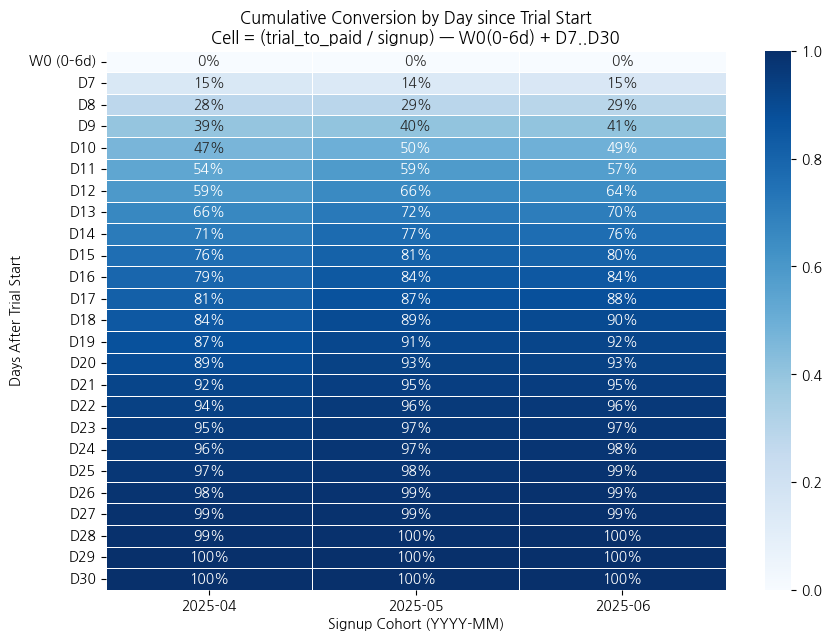

In [ ]:
# 6) 2025-04 Ïù¥ÏÉÅ 2025-06 Ïù¥ÌïòÎßå ÏÇ¨Ïö© (7Ïõî Ï†úÏô∏)
cr_cum = cr_cum.loc[(cr_cum.index >= '2025-04') & (cr_cum.index <= '2025-06')]

# 7) ÌñâÏùÑ W0(0~6Ïùº) + D7..D30Î°ú Ïû¨Íµ¨ÏÑ±
row_labels = ['W0 (0‚Äì6d)'] + [f'D{d}' for d in range(7, MAX_D+1)]
plot_dict = {}
for cohort, row in cr_cum.iterrows():
    vals = [ row.loc[0:6].max() ]  # W0 = D0~6 ÎàÑÏ†Å(=D6 Í∞í)
    vals += [ row.get(d, np.nan) for d in range(7, MAX_D+1) ]
    plot_dict[cohort] = vals

plot_df = pd.DataFrame(plot_dict, index=row_labels)

# 8) ÌûàÌä∏Îßµ
plt.figure(figsize=(10, 7))
ax = sns.heatmap(
    plot_df, annot=True, fmt='.0%',
    cmap='Blues', vmin=0.0, vmax=1.0,
    cbar=True, linewidths=.5, linecolor='white'
)
ax.set_title('Cumulative Conversion by Day since Trial Start\nCell = (trial_to_paid / signup) ‚Äî W0(0‚Äì6d) + D7..D30')
ax.set_xlabel('Signup Cohort (YYYY-MM)')
ax.set_ylabel('Days After Trial Start')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


In [ ]:
# ÎßàÏßÄÎßâ Í∞íÏù¥ 1.0Ïù∏ÏßÄ Ï≤¥ÌÅ¨
print(cr_cum.max().max())  # Ï†Ñ ÏΩîÌò∏Ìä∏, Ï†Ñ ÏùºÏàò Ï§ë ÏµúÎåÄÍ∞í


1.0


In [ ]:
MAX_D = 30
SNAPSHOT = pd.Timestamp.today().normalize()

# 1) Í¥ÄÏ∞∞ ÏôÑÎ£åÎêú 'Î™®Îì† signup'Î°ú Î∂ÑÎ™® Í≥ÑÏÇ∞
eligible_signups = base.loc[base['window_end'] <= SNAPSHOT].copy()
denom = (eligible_signups.groupby('cohort_month_lbl')['user_id']
                      .nunique()
                      .rename('N_signup'))

# 2) 'paidÎßå' Îî∞Î°ú ÎΩëÏïÑ ÏùºÏàò Î≤ÑÌÇ∑ÌåÖ
paid_only = eligible_signups.loc[eligible_signups['outcome'].eq('paid')].copy()
paid_only['paid_age_day'] = (paid_only['paid_ts'] - paid_only['window_start']).dt.days
paid_only = paid_only.loc[paid_only['paid_age_day'].between(0, MAX_D)]

# 3) ÏùºÎ≥Ñ paid Ïπ¥Ïö¥Ìä∏ ‚Üí ÎàÑÏ†Å ‚Üí Ï†ÑÌôòÏú®(Î∂ÑÎ™®=signup)
daily_counts = (paid_only.groupby(['cohort_month_lbl','paid_age_day'])['user_id']
                        .nunique()
                        .unstack(fill_value=0)
                        .reindex(columns=range(0, MAX_D+1), fill_value=0)
                        .sort_index(axis=1))

cum_counts = daily_counts.cumsum(axis=1)
cr_cum = cum_counts.div(denom, axis=0)  # ‚Üê Î∂ÑÎ™®Îäî 'Î™®Îì† signup'

# 4) 2025-04 ~ 2025-06Îßå ÏÇ¨Ïö©(7Ïõî Ï†úÏô∏)
cr_cum = cr_cum.loc[(cr_cum.index >= '2025-04') & (cr_cum.index <= '2025-06')]

# 5) Ìñâ Ïû¨Íµ¨ÏÑ±: W0(0~6Ïùº) + D7..D30
row_labels = ['W0 (0‚Äì6d)'] + [f'D{d}' for d in range(7, MAX_D+1)]
plot_dict = {}
for cohort, row in cr_cum.iterrows():
    vals = [ row.loc[0:6].max() ]  # D6 Í∞í = W0
    vals += [ row.get(d, np.nan) for d in range(7, MAX_D+1) ]
    plot_dict[cohort] = vals
plot_df = pd.DataFrame(plot_dict, index=row_labels)

# (ÏÑ†ÌÉù) sanity check: ÎàÑÏ†Å paidÍ∞Ä 100% ÎÑòÏßÄ ÏïäÎäîÏßÄ
print('max value =', float(plot_df.max().max()))


max value = 0.34680350652127434


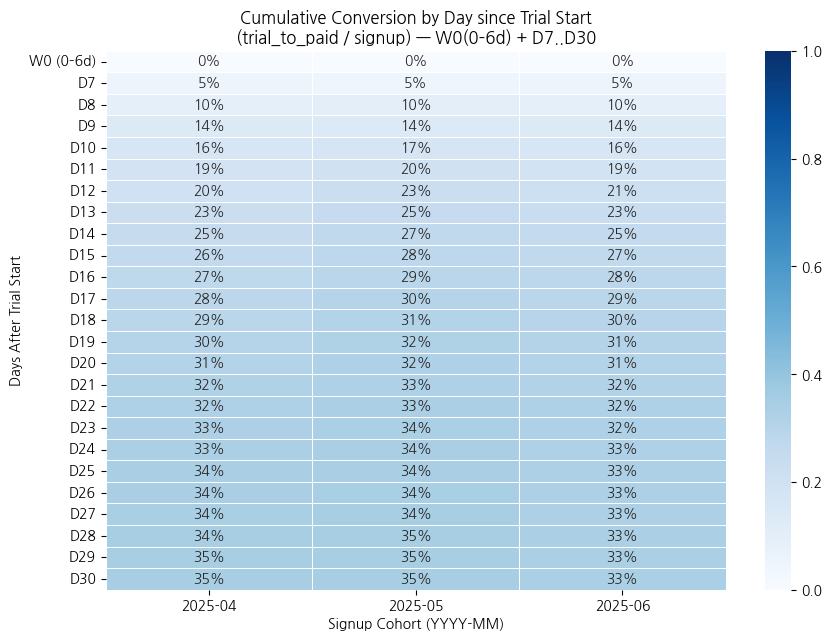

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

MAX_D = 30
SNAPSHOT = pd.Timestamp.today().normalize()

# 1) Î∂ÑÎ™®: Î™®Îì† signup (Í¥ÄÏ∞∞ ÏôÑÎ£åÎêú ÏΩîÌò∏Ìä∏Îßå)
eligible_signups = base.loc[base['window_end'] <= SNAPSHOT].copy()
denom = (eligible_signups.groupby('cohort_month_lbl')['user_id']
                      .nunique()
                      .rename('N_signup'))

# 2) Î∂ÑÏûê: paidÎßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ Í≤ΩÍ≥ºÏùº Í≥ÑÏÇ∞
paid_only = eligible_signups.loc[eligible_signups['outcome'].eq('paid')].copy()
paid_only['paid_age_day'] = (paid_only['paid_ts'] - paid_only['window_start']).dt.days
paid_only = paid_only.loc[paid_only['paid_age_day'].between(0, MAX_D)]

# 3) ÏùºÎ≥Ñ paid Ïπ¥Ïö¥Ìä∏ ‚Üí ÎàÑÏ†Å ‚Üí Ï†ÑÌôòÏú®(Î∂ÑÎ™®=signup)
daily_counts = (paid_only.groupby(['cohort_month_lbl','paid_age_day'])['user_id']
                        .nunique()
                        .unstack(fill_value=0)
                        .reindex(columns=range(0, MAX_D+1), fill_value=0)
                        .sort_index(axis=1))
cum_counts = daily_counts.cumsum(axis=1)
cr_cum = cum_counts.div(denom, axis=0)

# 4) 2025-04 ~ 2025-06Îßå ÏÇ¨Ïö© (7Ïõî Ï†úÏô∏)
cr_cum = cr_cum.loc[(cr_cum.index >= '2025-04') & (cr_cum.index <= '2025-06')]

# 5) Ìñâ: W0(0~6Ïùº) + D7..D30Î°ú Ïû¨Íµ¨ÏÑ±
row_labels = ['W0 (0‚Äì6d)'] + [f'D{d}' for d in range(7, MAX_D+1)]
plot_dict = {}
for cohort, row in cr_cum.iterrows():
    vals = [ row.loc[0:6].max() ]  # D6 Í∞í = W0
    vals += [ row.get(d, np.nan) for d in range(7, MAX_D+1) ]
    plot_dict[cohort] = vals
plot_df = pd.DataFrame(plot_dict, index=row_labels)

# 6) ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 7))
ax = sns.heatmap(
    plot_df, annot=True, fmt='.0%',
    cmap='Blues', vmin=0.0, vmax=1.0,
    cbar=True, linewidths=.5, linecolor='white'
)
ax.set_title('Cumulative Conversion by Day since Trial Start\n(trial_to_paid / signup) ‚Äî W0(0‚Äì6d) + D7..D30')
ax.set_xlabel('Signup Cohort (YYYY-MM)')
ax.set_ylabel('Days After Trial Start')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


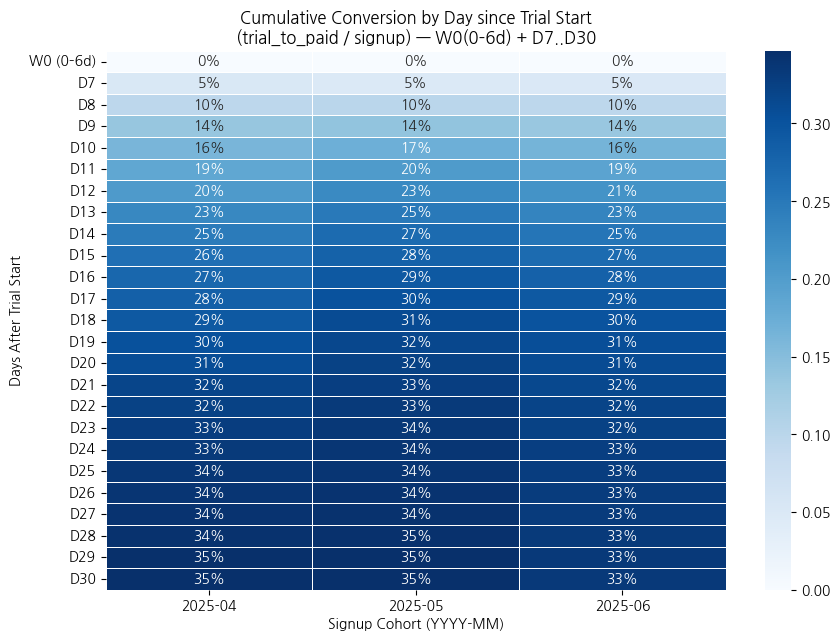

In [ ]:
# ÏÉâÏÉÅ Ïä§ÏºÄÏùº ÏµúÎåìÍ∞íÏùÑ Îç∞Ïù¥ÌÑ∞ maxÎ°ú ÏßÄÏ†ï
vmax_val = plot_df.max().max()  # ‚âà 0.3468

plt.figure(figsize=(10, 7))
ax = sns.heatmap(
    plot_df, annot=True, fmt='.0%',
    cmap='Blues', vmin=0.0, vmax=vmax_val,
    cbar=True, linewidths=.5, linecolor='white'
)
ax.set_title('Cumulative Conversion by Day since Trial Start\n(trial_to_paid / signup) ‚Äî W0(0‚Äì6d) + D7..D30')
ax.set_xlabel('Signup Cohort (YYYY-MM)')
ax.set_ylabel('Days After Trial Start')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


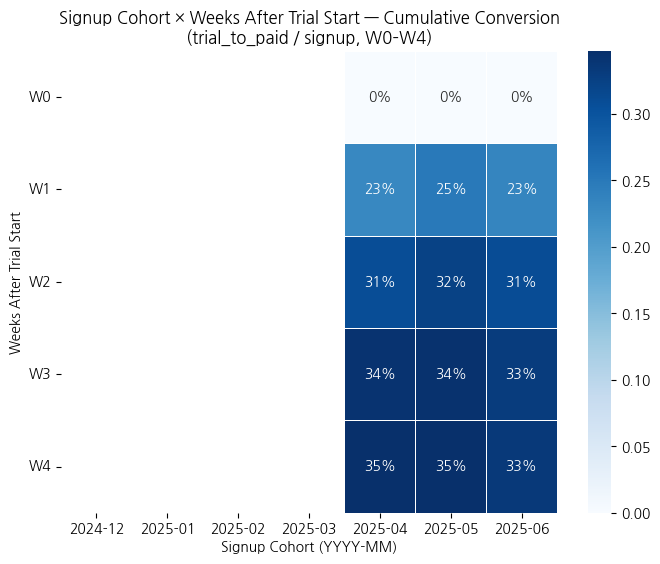

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ===== ÌååÎùºÎØ∏ÌÑ∞ =====
LAST_DAY = 31            # Ìïú Îã¨ ÏµúÎåÄ 31Ïùº
MAX_WEEK = LAST_DAY // 7 # 31Ïùº ‚áí 4 (W0~W4)
EXCLUDE_MONTH = '2025-07'  # 7Ïõî Ï†úÏô∏

# --- 0) Ï†ïÍ∑úÌôî & ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ ÏßÄÏ†ï ---
ph = plan_history.copy()
ph['reason'] = ph['reason'].astype(str).str.strip().str.lower()
ph['plan_status'] = ph['plan_status'].astype(str).str.strip().str.lower()
ph['change_time'] = pd.to_datetime(ph['change_time'], errors='coerce')

u = users.copy()
u['created_at'] = pd.to_datetime(u['created_at'], errors='coerce')

# --- 1) ÌïµÏã¨ ÌÉÄÏûÑÌè¨Ïù∏Ìä∏ ---
signup = u[['user_id','created_at']].rename(columns={'created_at':'signup_ts'}).dropna()

trial_start = (ph.loc[ph['plan_status'].eq('trialing'), ['user_id','change_time']]
                 .sort_values('change_time')
                 .groupby('user_id', as_index=False).first()
                 .rename(columns={'change_time':'trial_start_ts'}))

paid = (ph.loc[ph['reason'].eq('trial_to_paid'), ['user_id','change_time']]
          .sort_values('change_time')
          .groupby('user_id', as_index=False).first()
          .rename(columns={'change_time':'paid_ts'}))

expired = (ph.loc[ph['reason'].eq('trial_expired'), ['user_id','change_time']]
            .sort_values('change_time')
            .groupby('user_id', as_index=False).first()
            .rename(columns={'change_time':'expired_ts'}))

base = (signup
        .merge(trial_start, on='user_id', how='left')
        .merge(paid, on='user_id', how='left')
        .merge(expired, on='user_id', how='left'))

# --- 2) Í¥ÄÏ∞∞ ÏúàÎèÑÏö∞ & Í≤∞Í≥º ÎùºÎ≤® ---
base['window_start'] = np.where(base['trial_start_ts'].notna(), base['trial_start_ts'], base['signup_ts'])
base['window_start'] = pd.to_datetime(base['window_start'])
base['window_end']   = base['window_start'] + pd.to_timedelta(LAST_DAY, 'D')  # D0~D31 Ìè¨Ìï®

paid_win = base['paid_ts'].where(base['paid_ts'].between(base['window_start'], base['window_end']))
exp_win  = base['expired_ts'].where(base['expired_ts'].between(base['window_start'], base['window_end']))
first_ts = pd.concat([paid_win, exp_win], axis=1).min(axis=1)

base['outcome'] = np.where(first_ts.isna(), 'pending',
                           np.where(paid_win.notna() & ((exp_win.isna()) | (paid_win <= exp_win)),
                                    'paid','expired'))

# --- 3) ÏΩîÌò∏Ìä∏ ÎùºÎ≤®(YYYY-MM Î¨∏ÏûêÏó¥Î°ú ÍπîÎÅîÌïòÍ≤å) & eligible ---
base['cohort_month_lbl'] = base['signup_ts'].dt.strftime('%Y-%m')  # ‚Üê ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ Íº¨Î¶¨ Ï†úÍ±∞
SNAPSHOT = pd.Timestamp.today().normalize()
eligible_signups = base.loc[base['window_end'] <= SNAPSHOT].copy()

# 7Ïõî Ï†úÏô∏
eligible_signups = eligible_signups.loc[eligible_signups['cohort_month_lbl'] != EXCLUDE_MONTH]

# --- 4) Î∂ÑÎ™®: ÏΩîÌò∏Ìä∏Î≥Ñ signup Ïàò ---
denom = (eligible_signups.groupby('cohort_month_lbl')['user_id']
                      .nunique()
                      .rename('N_signup'))

# --- 5) Ï£ºÏ∞® Î≤ÑÌÇ∑: ‚ÄòÌï¥Îãπ Ï£ºÍπåÏßÄ ÎàÑÏ†Å paid‚Äô / signup ---
paid_only = eligible_signups.loc[eligible_signups['outcome'].eq('paid')].copy()
paid_only['age_days'] = (paid_only['paid_ts'] - paid_only['window_start']).dt.days
paid_only = paid_only.loc[paid_only['age_days'].between(0, LAST_DAY, inclusive='both')]

paid_only['age_week'] = np.floor_divide(paid_only['age_days'], 7).astype(int)
paid_only['age_week'] = paid_only['age_week'].clip(0, MAX_WEEK)  # W0~W4

# Ï£ºÏ∞®Î≥Ñ "Í∑∏ Ï£ºÏóê ÏµúÏ¥à Ïú†Î£å" Ïπ¥Ïö¥Ìä∏
wk_counts = (paid_only.groupby(['cohort_month_lbl','age_week'])['user_id']
                       .nunique()
                       .unstack(fill_value=0))

# Îπ†ÏßÑ Ï£ºÏ∞® Î≥¥Í∞ï & Ï†ïÎ†¨
for w in range(0, MAX_WEEK+1):
    if w not in wk_counts.columns:
        wk_counts[w] = 0
wk_counts = wk_counts[sorted(wk_counts.columns)]

# ÎàÑÏ†ÅÌï© ‚Üí Ï†ÑÌôòÏú®
wk_cum = wk_counts.cumsum(axis=1)
cr_weekly_cum = wk_cum.div(denom, axis=0)

# --- 6) ÌûàÌä∏ÎßµÏö© ÌÖåÏù¥Î∏î(W0~W4) ÎßåÎì§Í∏∞ ---
col_map = {w: f'W{w}' for w in range(0, MAX_WEEK+1)}  # {0:'W0',...,4:'W4'}
heat_df = cr_weekly_cum.rename(columns=col_map).sort_index()

# --- 7) ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    heat_df.T,                   # Ìñâ=Ï£ºÏ∞®, Ïó¥=ÏΩîÌò∏Ìä∏
    annot=True, fmt='.0%',
    cmap='Blues',
    vmin=0.0, vmax=max(0.001, heat_df.max().max()),  # Îç∞Ïù¥ÌÑ∞ ÏµúÎåÄÏπòÏóê ÎßûÏ∂∞ ÎåÄÎπÑ Í∞ïÌôî
    cbar=True, linewidths=.5, linecolor='white'
)
ax.set_title('Signup Cohort √ó Weeks After Trial Start ‚Äî Cumulative Conversion\n(trial_to_paid / signup, W0‚ÄìW4)')
ax.set_xlabel('Signup Cohort (YYYY-MM)')
ax.set_ylabel('Weeks After Trial Start')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


## Î≥¥Í∏∞ Ï¢ãÍ≤å ÏàòÏ†ïÌïú Ï∞ê ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù
Î¨∏Ï†úÏ†ê :Ïú†Î£å Ï†ÑÌôò ÌõÑ Ïú†ÏßÄÎäî Ïûò ÎêòÏßÄÎßå, Ï≤¥Ìóò(trial) ÌõÑ Ïú†Î£å Ï†ÑÌôòÏùÑ ÌïòÏßÄ ÏïäÏùÄ Í≥†Í∞ù ÎπÑÏú®Ïù¥ ÎÜíÎã§.   
Î™©Ìëú : ÏΩîÌò∏Ìä∏ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ > ÏõîÎ≥Ñ/ Ï£ºÍ∞ÑÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≥† Ïù¥ÏÉÅÏ†êÏù¥ ÏûàÎäîÏßÄ Î∞úÍ≤¨Ìï¥Î≥¥Ïûê  
Ï†ÑÌôòÏú®Ïùò Ï†ïÏùò : plan_history[reason] > trial_to_paid / sign_up Ïùò ÎπÑÏú®Î°ú Í≥ÑÏÇ∞

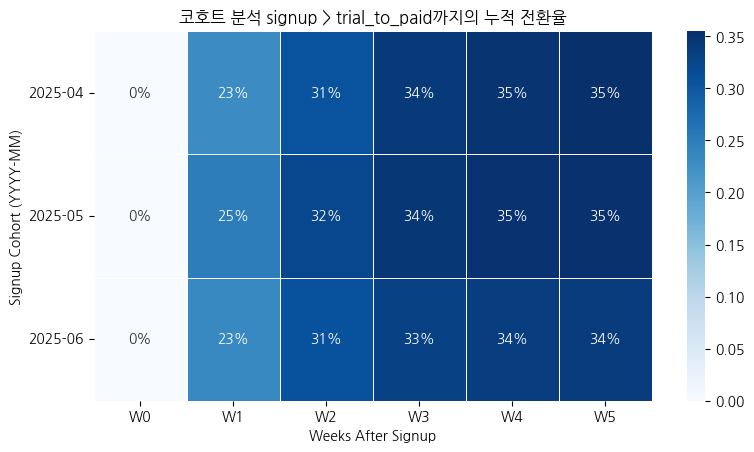

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ===== ÌååÎùºÎØ∏ÌÑ∞ =====
LAST_DAY = 41            # 0~41Ïùº ‚Üí W0~W5
MAX_WEEK = LAST_DAY // 7
INCLUDE_MONTHS = ['2025-04','2025-05','2025-06']  # 4~6Ïõî ÏΩîÌò∏Ìä∏(=signup Ïõî)
SNAPSHOT = pd.Timestamp.today().normalize()

# --- 0) Ï†ïÍ∑úÌôî ---
ph = plan_history.copy()
ph['reason'] = ph['reason'].astype(str).str.strip().str.lower()
ph['plan_status'] = ph['plan_status'].astype(str).str.strip().str.lower()
ph['change_time'] = pd.to_datetime(ph['change_time'], errors='coerce')

u = users.copy()
u['created_at'] = pd.to_datetime(u['created_at'], errors='coerce')

# --- 1) ÌïµÏã¨ ÌÉÄÏûÑÌè¨Ïù∏Ìä∏ (signup anchor) ---
signup = u[['user_id','created_at']].rename(columns={'created_at':'signup_ts'}).dropna()

paid = (ph.loc[ph['reason'].eq('trial_to_paid'), ['user_id','change_time']]
          .sort_values('change_time')
          .groupby('user_id', as_index=False).first()
          .rename(columns={'change_time':'paid_ts'}))

base = signup.merge(paid, on='user_id', how='left')
base['cohort_month_lbl'] = base['signup_ts'].dt.strftime('%Y-%m')

# --- 2) Í¥ÄÏ∞∞ Í∞ÄÎä•Ìïú ÏΩîÌò∏Ìä∏ Ï†úÌïú(Í≤ÄÏó¥ Î≥¥Ï†ï) ---
eligible = base.loc[
    base['cohort_month_lbl'].isin(INCLUDE_MONTHS) &
    (base['signup_ts'] + pd.to_timedelta(LAST_DAY, 'D') <= SNAPSHOT)
].copy()

# --- 3) Î∂ÑÎ™®: ÏΩîÌò∏Ìä∏Î≥Ñ signup Ïàò ---
denom = (eligible.groupby('cohort_month_lbl')['user_id']
                  .nunique()
                  .rename('N_signup'))

# --- 4) Î∂ÑÏûê: Í∞ÄÏûÖ ÌõÑ Ï£ºÏ∞®Î≥Ñ(Í∞ÄÏûÖ Ïù¥ÌõÑÎßå) ÏµúÏ¥à Ïú†Î£å Ï†ÑÌôò ‚Üí ÎàÑÏ†Å ‚Üí Ï†ÑÌôòÏú® ---
paid_only = eligible.loc[eligible['paid_ts'].notna()].copy()
paid_only['age_days'] = (paid_only['paid_ts'] - paid_only['signup_ts']).dt.days
paid_only = paid_only.loc[paid_only['age_days'].between(0, LAST_DAY, inclusive='both')]

paid_only['age_week'] = np.floor_divide(paid_only['age_days'], 7).astype(int)
paid_only['age_week'] = paid_only['age_week'].clip(0, MAX_WEEK)  # W0~W5

wk_counts = (paid_only.groupby(['cohort_month_lbl','age_week'])['user_id']
                       .nunique()
                       .unstack(fill_value=0))

# Îπ†ÏßÑ Ï£ºÏ∞® Î≥¥Í∞ï & Ï†ïÎ†¨
for w in range(0, MAX_WEEK+1):
    if w not in wk_counts.columns:
        wk_counts[w] = 0
wk_counts = wk_counts[sorted(wk_counts.columns)]  # 0..5

# ÎàÑÏ†ÅÌï© ‚Üí Ï†ÑÌôòÏú®(Î∂ÑÎ™®=signup)
wk_cum = wk_counts.cumsum(axis=1)
cr_weekly_cum = wk_cum.div(denom, axis=0)

# --- 5) ÌûàÌä∏Îßµ ÌÖåÏù¥Î∏î: Ìñâ=ÏΩîÌò∏Ìä∏(4~6Ïõî), Ïó¥=W0~W5 ---
col_map = {w: f'W{w}' for w in range(0, MAX_WEEK+1)}
heat_df = (cr_weekly_cum.rename(columns=col_map)
           .reindex(INCLUDE_MONTHS)              # 4~6Ïõî ÏàúÏÑú
           .loc[:, [f'W{w}' for w in range(0, MAX_WEEK+1)]])

# --- 6) ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(9, 4.8))
ax = sns.heatmap(
    heat_df,
    annot=True, fmt='.0%',
    cmap='Blues',
    vmin=0.0, vmax=max(0.001, heat_df.values.max()),
    cbar=True, linewidths=.5, linecolor='white'
)
ax.set_title('ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù signup > trial_to_paidÍπåÏßÄÏùò ÎàÑÏ†Å Ï†ÑÌôòÏú®')
ax.set_xlabel('Weeks After Signup')
ax.set_ylabel('Signup Cohort (YYYY-MM)')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


## ÏöîÏ≤≠Î∞õÏùÄ ÏΩîÌò∏Ìä∏ ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ

In [ ]:
!pip install koreanize_matplotlib


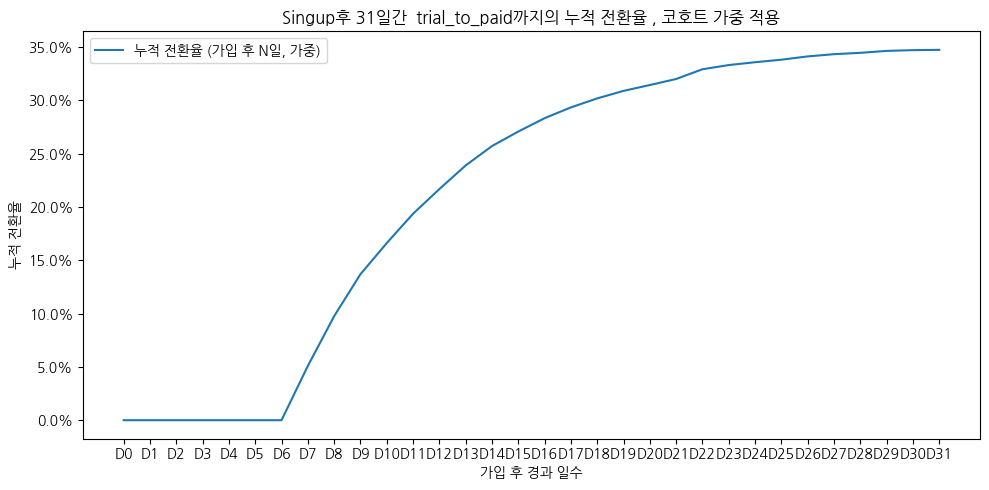

day    cum_cr
0     0  0.000000
1     1  0.000000
2     2  0.000000
3     3  0.000000
4     4  0.000000
5     5  0.000000
6     6  0.000000
7     7  0.050910
8     8  0.097597
9     9  0.136999
10   10  0.166205
11   11  0.193736

In [ ]:
# Trial ‚Üí Paid ÎàÑÏ†Å Ï†ÑÌôòÏú® (Í∞ÄÏûÖ ÌõÑ D0~D31, 4~6Ïõî, ÏΩîÌò∏Ìä∏ Í∞ÄÏ§ë, Í≤ÄÏó¥ Î≥¥Ï†ï)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib.ticker import PercentFormatter

# -----------------------------
# 0) ÏõêÎ≥∏ Ï†ïÎ¶¨
# -----------------------------
df = plan_history.copy()
df["reason"] = df["reason"].astype(str).str.strip().str.lower()
df["change_time"] = pd.to_datetime(df["change_time"])

# -----------------------------
# 1) 4~6Ïõî signup ÏΩîÌò∏Ìä∏ Íµ¨ÏÑ± (ÏõîÎã®ÏúÑ)
#    - Í∞ôÏùÄ Ïú†Ï†ÄÍ∞Ä Í∞ôÏùÄ Îã¨Ïóê Ïó¨Îü¨ Î≤à signup Ìï¥ÎèÑ Ï≤´ Í±¥Îßå
# -----------------------------
signup_raw = df[df["reason"] == "signup"].copy()
signup_raw["ym"] = signup_raw["change_time"].dt.to_period("M")

signup_46 = (
    signup_raw[signup_raw["change_time"].dt.month.isin([4, 5, 6])]
    .sort_values(["user_id", "change_time"])
    .drop_duplicates(subset=["user_id", "ym"], keep="first")
    .rename(columns={"change_time": "signup_time"})
    [["user_id", "ym", "signup_time"]]
)

# ÏΩîÌò∏Ìä∏Î≥Ñ(Ïõî) Î∂ÑÎ™®: Ïú†ÎãàÌÅ¨ Ïú†Ï†Ä Ïàò
signup_total = signup_46.groupby("ym")["user_id"].nunique().rename("signup_total")

# -----------------------------
# 2) trial_to_paidÏôÄ Ï°∞Ïù∏ÌïòÏó¨ "Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥ºÏùº" Í≥ÑÏÇ∞
#    - Í∞Å (user_id, ym)ÏóêÏÑú 0Ïùº Ïù¥ÏÉÅÏù∏ Ï†ÑÌôò Ï§ë ÏµúÏÜüÍ∞íÎßå ÏÇ¨Ïö©
# -----------------------------
paid_raw = df[df["reason"] == "trial_to_paid"][["user_id", "change_time"]].rename(
    columns={"change_time": "paid_time"}
)

age = signup_46.merge(paid_raw, on="user_id", how="left")
age["days_after"] = (age["paid_time"] - age["signup_time"]).dt.days

# ÏùåÏàò/Í≤∞Ï∏° Ï†úÍ±∞ ÌõÑ, Ïú†Ï†Ä√óÏΩîÌò∏Ìä∏Î≥Ñ ÏµúÏÜå Í≤ΩÍ≥ºÏùºÎßå ÏÇ¨Ïö©
age_valid = (
    age.loc[age["days_after"].notna() & (age["days_after"] >= 0)]
    .sort_values(["user_id", "ym", "days_after"])
    .drop_duplicates(subset=["user_id", "ym"], keep="first")
)

# -----------------------------
# 3) ÏΩîÌò∏Ìä∏Î≥Ñ D0~D31 Ï†ÑÌôò Ïàò, ÎàÑÏ†Å Ï†ÑÌôòÏú®
# -----------------------------
cols = pd.Index(range(0, 32))  # D0~D31

paid_by_day = (
    age_valid.groupby(["ym", "days_after"])["user_id"]
    .nunique()
    .unstack("days_after")
    .reindex(columns=cols, fill_value=0)
)

paid_cum = paid_by_day.cumsum(axis=1)

# ÏΩîÌò∏Ìä∏Î≥Ñ ÎàÑÏ†Å Ï†ÑÌôòÏú® (ÎàÑÏ†Å Ï†ÑÌôò / ÏΩîÌò∏Ìä∏ Î∂ÑÎ™®)
cr_by_cohort = (paid_cum.T / signup_total).T  # index=ym, columns=D0..D31
cr_by_cohort = cr_by_cohort.reindex(columns=cols).ffill(axis=1).fillna(0.0)

# -----------------------------
# 4) Í≤ÄÏó¥ Î≥¥Ï†ï: Í∞Å DÏóêÏÑú 'Í¥ÄÏ∞∞ Í∞ÄÎä•Ìïú ÏΩîÌò∏Ìä∏'Îßå Í∞ÄÏ§ëÌèâÍ∑†
#    - latest_ts Í∏∞Ï§ÄÏúºÎ°ú, ÏΩîÌò∏Ìä∏ ÎÇ¥ Í∞ÄÏû• Îä¶ÏùÄ signupÍ≥ºÏùò Ï∞®Ïù¥Î•º max DÎ°ú ÏÇ¨Ïö©
# -----------------------------
latest_ts = df["change_time"].max()
last_signup_per_cohort = (
    signup_46.groupby("ym")["signup_time"].max()
)
max_d = (latest_ts - last_signup_per_cohort).dt.days.clip(lower=0)

weights = signup_total.reindex(cr_by_cohort.index).fillna(0)  # ÏΩîÌò∏Ìä∏ Í∞ÄÏ§ëÏùÄ Î∂ÑÎ™® Ïàò

y_vals = []
for d in cols:
    mask = (max_d >= d) & (weights > 0)  # D=dÍπåÏßÄ Í¥ÄÏ∞∞ Í∞ÄÎä•Ìïú ÏΩîÌò∏Ìä∏Îßå
    if mask.any():
        num = (cr_by_cohort.loc[mask, d] * weights[mask]).sum()
        den = weights[mask].sum()
        y_vals.append(num / den)
    else:
        y_vals.append(np.nan)

# ÎàÑÏ†ÅÏú® ÌäπÏÑ±ÏÉÅ ÎπÑÍ∞êÏÜå: ÏïûÍ∞í Ï±ÑÏö∞Í≥†(FFILL) Îã®Ï°∞Ï¶ùÍ∞Ä Í∞ïÏ†ú
y = pd.Series(y_vals, index=cols).ffill().fillna(0.0).to_numpy()
y = np.maximum.accumulate(y)

# -----------------------------
# 5) ÏãúÍ∞ÅÌôî
# -----------------------------
x = np.arange(0, 32)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="ÎàÑÏ†Å Ï†ÑÌôòÏú® (Í∞ÄÏûÖ ÌõÑ NÏùº, Í∞ÄÏ§ë)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(x, [f"D{d}" for d in x])
plt.xlabel("Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥º ÏùºÏàò")
plt.ylabel("ÎàÑÏ†Å Ï†ÑÌôòÏú®")
plt.title("SingupÌõÑ 31ÏùºÍ∞Ñ  trial_to_paidÍπåÏßÄÏùò ÎàÑÏ†Å Ï†ÑÌôòÏú® , ÏΩîÌò∏Ìä∏ Í∞ÄÏ§ë Ï†ÅÏö©")
plt.legend()
plt.tight_layout()
plt.show()

# (ÏÑ†ÌÉù) Í∞í ÌôïÏù∏
pd.DataFrame({"day": x, "cum_cr": y}).head(12)


## ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù ÏãúÍ∞ÅÌôî ÏΩîÎìú

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ===== ÌååÎùºÎØ∏ÌÑ∞ =====
LAST_DAY = 41            # 0~41Ïùº ‚Üí W0~W5
MAX_WEEK = LAST_DAY // 7
INCLUDE_MONTHS = ['2025-04','2025-05','2025-06']  # 4~6Ïõî ÏΩîÌò∏Ìä∏(=signup Ïõî)
SNAPSHOT = pd.Timestamp.today().normalize()

# --- 0) Ï†ïÍ∑úÌôî ---
ph = plan_history.copy()
ph['reason'] = ph['reason'].astype(str).str.strip().str.lower()
ph['plan_status'] = ph['plan_status'].astype(str).str.strip().str.lower()
ph['change_time'] = pd.to_datetime(ph['change_time'], errors='coerce')

u = users.copy()
u['created_at'] = pd.to_datetime(u['created_at'], errors='coerce')

# --- 1) ÌïµÏã¨ ÌÉÄÏûÑÌè¨Ïù∏Ìä∏ (signup anchor) ---
signup = u[['user_id','created_at']].rename(columns={'created_at':'signup_ts'}).dropna()

paid = (ph.loc[ph['reason'].eq('trial_to_paid'), ['user_id','change_time']]
          .sort_values('change_time')
          .groupby('user_id', as_index=False).first()
          .rename(columns={'change_time':'paid_ts'}))

base = signup.merge(paid, on='user_id', how='left')
base['cohort_month_lbl'] = base['signup_ts'].dt.strftime('%Y-%m')

# --- 2) Í¥ÄÏ∞∞ Í∞ÄÎä•Ìïú ÏΩîÌò∏Ìä∏ Ï†úÌïú(Í≤ÄÏó¥ Î≥¥Ï†ï) ---
eligible = base.loc[
    base['cohort_month_lbl'].isin(INCLUDE_MONTHS) &
    (base['signup_ts'] + pd.to_timedelta(LAST_DAY, 'D') <= SNAPSHOT)
].copy()

# --- 3) Î∂ÑÎ™®: ÏΩîÌò∏Ìä∏Î≥Ñ signup Ïàò ---
denom = (eligible.groupby('cohort_month_lbl')['user_id']
                  .nunique()
                  .rename('N_signup'))

# --- 4) Î∂ÑÏûê: Í∞ÄÏûÖ ÌõÑ Ï£ºÏ∞®Î≥Ñ(Í∞ÄÏûÖ Ïù¥ÌõÑÎßå) ÏµúÏ¥à Ïú†Î£å Ï†ÑÌôò ‚Üí ÎàÑÏ†Å ‚Üí Ï†ÑÌôòÏú® ---
paid_only = eligible.loc[eligible['paid_ts'].notna()].copy()
paid_only['age_days'] = (paid_only['paid_ts'] - paid_only['signup_ts']).dt.days
paid_only = paid_only.loc[paid_only['age_days'].between(0, LAST_DAY, inclusive='both')]

paid_only['age_week'] = np.floor_divide(paid_only['age_days'], 7).astype(int)
paid_only['age_week'] = paid_only['age_week'].clip(0, MAX_WEEK)  # W0~W5

wk_counts = (paid_only.groupby(['cohort_month_lbl','age_week'])['user_id']
                       .nunique()
                       .unstack(fill_value=0))

# Îπ†ÏßÑ Ï£ºÏ∞® Î≥¥Í∞ï & Ï†ïÎ†¨
for w in range(0, MAX_WEEK+1):
    if w not in wk_counts.columns:
        wk_counts[w] = 0
wk_counts = wk_counts[sorted(wk_counts.columns)]  # 0..5

# ÎàÑÏ†ÅÌï© ‚Üí Ï†ÑÌôòÏú®(Î∂ÑÎ™®=signup)
wk_cum = wk_counts.cumsum(axis=1)
cr_weekly_cum = wk_cum.div(denom, axis=0)

# --- 5) ÌûàÌä∏Îßµ ÌÖåÏù¥Î∏î: Ìñâ=ÏΩîÌò∏Ìä∏(4~6Ïõî), Ïó¥=W0~W5 ---
col_map = {w: f'W{w}' for w in range(0, MAX_WEEK+1)}
heat_df = (cr_weekly_cum.rename(columns=col_map)
           .reindex(INCLUDE_MONTHS)              # 4~6Ïõî ÏàúÏÑú
           .loc[:, [f'W{w}' for w in range(0, MAX_WEEK+1)]])

# --- 6) ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(9, 4.8))
ax = sns.heatmap(
    heat_df,
    annot=True, fmt='.0%',
    cmap='Blues',
    vmin=0.0, vmax=max(0.001, heat_df.values.max()),
    cbar=True, linewidths=.5, linecolor='white'
)
ax.set_title('ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù signup > trial_to_paidÍπåÏßÄÏùò ÎàÑÏ†Å Ï†ÑÌôòÏú®')
ax.set_xlabel('Weeks After Signup')
ax.set_ylabel('Signup Cohort (YYYY-MM)')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Trial ‚Üí Paid ÎàÑÏ†Å Ï†ÑÌôòÏú® (Í∞ÄÏûÖ ÌõÑ D0~D31, 4~6Ïõî, ÏΩîÌò∏Ìä∏ Í∞ÄÏ§ë, Í≤ÄÏó¥ Î≥¥Ï†ï)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib.ticker import PercentFormatter

# -----------------------------
# 0) ÏõêÎ≥∏ Ï†ïÎ¶¨
# -----------------------------
df = plan_history.copy()
df["reason"] = df["reason"].astype(str).str.strip().str.lower()
df["change_time"] = pd.to_datetime(df["change_time"])

# -----------------------------
# 1) 4~6Ïõî signup ÏΩîÌò∏Ìä∏ Íµ¨ÏÑ± (ÏõîÎã®ÏúÑ)
#    - Í∞ôÏùÄ Ïú†Ï†ÄÍ∞Ä Í∞ôÏùÄ Îã¨Ïóê Ïó¨Îü¨ Î≤à signup Ìï¥ÎèÑ Ï≤´ Í±¥Îßå
# -----------------------------
signup_raw = df[df["reason"] == "signup"].copy()
signup_raw["ym"] = signup_raw["change_time"].dt.to_period("M")

signup_46 = (
    signup_raw[signup_raw["change_time"].dt.month.isin([4, 5, 6])]
    .sort_values(["user_id", "change_time"])
    .drop_duplicates(subset=["user_id", "ym"], keep="first")
    .rename(columns={"change_time": "signup_time"})
    [["user_id", "ym", "signup_time"]]
)

# ÏΩîÌò∏Ìä∏Î≥Ñ(Ïõî) Î∂ÑÎ™®: Ïú†ÎãàÌÅ¨ Ïú†Ï†Ä Ïàò
signup_total = signup_46.groupby("ym")["user_id"].nunique().rename("signup_total")

# -----------------------------
# 2) trial_to_paidÏôÄ Ï°∞Ïù∏ÌïòÏó¨ "Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥ºÏùº" Í≥ÑÏÇ∞
#    - Í∞Å (user_id, ym)ÏóêÏÑú 0Ïùº Ïù¥ÏÉÅÏù∏ Ï†ÑÌôò Ï§ë ÏµúÏÜüÍ∞íÎßå ÏÇ¨Ïö©
# -----------------------------
paid_raw = df[df["reason"] == "trial_to_paid"][["user_id", "change_time"]].rename(
    columns={"change_time": "paid_time"}
)

age = signup_46.merge(paid_raw, on="user_id", how="left")
age["days_after"] = (age["paid_time"] - age["signup_time"]).dt.days

# ÏùåÏàò/Í≤∞Ï∏° Ï†úÍ±∞ ÌõÑ, Ïú†Ï†Ä√óÏΩîÌò∏Ìä∏Î≥Ñ ÏµúÏÜå Í≤ΩÍ≥ºÏùºÎßå ÏÇ¨Ïö©
age_valid = (
    age.loc[age["days_after"].notna() & (age["days_after"] >= 0)]
    .sort_values(["user_id", "ym", "days_after"])
    .drop_duplicates(subset=["user_id", "ym"], keep="first")
)

# -----------------------------
# 3) ÏΩîÌò∏Ìä∏Î≥Ñ D0~D31 Ï†ÑÌôò Ïàò, ÎàÑÏ†Å Ï†ÑÌôòÏú®
# -----------------------------
cols = pd.Index(range(0, 32))  # D0~D31

paid_by_day = (
    age_valid.groupby(["ym", "days_after"])["user_id"]
    .nunique()
    .unstack("days_after")
    .reindex(columns=cols, fill_value=0)
)

paid_cum = paid_by_day.cumsum(axis=1)

# ÏΩîÌò∏Ìä∏Î≥Ñ ÎàÑÏ†Å Ï†ÑÌôòÏú® (ÎàÑÏ†Å Ï†ÑÌôò / ÏΩîÌò∏Ìä∏ Î∂ÑÎ™®)
cr_by_cohort = (paid_cum.T / signup_total).T  # index=ym, columns=D0..D31
cr_by_cohort = cr_by_cohort.reindex(columns=cols).ffill(axis=1).fillna(0.0)

# -----------------------------
# 4) Í≤ÄÏó¥ Î≥¥Ï†ï: Í∞Å DÏóêÏÑú 'Í¥ÄÏ∞∞ Í∞ÄÎä•Ìïú ÏΩîÌò∏Ìä∏'Îßå Í∞ÄÏ§ëÌèâÍ∑†
#    - latest_ts Í∏∞Ï§ÄÏúºÎ°ú, ÏΩîÌò∏Ìä∏ ÎÇ¥ Í∞ÄÏû• Îä¶ÏùÄ signupÍ≥ºÏùò Ï∞®Ïù¥Î•º max DÎ°ú ÏÇ¨Ïö©
# -----------------------------
latest_ts = df["change_time"].max()
last_signup_per_cohort = (
    signup_46.groupby("ym")["signup_time"].max()
)
max_d = (latest_ts - last_signup_per_cohort).dt.days.clip(lower=0)

weights = signup_total.reindex(cr_by_cohort.index).fillna(0)  # ÏΩîÌò∏Ìä∏ Í∞ÄÏ§ëÏùÄ Î∂ÑÎ™® Ïàò

y_vals = []
for d in cols:
    mask = (max_d >= d) & (weights > 0)  # D=dÍπåÏßÄ Í¥ÄÏ∞∞ Í∞ÄÎä•Ìïú ÏΩîÌò∏Ìä∏Îßå
    if mask.any():
        num = (cr_by_cohort.loc[mask, d] * weights[mask]).sum()
        den = weights[mask].sum()
        y_vals.append(num / den)
    else:
        y_vals.append(np.nan)

# ÎàÑÏ†ÅÏú® ÌäπÏÑ±ÏÉÅ ÎπÑÍ∞êÏÜå: ÏïûÍ∞í Ï±ÑÏö∞Í≥†(FFILL) Îã®Ï°∞Ï¶ùÍ∞Ä Í∞ïÏ†ú
y = pd.Series(y_vals, index=cols).ffill().fillna(0.0).to_numpy()
y = np.maximum.accumulate(y)

# -----------------------------
# 5) ÏãúÍ∞ÅÌôî
# -----------------------------
x = np.arange(0, 32)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="ÎàÑÏ†Å Ï†ÑÌôòÏú® (Í∞ÄÏûÖ ÌõÑ NÏùº, Í∞ÄÏ§ë)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(x, [f"D{d}" for d in x])
plt.xlabel("Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥º ÏùºÏàò")
plt.ylabel("ÎàÑÏ†Å Ï†ÑÌôòÏú®")
plt.title("SingupÌõÑ 31ÏùºÍ∞Ñ  trial_to_paidÍπåÏßÄÏùò ÎàÑÏ†Å Ï†ÑÌôòÏú® , ÏΩîÌò∏Ìä∏ Í∞ÄÏ§ë Ï†ÅÏö©")
plt.legend()
plt.tight_layout()
plt.show()

# (ÏÑ†ÌÉù) Í∞í ÌôïÏù∏
pd.DataFrame({"day": x, "cum_cr": y}).head(12)


## Ïù∏ÏÇ¨Ïù¥Ìä∏
ÏΩîÌò∏Ìä∏ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ Ï†ÑÌôòÏú®Ïù¥ Í∏âÍ≤©Ìûà Ïò¨ÎùºÍ∞ÄÎäî ÏãúÏ†êÏùÑ ÌôïÏù∏ÌñàÍ≥†
Ïù¥ ÏãúÍ∏∞Ïóê ÎßàÏºÄÌåÖÏùÑ ÌïòÎ©¥ Ìö®Ïú®Ï†ÅÏùº Í≤É